In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
#PATH = '/content/drive/My Drive/PPM_Stability/'
#PATH = "C:/Users/velmurug/Documents/Stability Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/Mythreyi/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
PATH = "C:/Users/n9455647/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
sys.path.append(PATH)

In [2]:
from DatasetManager import DatasetManager

import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import statistics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_ref = "bpic2012"
params_dir = PATH + "params"
results_dir = "results"
bucket_method = "prefix"
cls_encoding = "agg"
cls_method = "xgboost"

gap = 1
n_iter = 1

method_name = "%s_%s"%(bucket_method, cls_encoding)

generate_samples = False
generate_lime = True
generate_kernel_shap = False
generate_model_shap = True

sample_size = 2
exp_iter = 10
max_feat = 10

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2017" : ["bpic2017_accepted"],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]

datasets

['bpic2012_accepted']

Bucket 1
True Negatives
Average LIME Stability: 0.455043771043771
Average SHAP Stability: 1.0


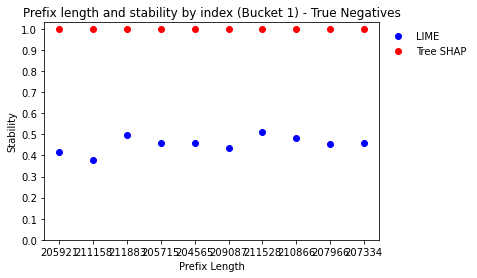

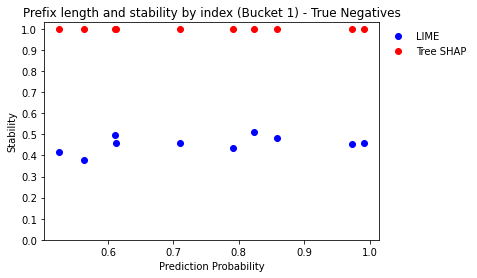

True Positives
Average LIME Stability: 0.457070707070707
Average SHAP Stability: 1.0


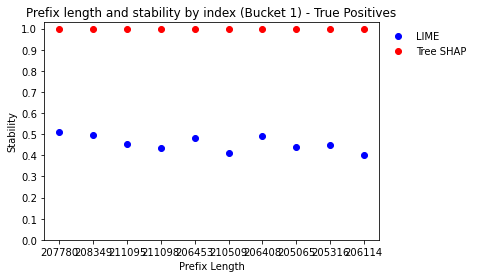

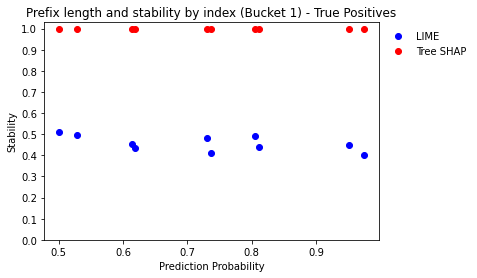

False Negatives
Average LIME Stability: 0.49587205387205385
Average SHAP Stability: 1.0


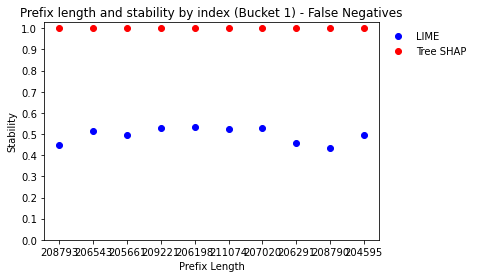

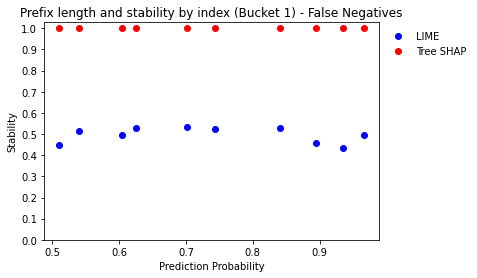

False Positives
Average LIME Stability: 0.4663367003367003
Average SHAP Stability: 1.0


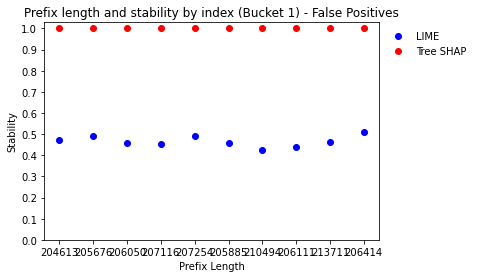

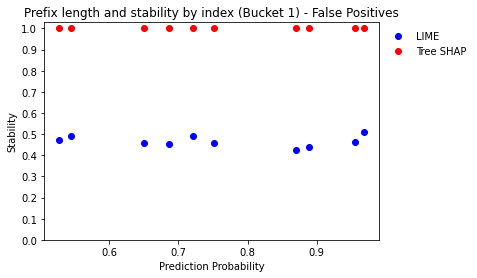

Bucket 2
True Negatives
Average LIME Stability: 0.5634509803921568
Average SHAP Stability: 1.0


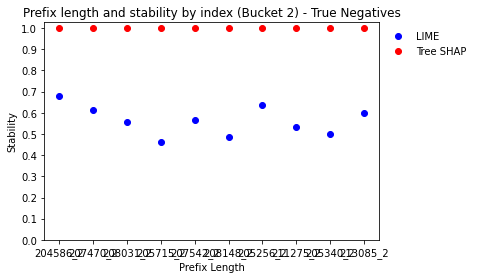

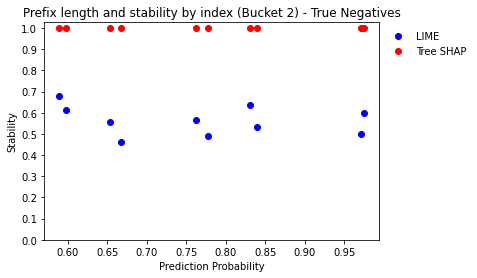

True Positives
Average LIME Stability: 0.5119738562091503
Average SHAP Stability: 1.0


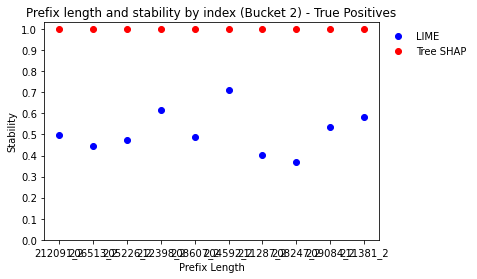

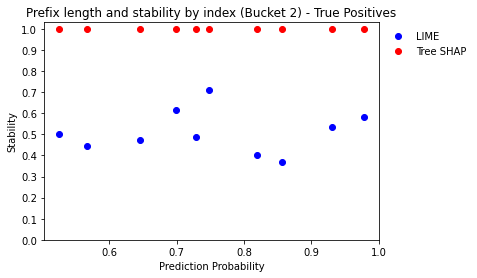

False Negatives
Average LIME Stability: 0.5873202614379085
Average SHAP Stability: 1.0


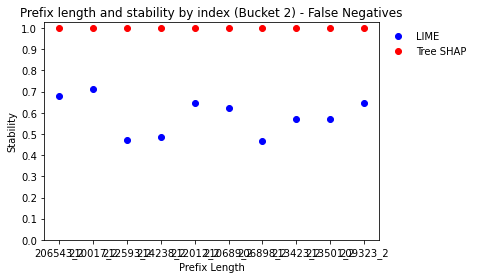

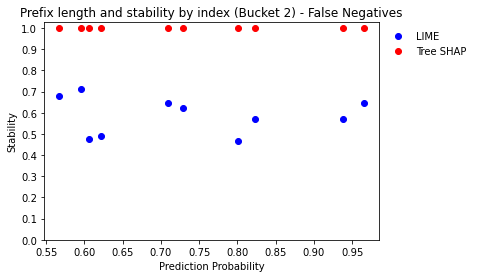

False Positives
Average LIME Stability: 0.5151372549019607
Average SHAP Stability: 1.0


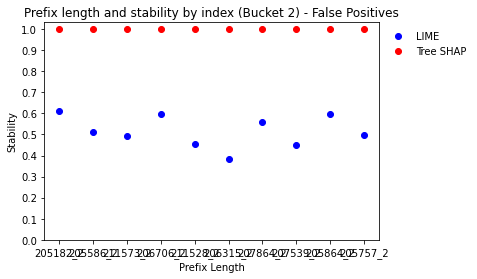

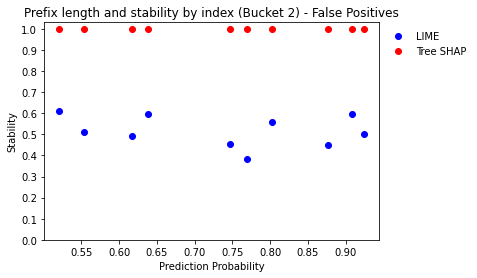

Bucket 3
True Negatives
Average LIME Stability: 0.6708588588588589
Average SHAP Stability: 1.0


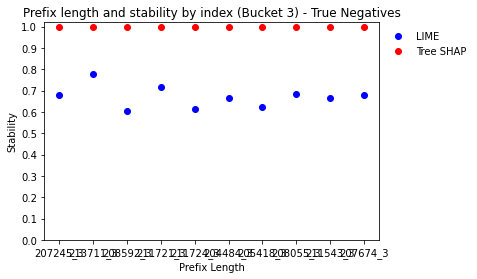

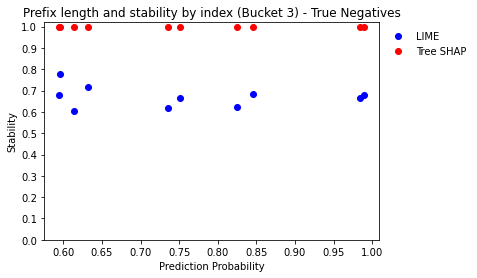

True Positives
Average LIME Stability: 0.6714234234234234
Average SHAP Stability: 1.0


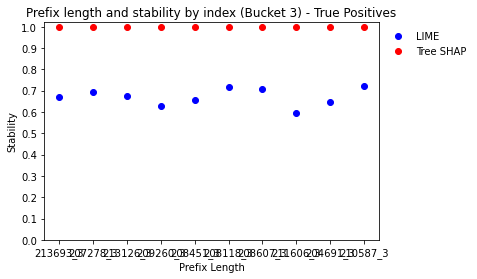

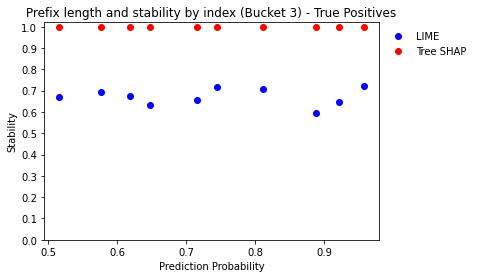

False Negatives
Average LIME Stability: 0.6762222222222222
Average SHAP Stability: 1.0


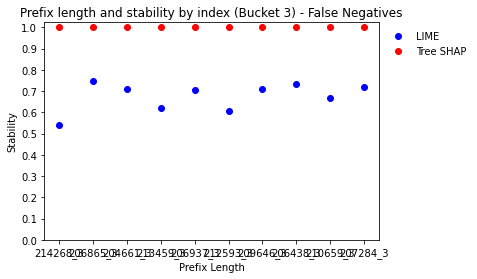

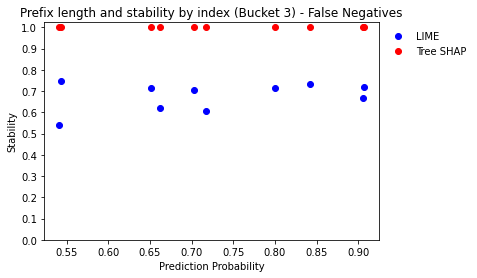

False Positives
Average LIME Stability: 0.6872312312312312
Average SHAP Stability: 1.0


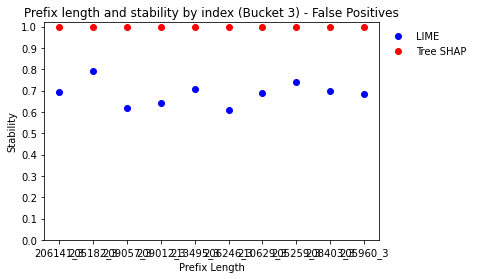

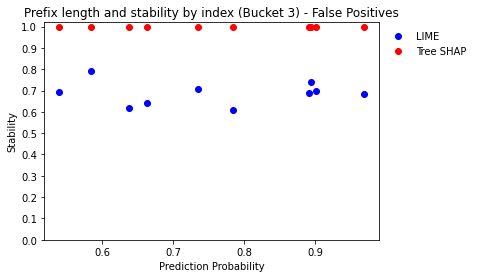

Bucket 4
True Negatives
Average LIME Stability: 0.2892499999999999
Average SHAP Stability: 1.0


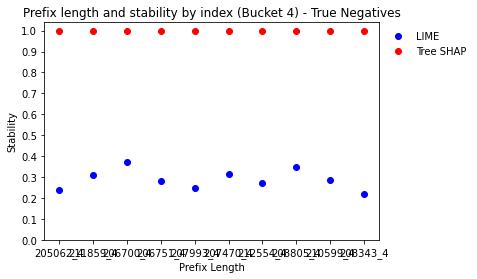

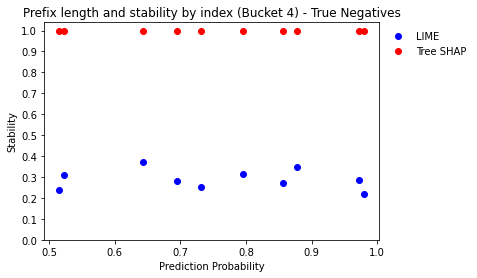

True Positives
Average LIME Stability: 0.3074999999999999
Average SHAP Stability: 1.0


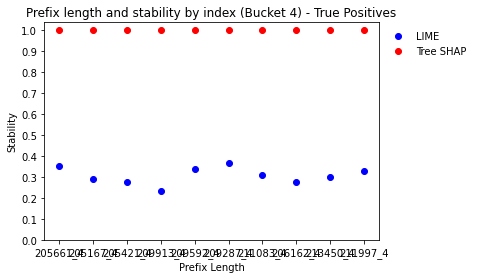

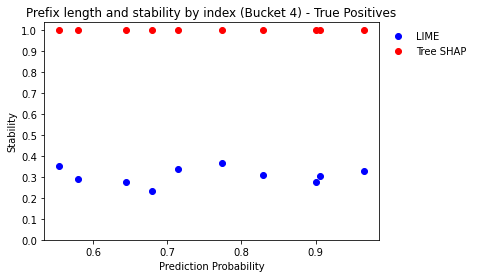

False Negatives
Average LIME Stability: 0.32949999999999996
Average SHAP Stability: 1.0


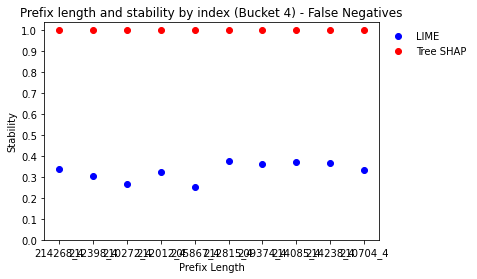

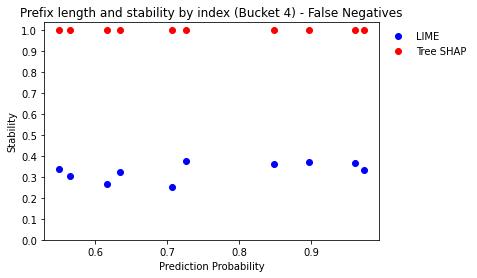

False Positives
Average LIME Stability: 0.3244999999999999
Average SHAP Stability: 1.0


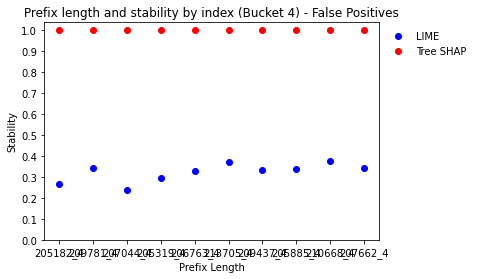

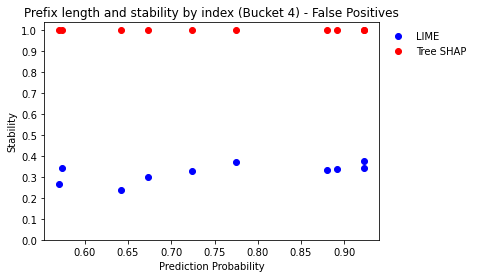

Bucket 5
True Negatives
Average LIME Stability: 0.5149125295508273
Average SHAP Stability: 1.0


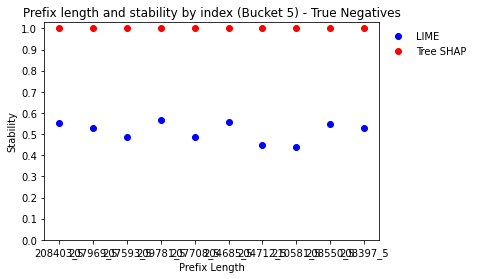

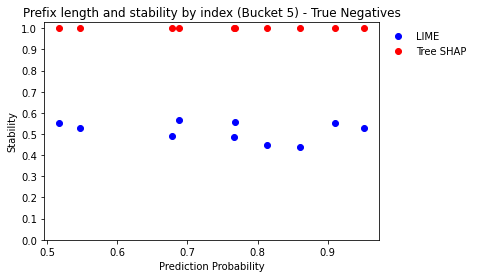

True Positives
Average LIME Stability: 0.5355650118203309
Average SHAP Stability: 1.0


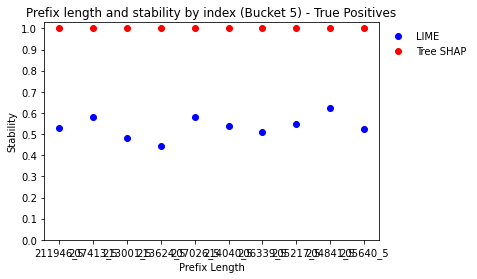

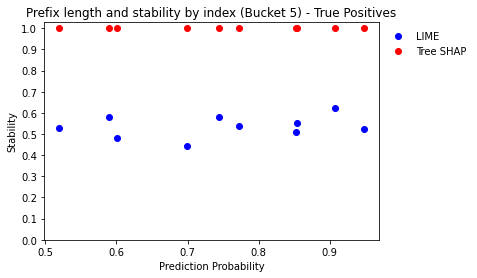

False Negatives
Average LIME Stability: 0.48811347517730497
Average SHAP Stability: 1.0


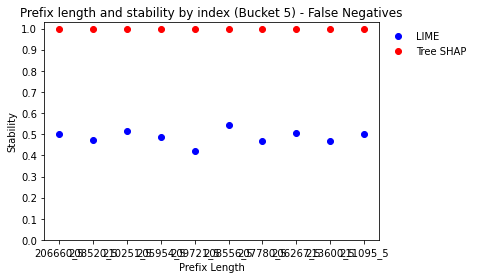

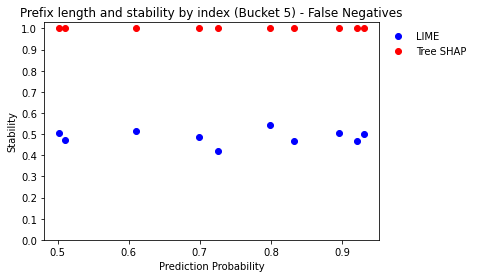

False Positives
Average LIME Stability: 0.49499763593380613
Average SHAP Stability: 1.0


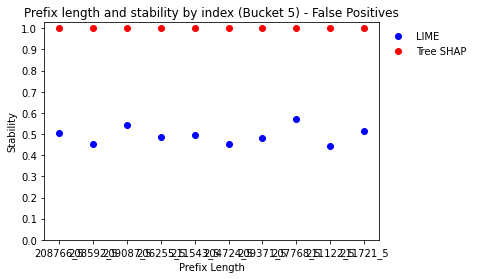

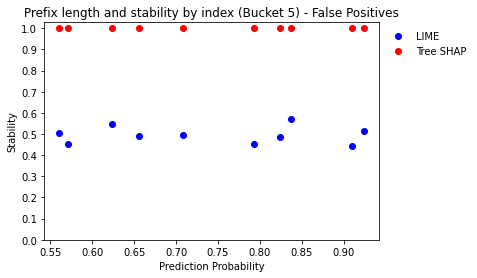

Bucket 6
True Negatives
Average LIME Stability: 0.5396851851851852
Average SHAP Stability: 1.0


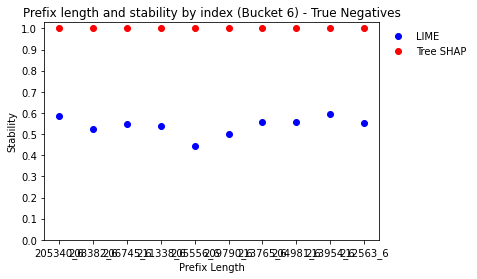

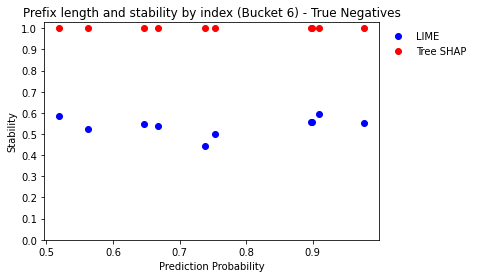

True Positives
Average LIME Stability: 0.5546527777777778
Average SHAP Stability: 1.0


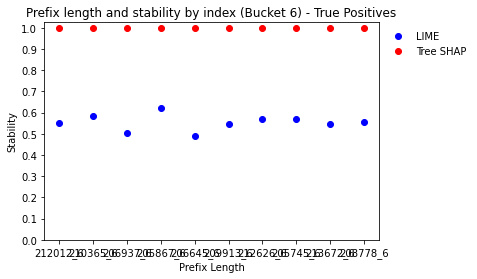

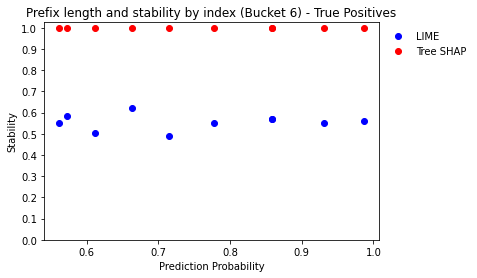

False Negatives
Average LIME Stability: 0.5102407407407408
Average SHAP Stability: 1.0


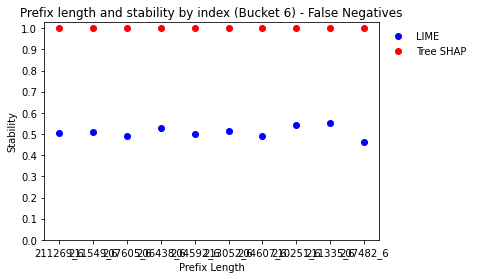

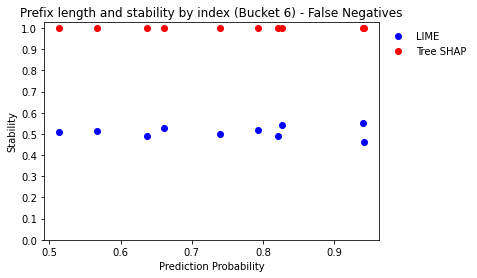

False Positives
Average LIME Stability: 0.5156388888888889
Average SHAP Stability: 1.0


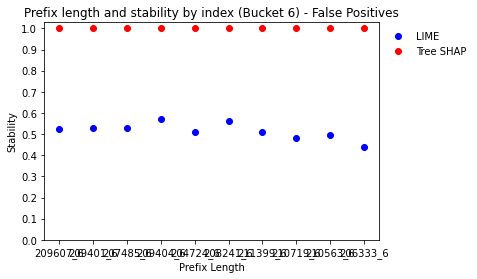

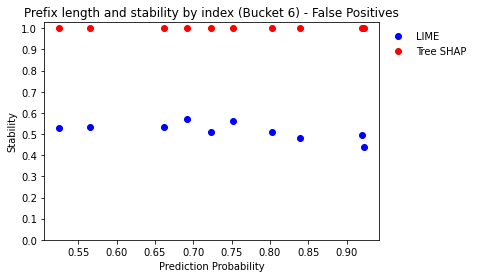

Bucket 7
True Negatives
Average LIME Stability: 0.4827755102040816
Average SHAP Stability: 1.0


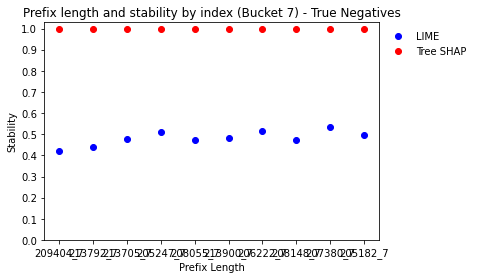

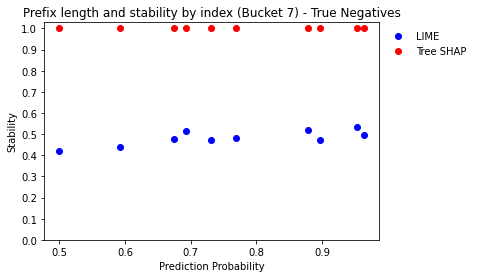

True Positives
Average LIME Stability: 0.5067755102040816
Average SHAP Stability: 1.0


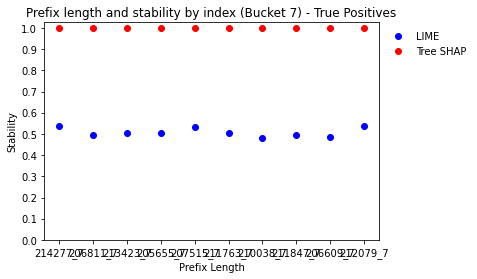

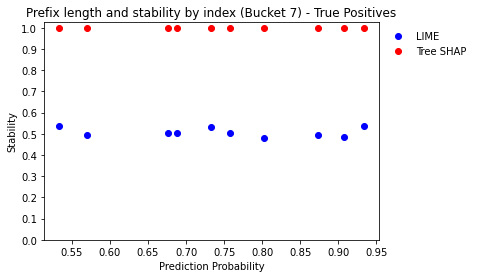

False Negatives
Average LIME Stability: 0.5013877551020407
Average SHAP Stability: 1.0


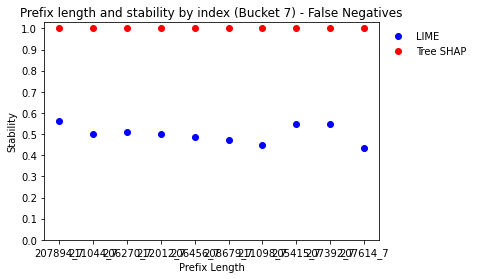

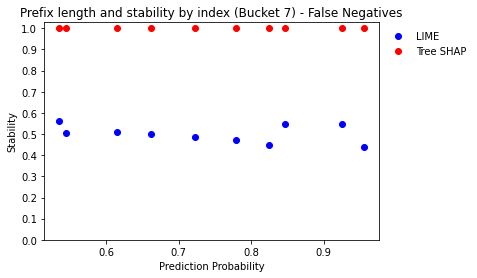

False Positives
Average LIME Stability: 0.4634285714285714
Average SHAP Stability: 1.0


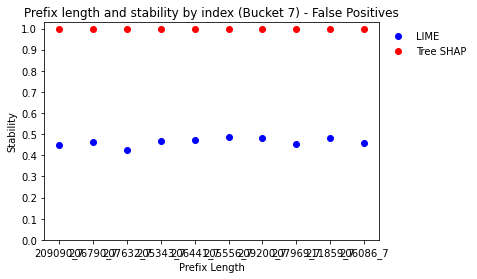

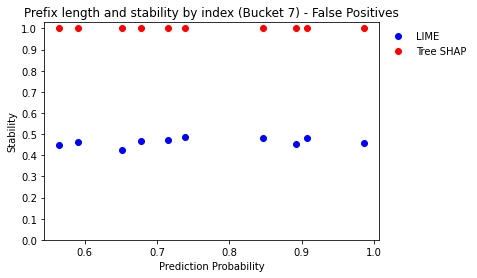

Bucket 8
True Negatives
Average LIME Stability: 0.5151020408163265
Average SHAP Stability: 1.0


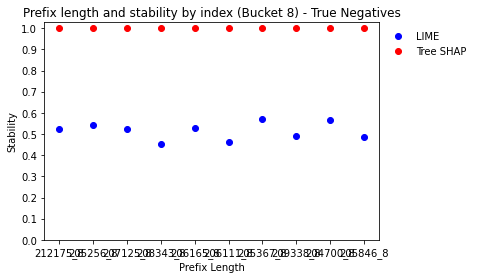

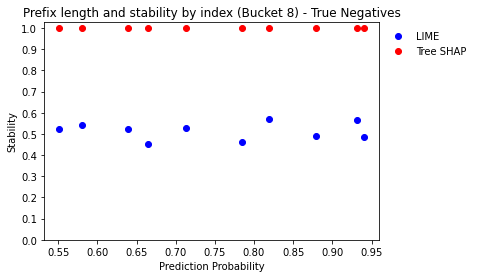

True Positives
Average LIME Stability: 0.5209795918367347
Average SHAP Stability: 1.0


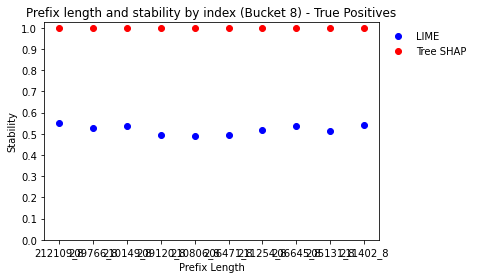

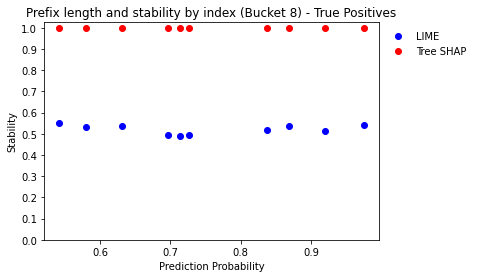

False Negatives
Average LIME Stability: 0.5131428571428571
Average SHAP Stability: 1.0


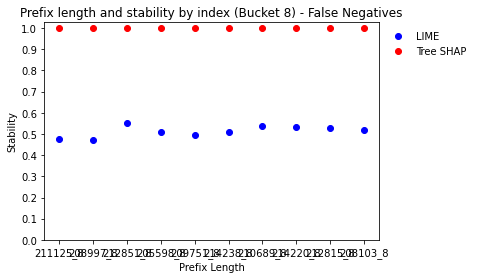

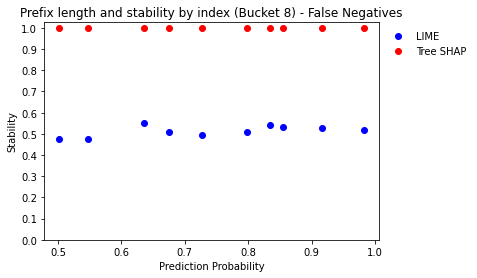

False Positives
Average LIME Stability: 0.4844897959183673
Average SHAP Stability: 1.0


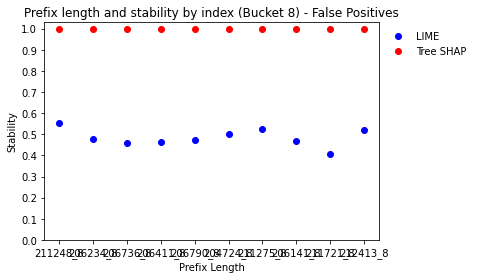

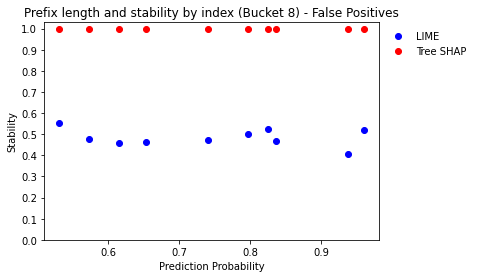

Bucket 9
True Negatives
Average LIME Stability: 0.45487766554433223
Average SHAP Stability: 1.0


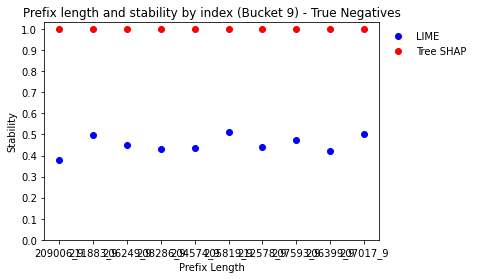

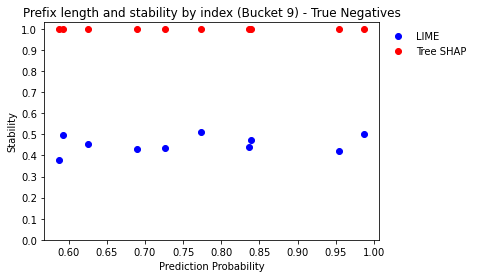

True Positives
Average LIME Stability: 0.4705364758698092
Average SHAP Stability: 1.0


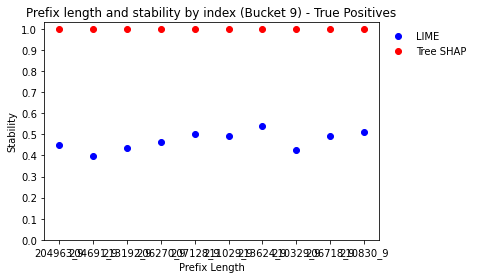

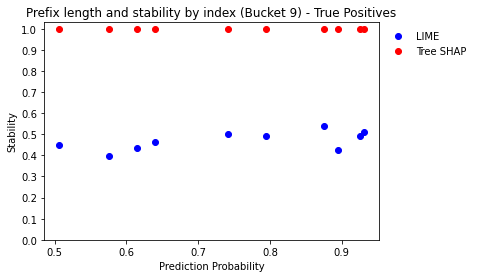

False Negatives
Average LIME Stability: 0.4859506172839506
Average SHAP Stability: 1.0


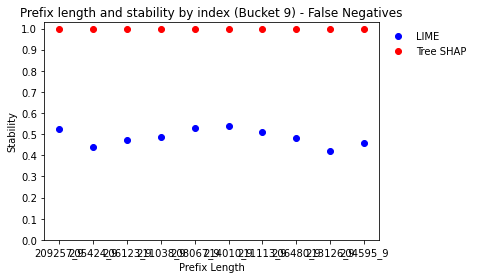

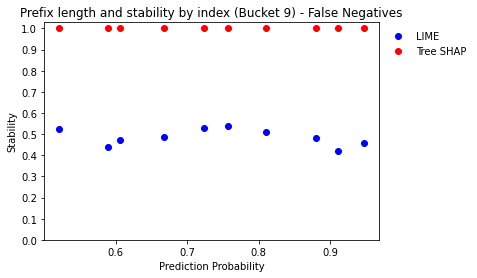

False Positives
Average LIME Stability: 0.4808125701459035
Average SHAP Stability: 1.0


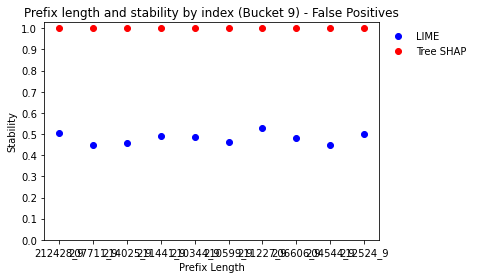

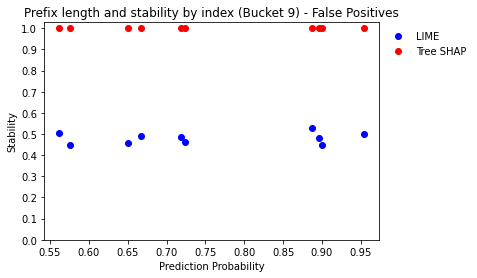

Bucket 10
True Negatives
Average LIME Stability: 0.4570888888888889
Average SHAP Stability: 1.0


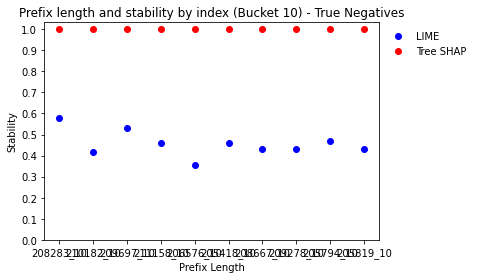

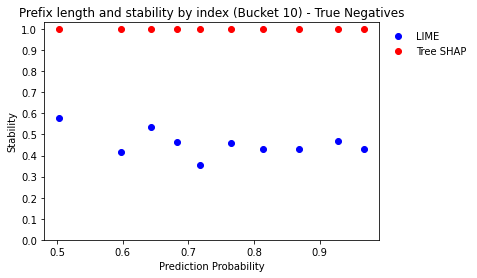

True Positives
Average LIME Stability: 0.4673555555555555
Average SHAP Stability: 1.0


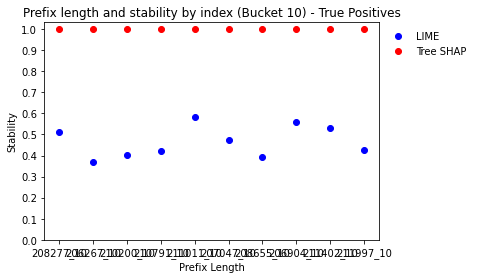

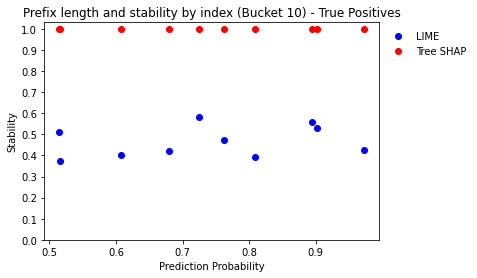

False Negatives
Average LIME Stability: 0.47102222222222223
Average SHAP Stability: 1.0


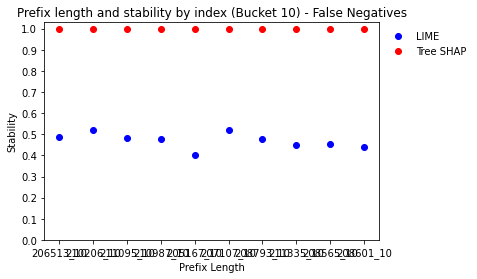

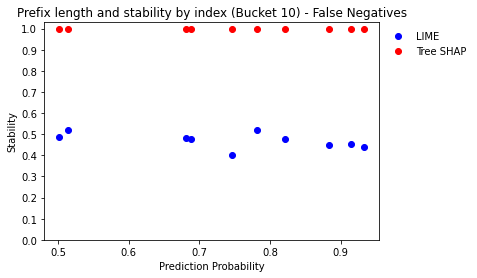

False Positives
Average LIME Stability: 0.4722444444444444
Average SHAP Stability: 1.0


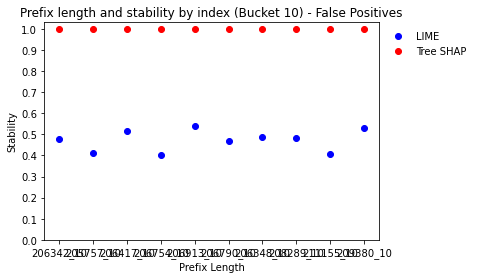

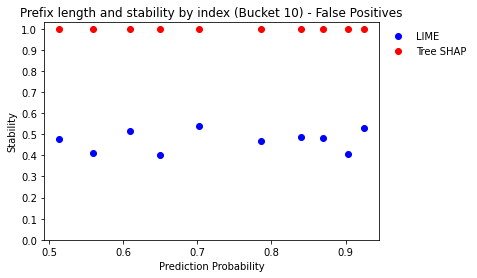

Bucket 11
True Negatives
Average LIME Stability: 0.43584158415841584
Average SHAP Stability: 1.0


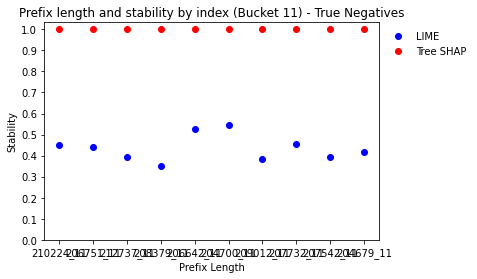

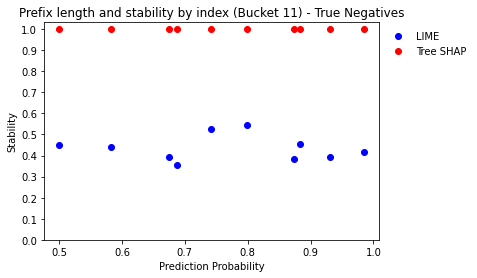

True Positives
Average LIME Stability: 0.48639603960396044
Average SHAP Stability: 1.0


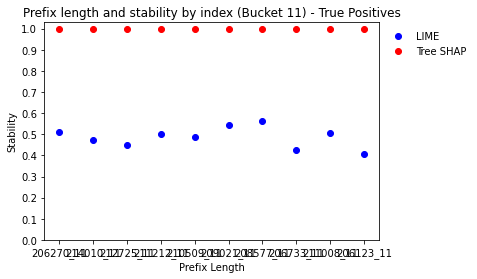

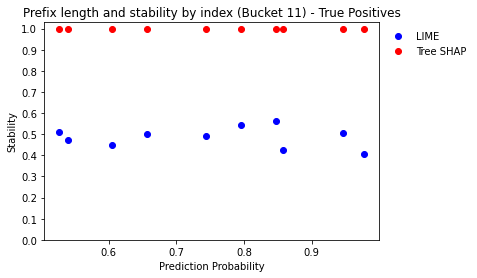

False Negatives
Average LIME Stability: 0.5071551155115511
Average SHAP Stability: 1.0


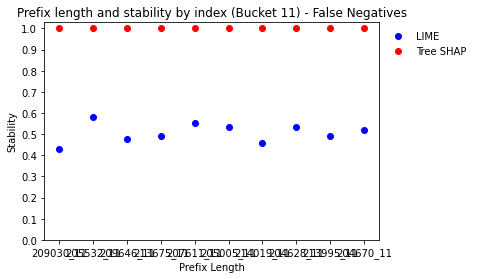

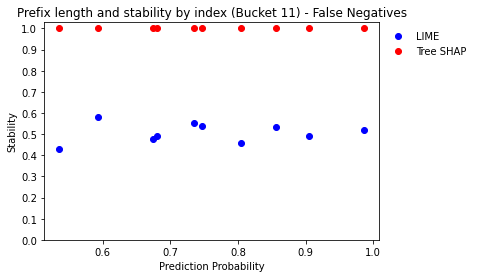

False Positives
Average LIME Stability: 0.5066666666666667
Average SHAP Stability: 1.0


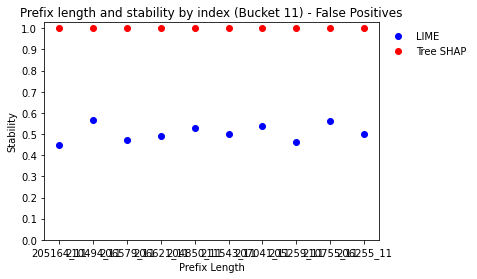

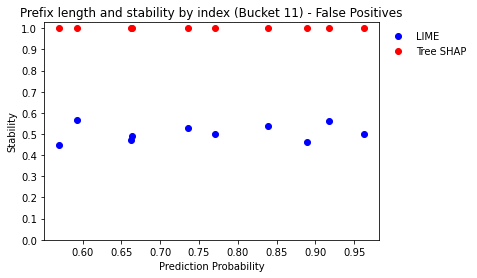

Bucket 12
True Negatives
Average LIME Stability: 0.47760396039603964
Average SHAP Stability: 1.0


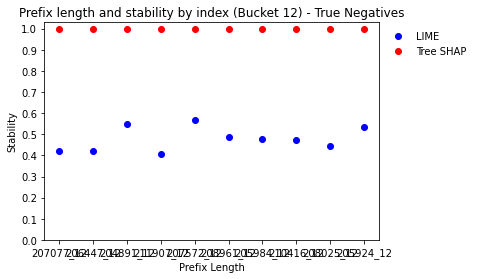

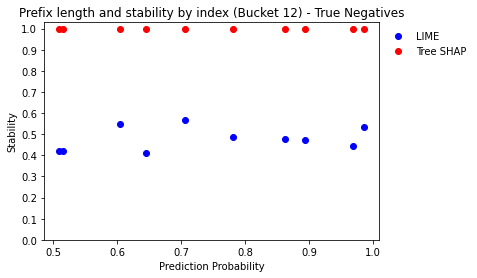

True Positives
Average LIME Stability: 0.484930693069307
Average SHAP Stability: 1.0


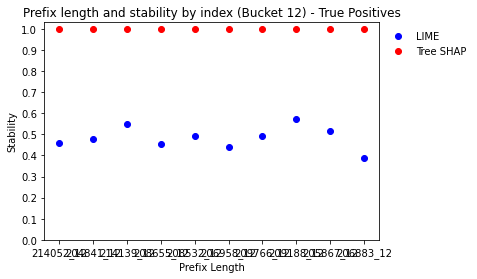

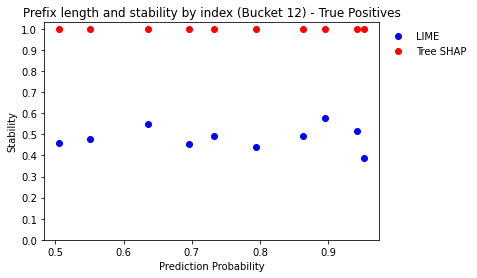

False Negatives
Average LIME Stability: 0.4729636963696369
Average SHAP Stability: 1.0


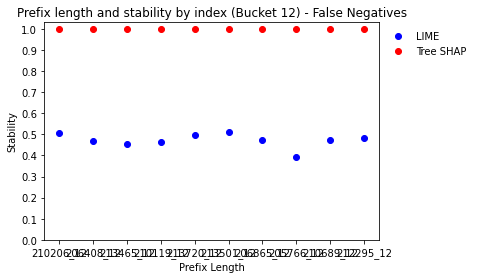

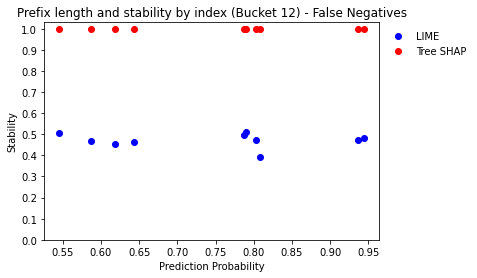

False Positives
Average LIME Stability: 0.46148514851485145
Average SHAP Stability: 1.0


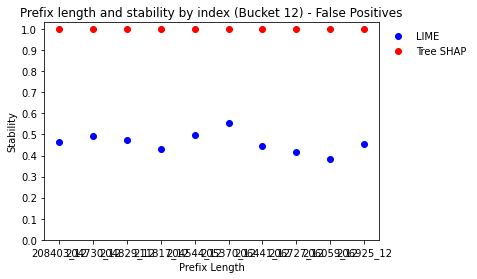

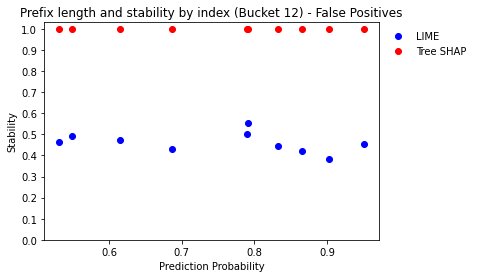

Bucket 13
True Negatives
Average LIME Stability: 0.46552380952380956
Average SHAP Stability: 1.0


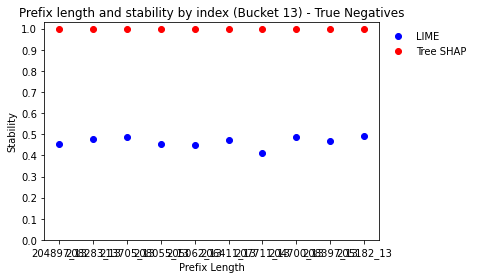

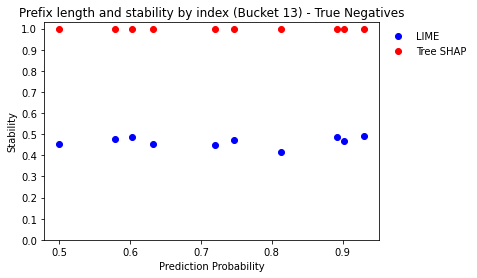

True Positives
Average LIME Stability: 0.4781798941798942
Average SHAP Stability: 1.0


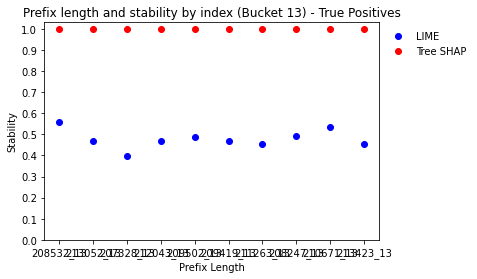

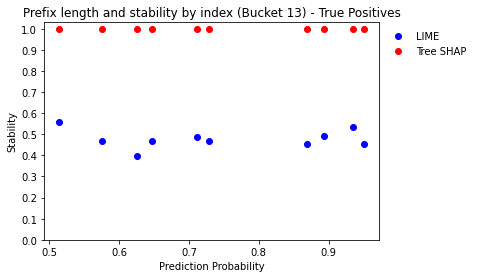

False Negatives
Average LIME Stability: 0.47477248677248685
Average SHAP Stability: 1.0


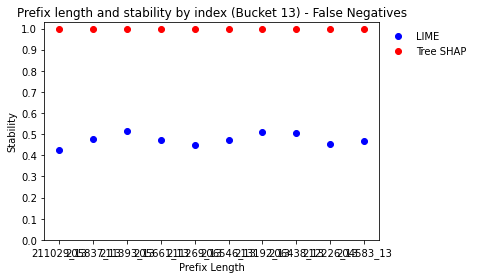

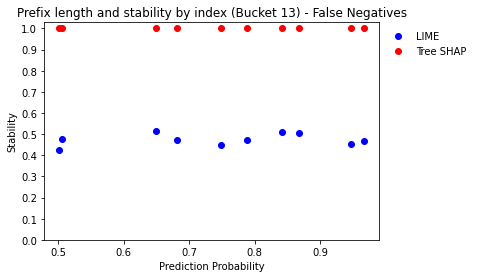

False Positives
Average LIME Stability: 0.48791534391534397
Average SHAP Stability: 1.0


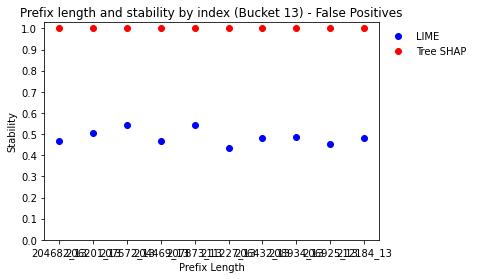

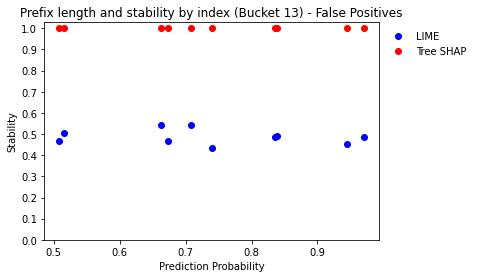

Bucket 14
True Negatives
Average LIME Stability: 0.5163636363636362
Average SHAP Stability: 1.0


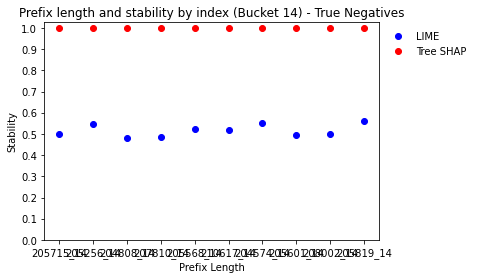

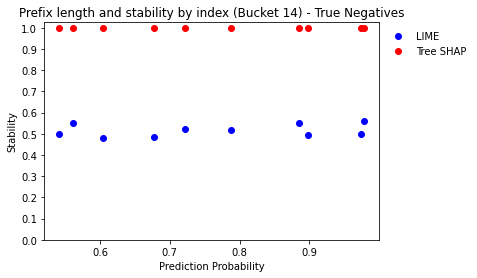

True Positives
Average LIME Stability: 0.5146666666666666
Average SHAP Stability: 1.0


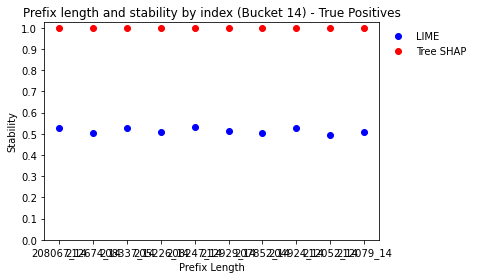

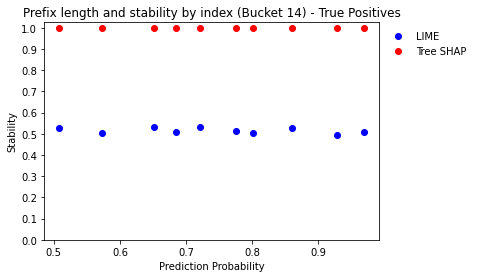

False Negatives
Average LIME Stability: 0.4991515151515151
Average SHAP Stability: 1.0


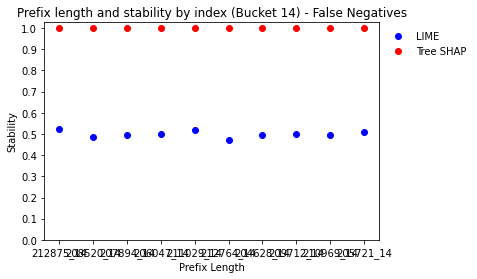

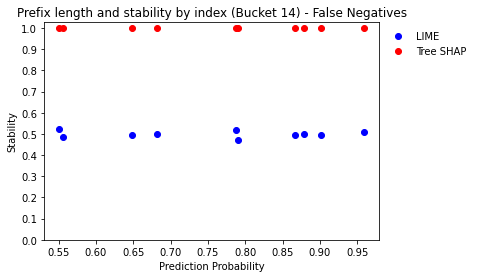

False Positives
Average LIME Stability: 0.5119999999999999
Average SHAP Stability: 1.0


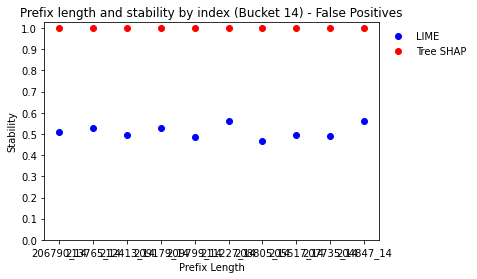

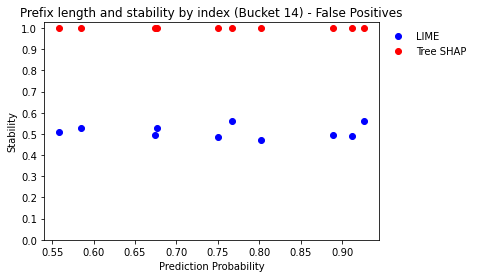

Bucket 15
True Negatives
Average LIME Stability: 0.5618650793650793
Average SHAP Stability: 1.0


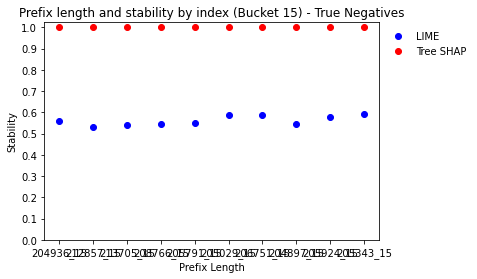

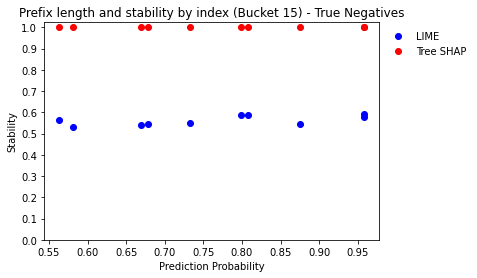

True Positives
Average LIME Stability: 0.5381428571428571
Average SHAP Stability: 1.0


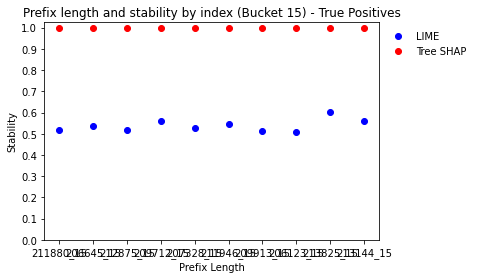

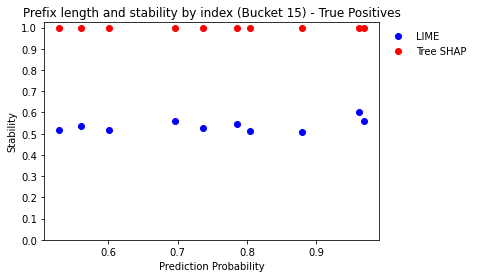

False Negatives
Average LIME Stability: 0.5524246031746032
Average SHAP Stability: 1.0


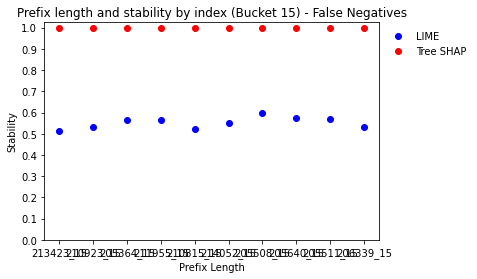

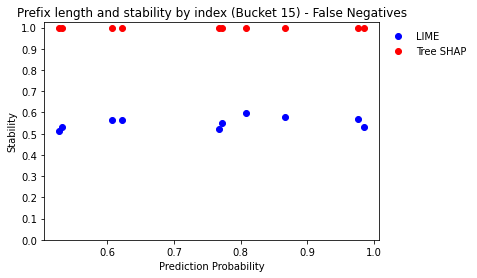

False Positives
Average LIME Stability: 0.5391111111111111
Average SHAP Stability: 1.0


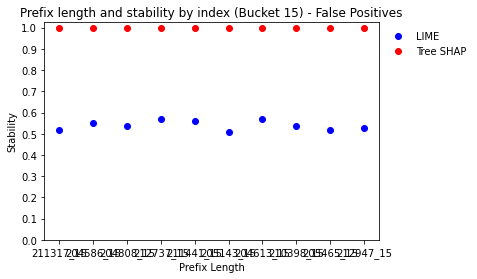

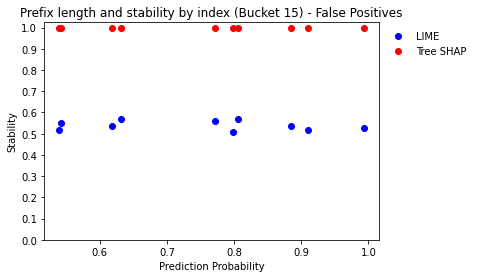

Bucket 16
True Negatives
Average LIME Stability: 0.6400515873015873
Average SHAP Stability: 1.0


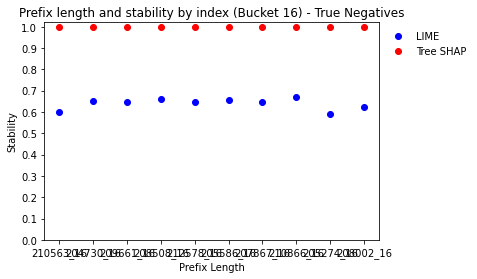

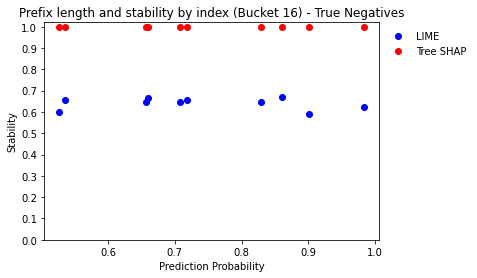

True Positives
Average LIME Stability: 0.650218253968254
Average SHAP Stability: 1.0


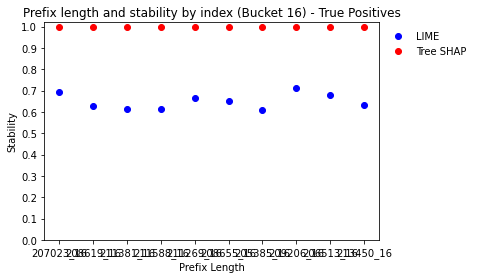

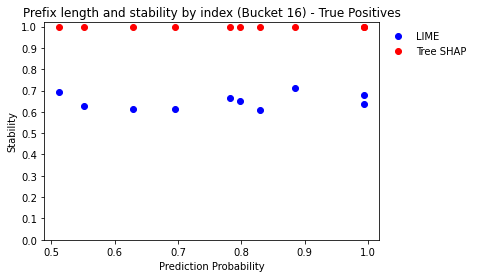

False Negatives
Average LIME Stability: 0.5906706349206349
Average SHAP Stability: 1.0


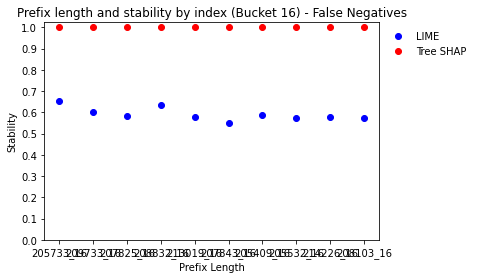

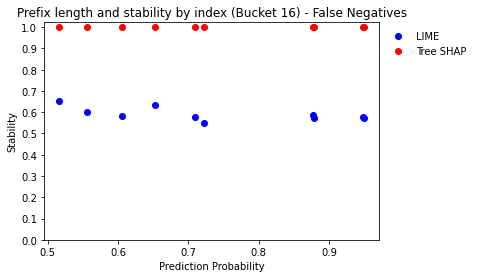

False Positives
Average LIME Stability: 0.6071309523809524
Average SHAP Stability: 1.0


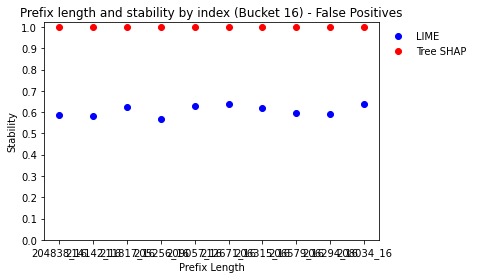

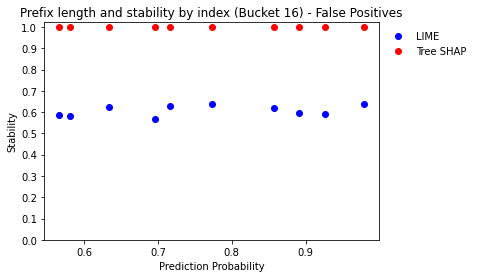

Bucket 17
True Negatives
Average LIME Stability: 0.6751345029239765
Average SHAP Stability: 1.0


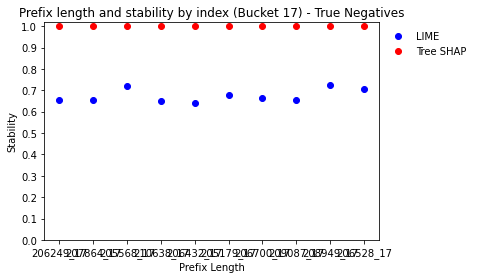

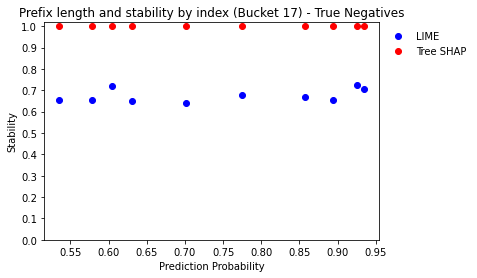

True Positives
Average LIME Stability: 0.6703001949317738
Average SHAP Stability: 1.0


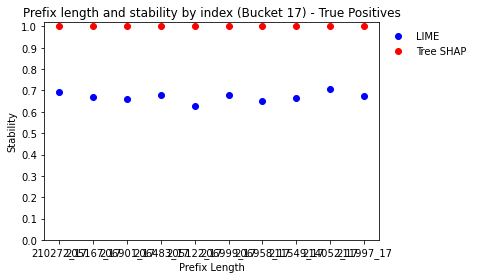

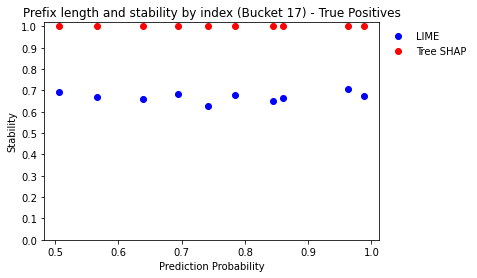

False Negatives
Average LIME Stability: 0.6642573099415204
Average SHAP Stability: 1.0


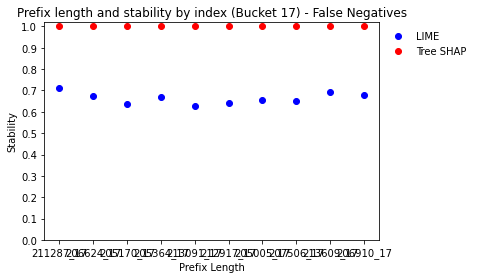

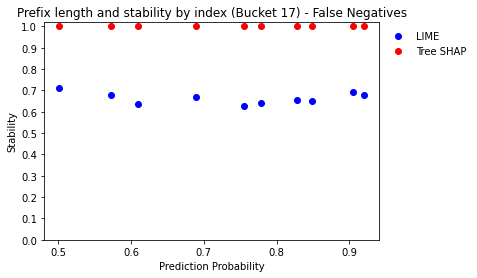

False Positives
Average LIME Stability: 0.6499961013645223
Average SHAP Stability: 1.0


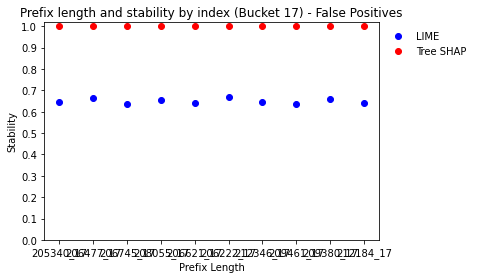

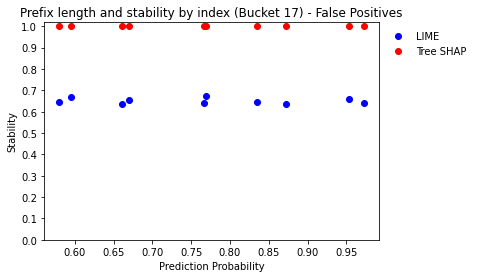

Bucket 18
True Negatives
Average LIME Stability: 0.6292592592592592
Average SHAP Stability: 1.0


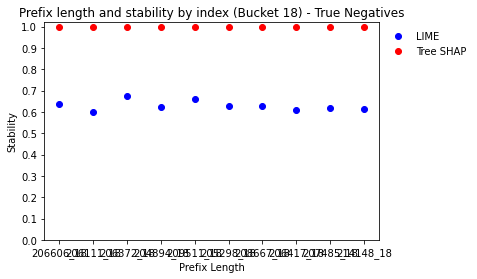

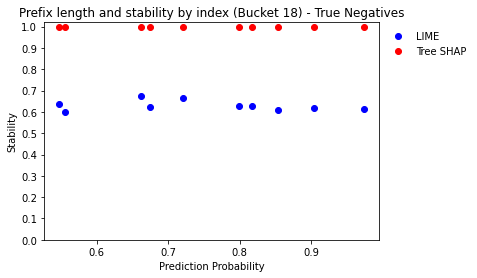

True Positives
Average LIME Stability: 0.6225185185185185
Average SHAP Stability: 1.0


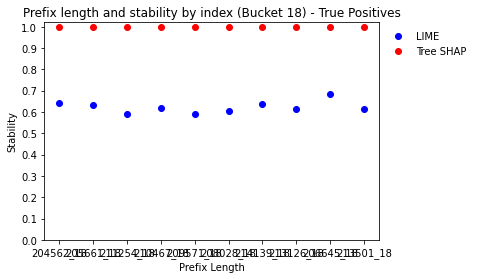

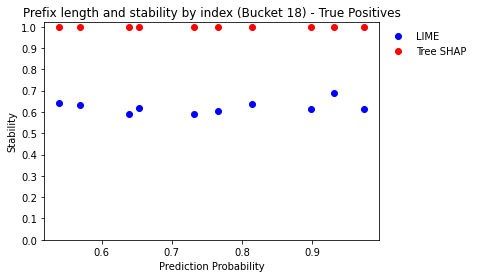

False Negatives
Average LIME Stability: 0.6384074074074074
Average SHAP Stability: 1.0


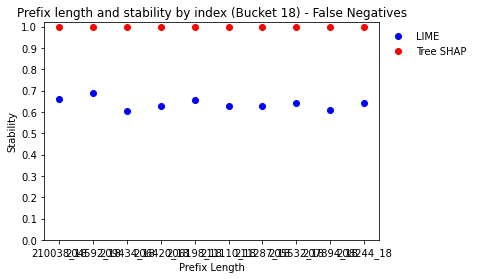

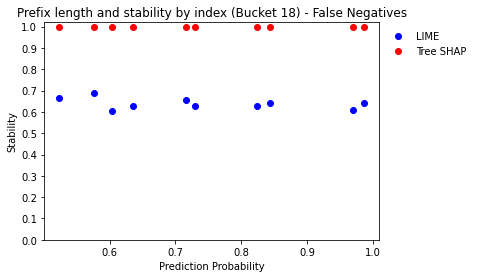

False Positives
Average LIME Stability: 0.6425
Average SHAP Stability: 1.0


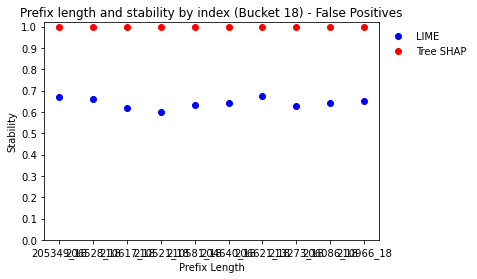

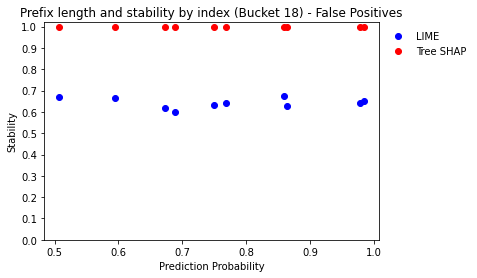

Bucket 19
True Negatives
Average LIME Stability: 0.6210743801652893
Average SHAP Stability: 1.0


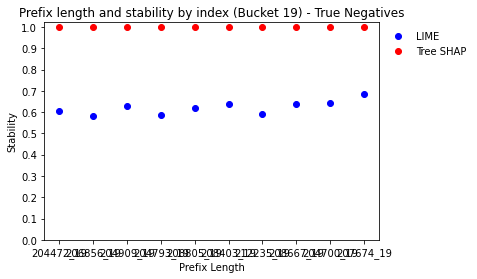

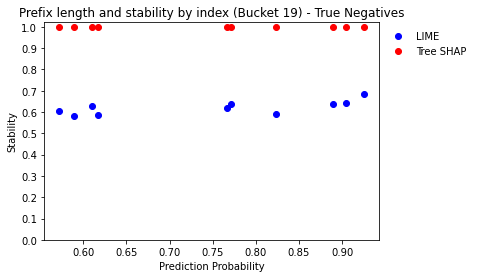

True Positives
Average LIME Stability: 0.6323820018365472
Average SHAP Stability: 1.0


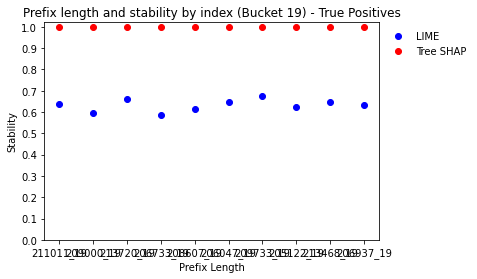

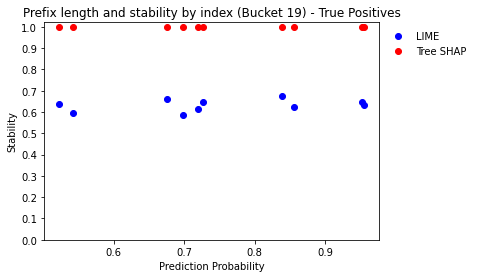

False Negatives
Average LIME Stability: 0.6509072543617997
Average SHAP Stability: 1.0


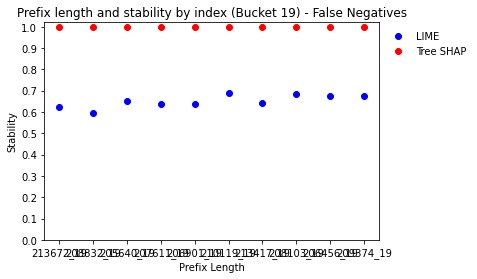

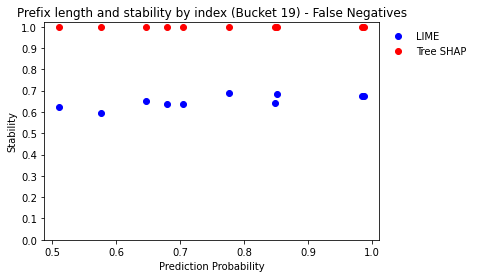

False Positives
Average LIME Stability: 0.6687107438016529
Average SHAP Stability: 1.0


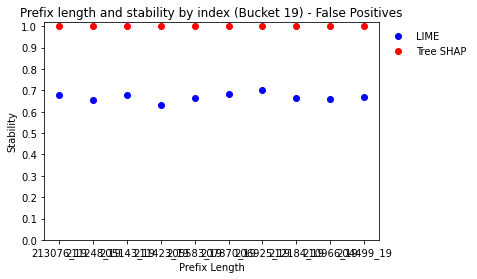

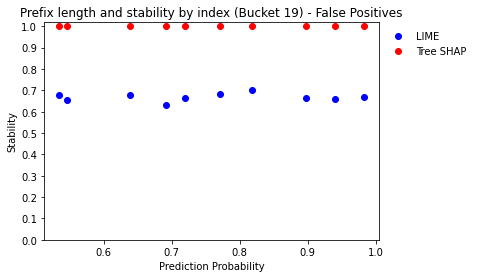

Bucket 20
True Negatives
Average LIME Stability: 0.6342800361336947
Average SHAP Stability: 1.0


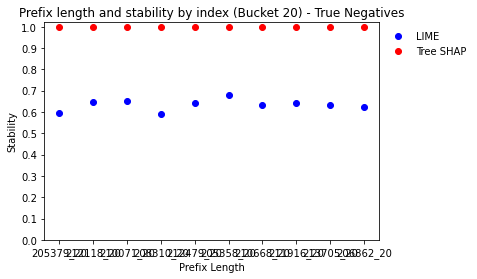

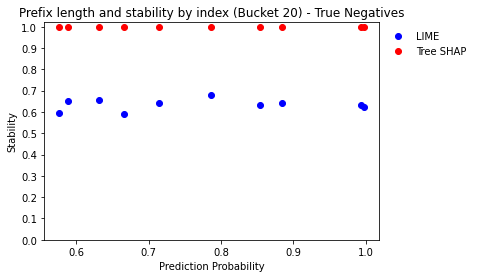

True Positives
Average LIME Stability: 0.6313965672990063
Average SHAP Stability: 1.0


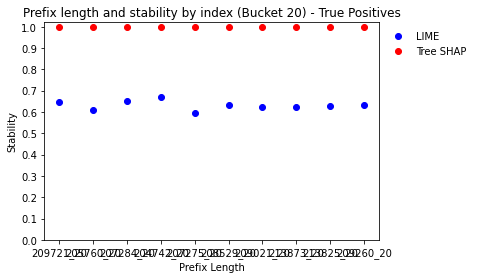

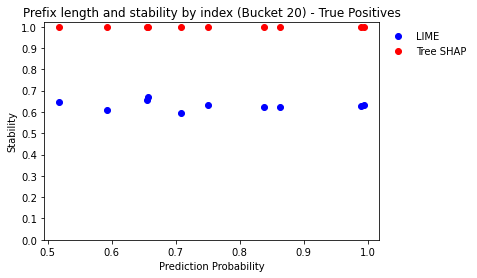

False Negatives
Average LIME Stability: 0.6604715447154471
Average SHAP Stability: 1.0


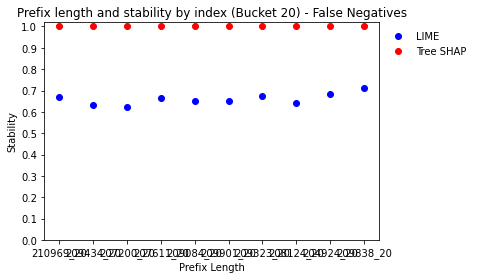

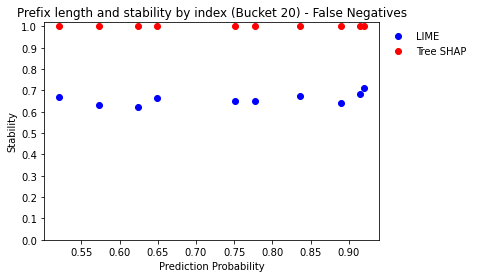

False Positives
Average LIME Stability: 0.6566269196025294
Average SHAP Stability: 1.0


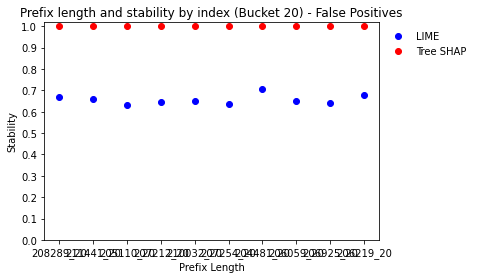

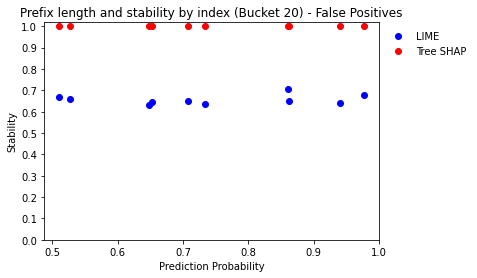

Bucket 21
True Negatives
Average LIME Stability: 0.6698028673835125
Average SHAP Stability: 1.0


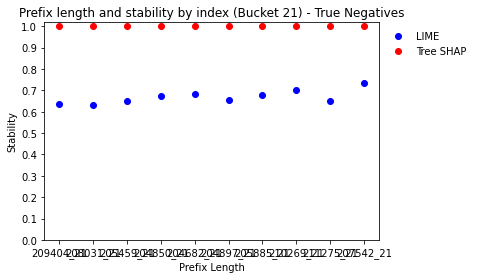

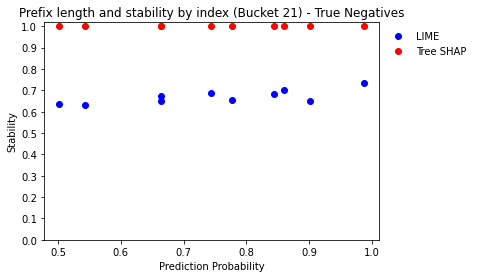

True Positives
Average LIME Stability: 0.6441075268817203
Average SHAP Stability: 1.0


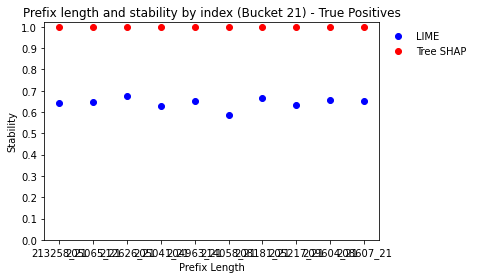

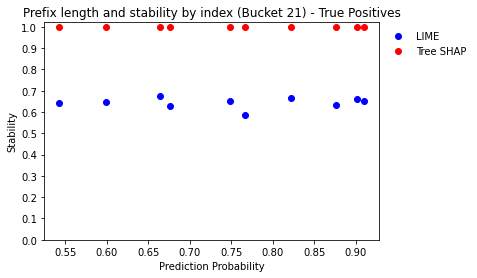

False Negatives
Average LIME Stability: 0.6388243727598566
Average SHAP Stability: 1.0


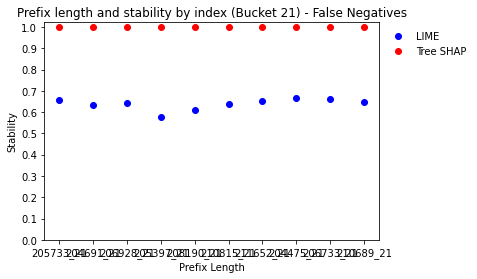

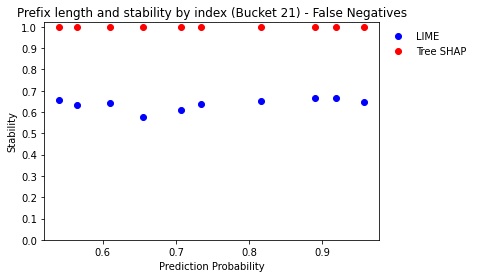

False Positives
Average LIME Stability: 0.6551541218637993
Average SHAP Stability: 1.0


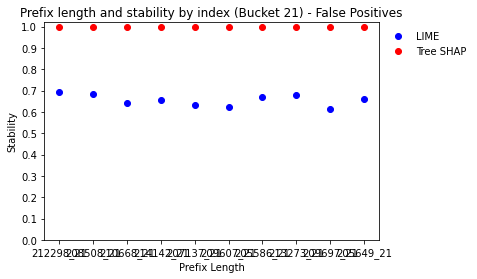

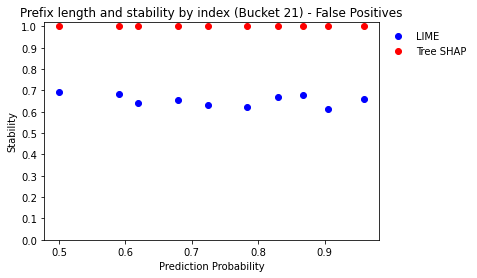

Bucket 22
True Negatives
Average LIME Stability: 0.7003010752688172
Average SHAP Stability: 1.0


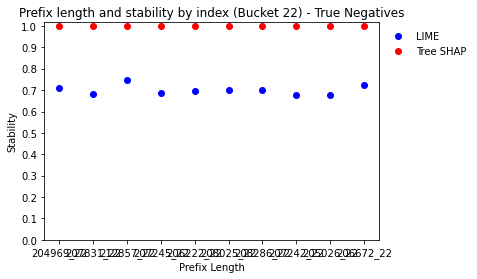

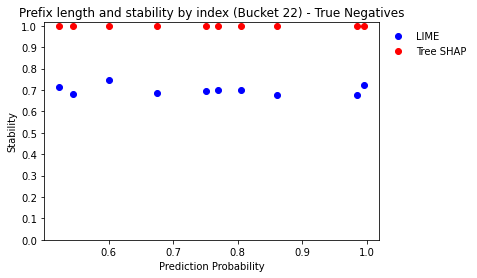

True Positives
Average LIME Stability: 0.7262365591397849
Average SHAP Stability: 1.0


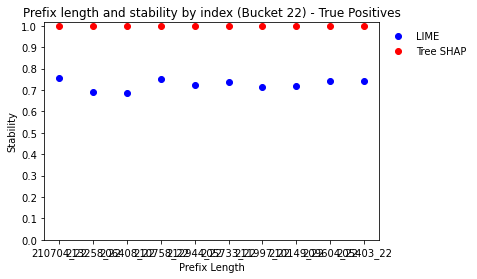

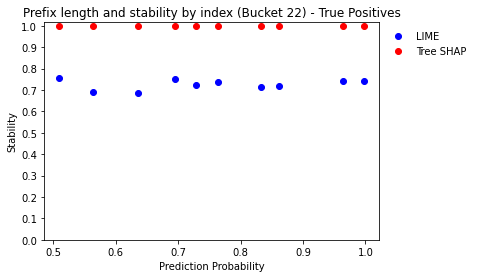

False Negatives
Average LIME Stability: 0.7180716845878136
Average SHAP Stability: 1.0


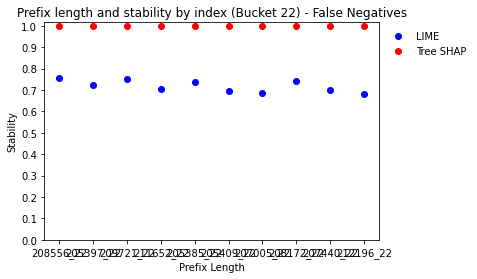

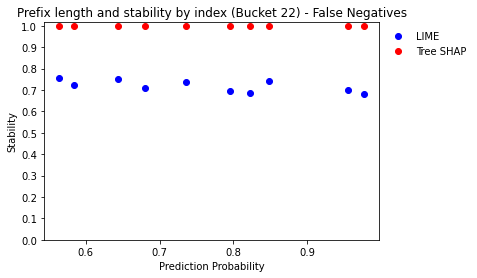

False Positives
Average LIME Stability: 0.7043835125448028
Average SHAP Stability: 1.0


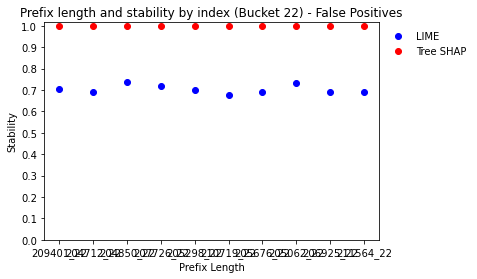

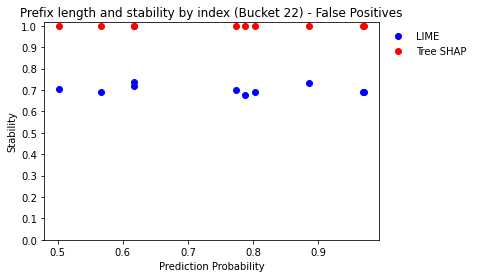

Bucket 23
True Negatives
Average LIME Stability: 0.7115878136200716
Average SHAP Stability: 1.0


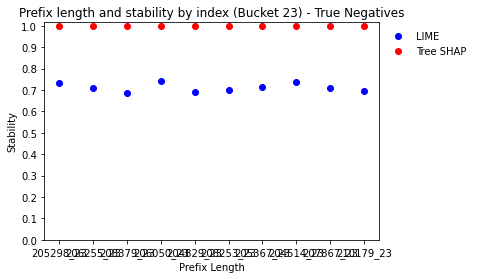

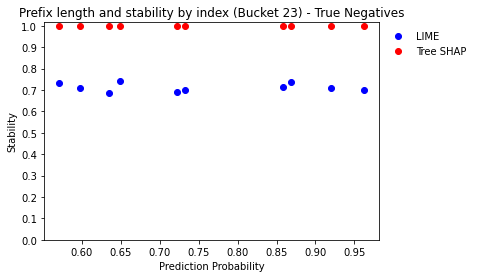

True Positives
Average LIME Stability: 0.7161505376344086
Average SHAP Stability: 1.0


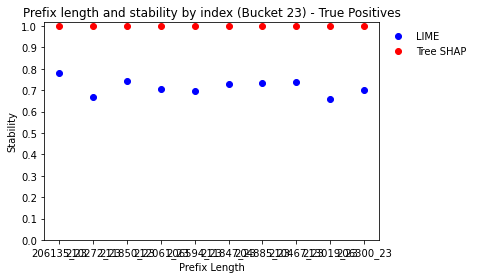

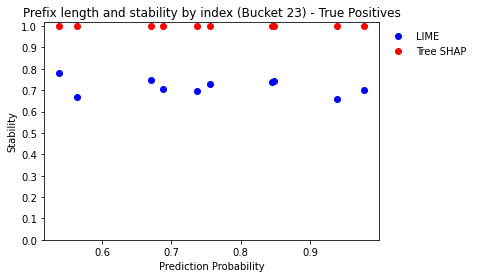

False Negatives
Average LIME Stability: 0.6954982078853047
Average SHAP Stability: 1.0


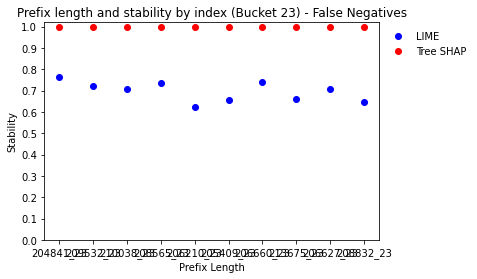

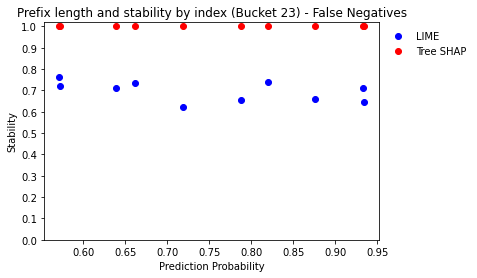

False Positives
Average LIME Stability: 0.7010215053763441
Average SHAP Stability: 1.0


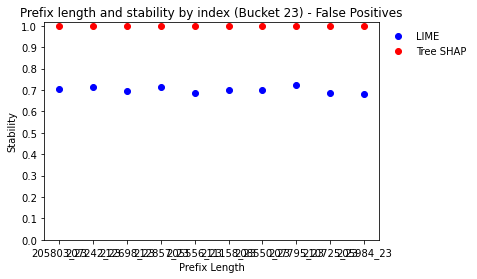

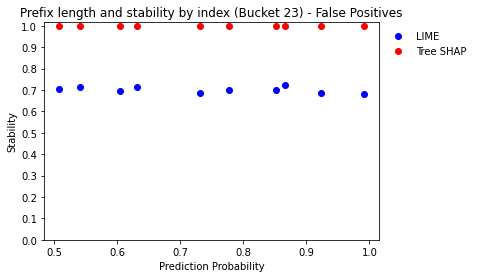

Bucket 24
True Negatives
Average LIME Stability: 0.7310394265232975
Average SHAP Stability: 1.0


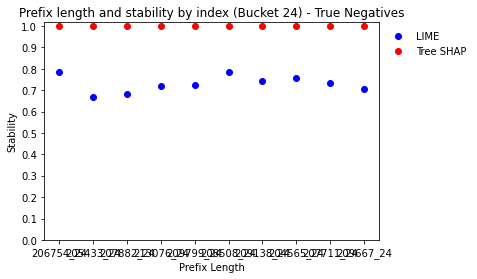

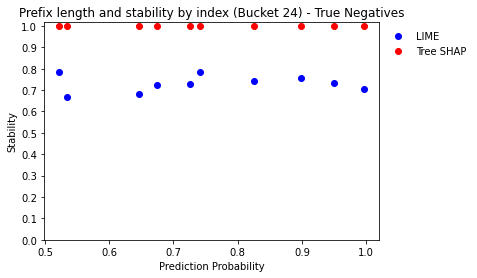

True Positives
Average LIME Stability: 0.7360824372759857
Average SHAP Stability: 1.0


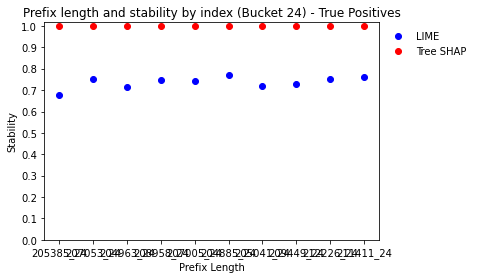

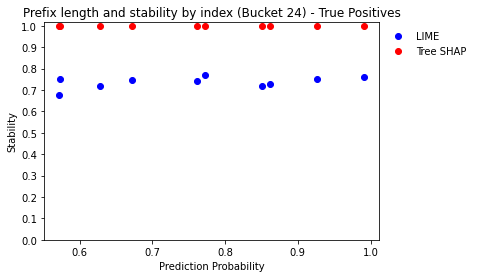

False Negatives
Average LIME Stability: 0.7228745519713261
Average SHAP Stability: 1.0


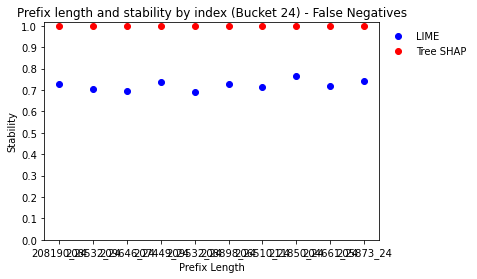

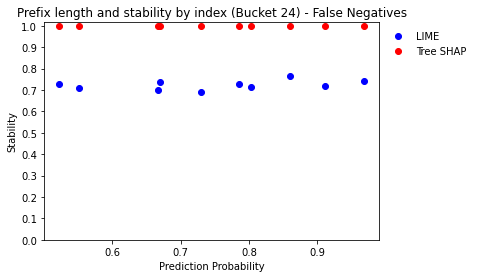

False Positives
Average LIME Stability: 0.7279175627240143
Average SHAP Stability: 1.0


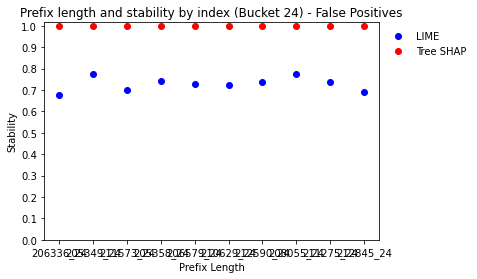

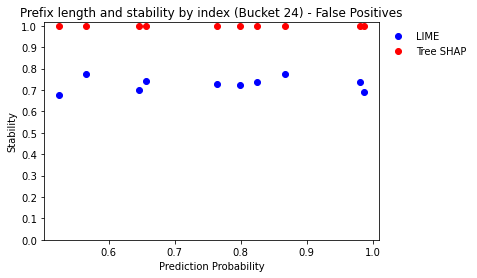

Bucket 25
True Negatives
Average LIME Stability: 0.6431469534050179
Average SHAP Stability: 1.0


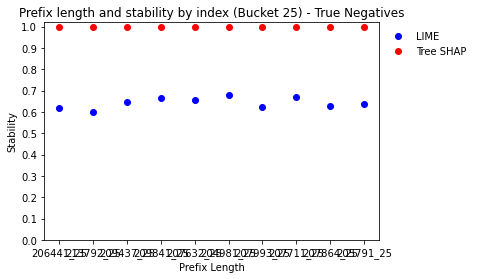

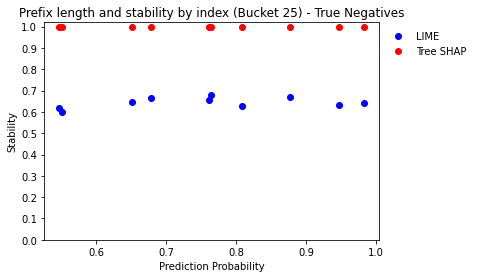

True Positives
Average LIME Stability: 0.6611577060931899
Average SHAP Stability: 1.0


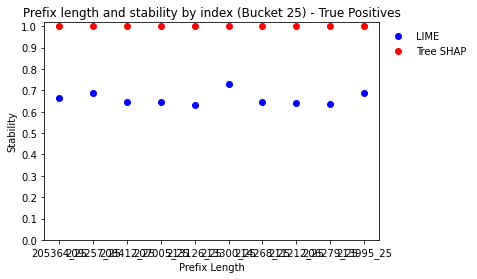

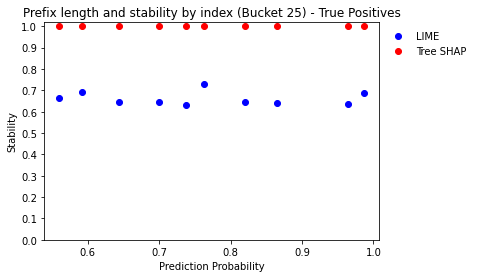

False Negatives
Average LIME Stability: 0.6397849462365591
Average SHAP Stability: 1.0


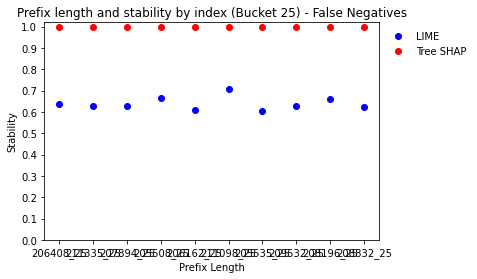

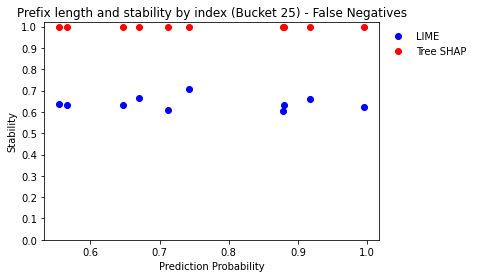

False Positives
Average LIME Stability: 0.6433870967741935
Average SHAP Stability: 1.0


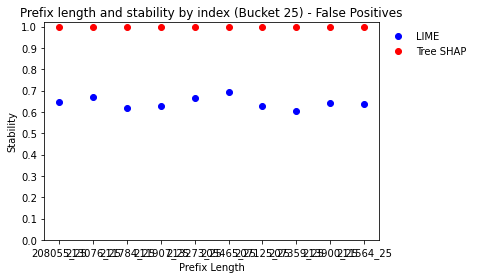

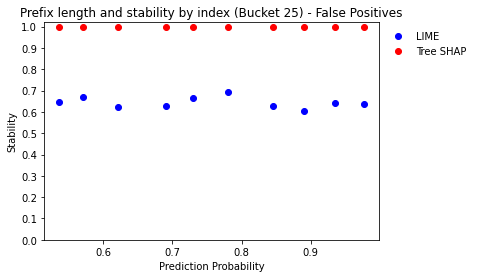

Bucket 26
True Negatives
Average LIME Stability: 0.7862724014336917
Average SHAP Stability: 1.0


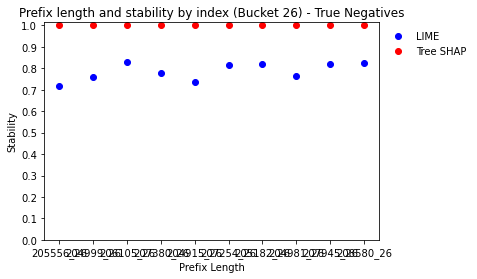

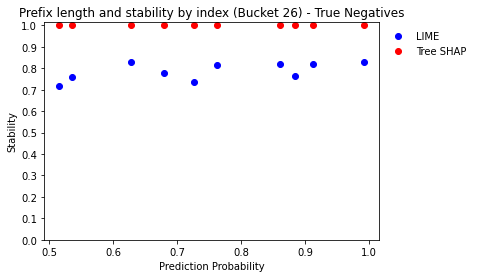

True Positives
Average LIME Stability: 0.7951577060931899
Average SHAP Stability: 1.0


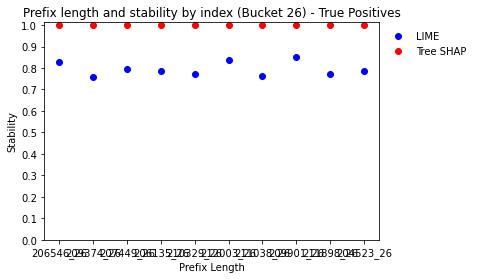

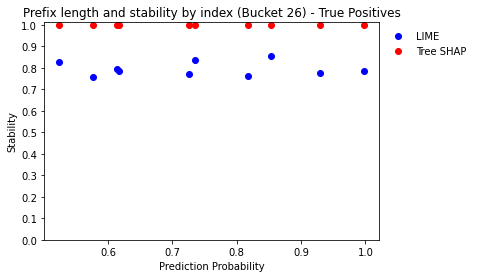

False Negatives
Average LIME Stability: 0.7466487455197133
Average SHAP Stability: 1.0


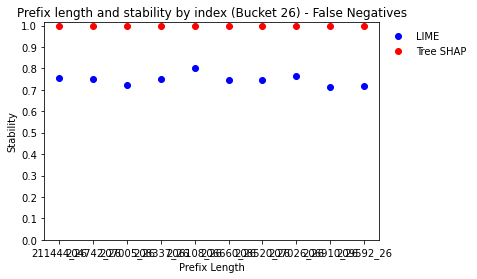

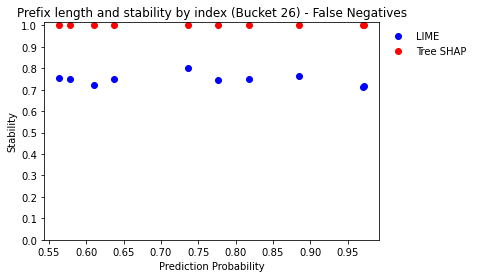

False Positives
Average LIME Stability: 0.7420860215053763
Average SHAP Stability: 1.0


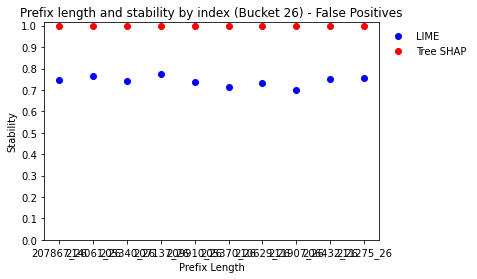

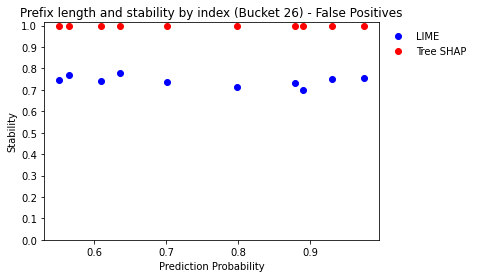

Bucket 27
True Negatives
Average LIME Stability: 0.7046236559139785
Average SHAP Stability: 1.0


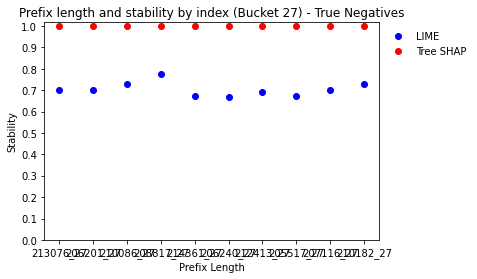

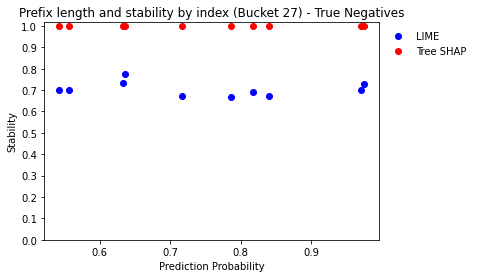

True Positives
Average LIME Stability: 0.7058243727598565
Average SHAP Stability: 1.0


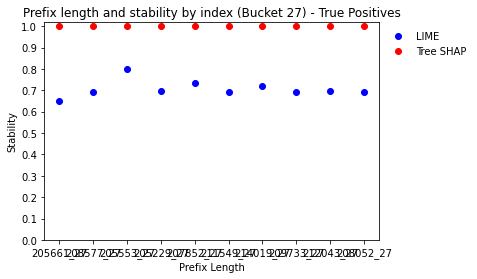

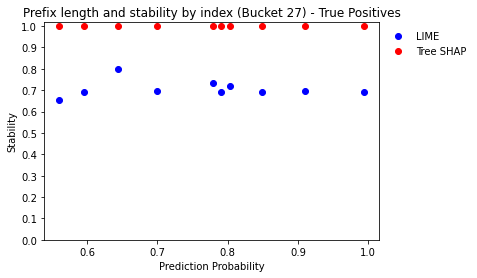

False Negatives
Average LIME Stability: 0.6957383512544802
Average SHAP Stability: 1.0


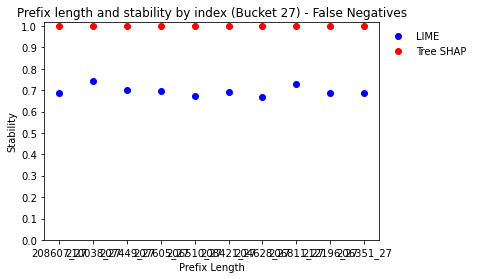

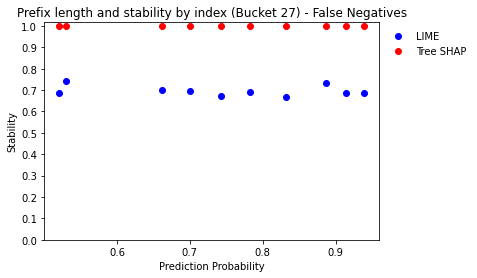

False Positives
Average LIME Stability: 0.6928566308243728
Average SHAP Stability: 1.0


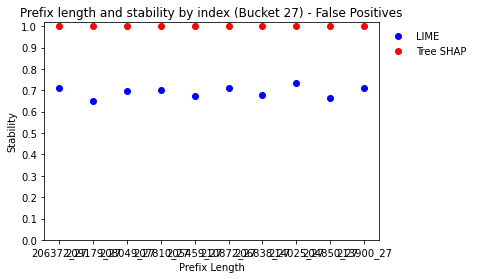

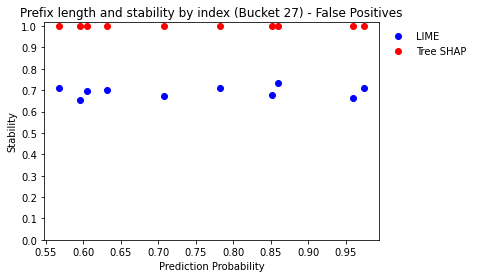

Bucket 28
True Negatives
Average LIME Stability: 0.841505376344086
Average SHAP Stability: 1.0


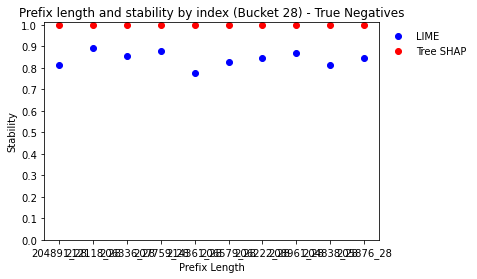

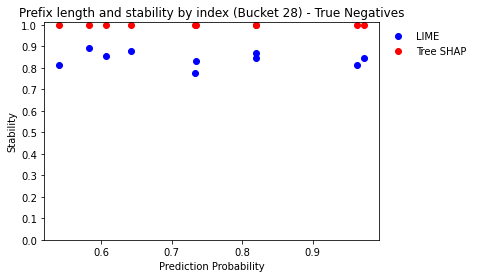

True Positives
Average LIME Stability: 0.8232544802867383
Average SHAP Stability: 1.0


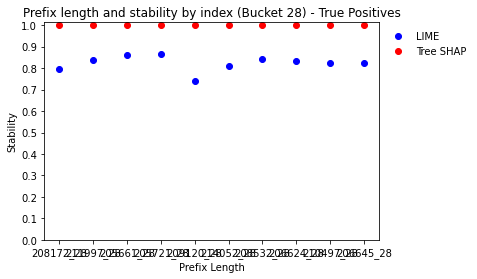

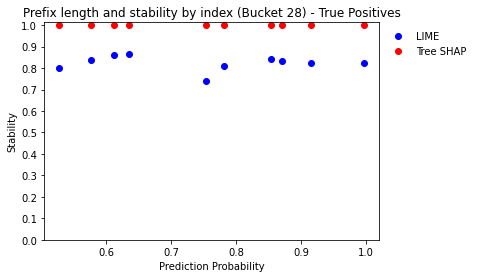

False Negatives
Average LIME Stability: 0.7879534050179211
Average SHAP Stability: 1.0


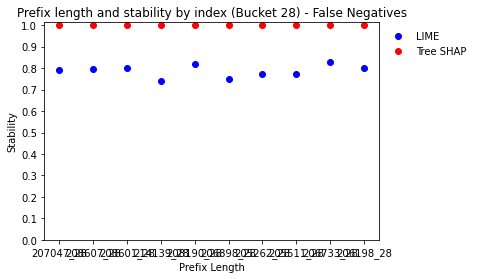

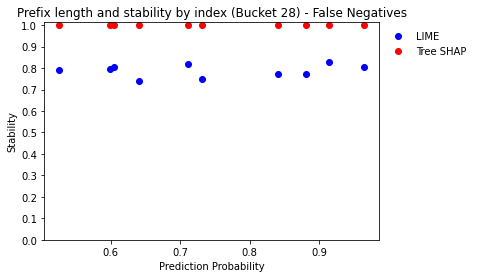

False Positives
Average LIME Stability: 0.7862724014336917
Average SHAP Stability: 1.0


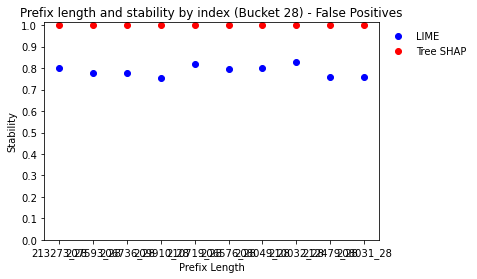

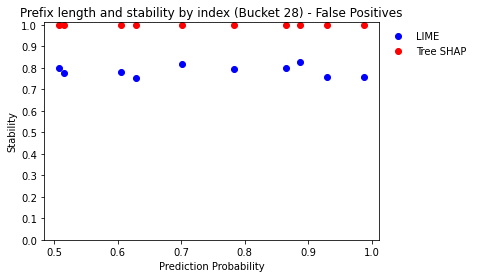

Bucket 29
True Negatives
Average LIME Stability: 0.7267168458781361
Average SHAP Stability: 1.0


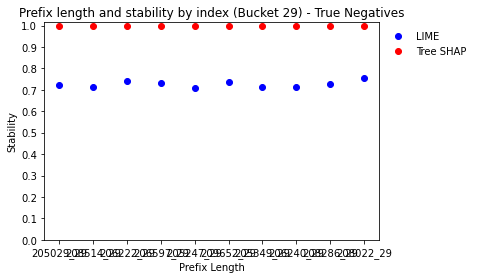

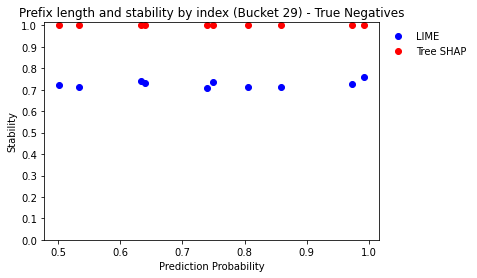

True Positives
Average LIME Stability: 0.733921146953405
Average SHAP Stability: 1.0


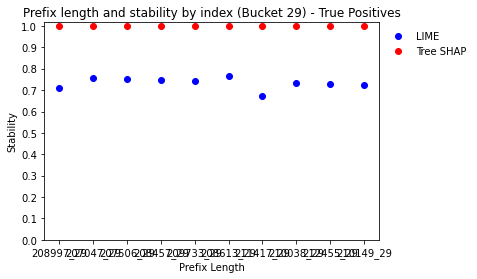

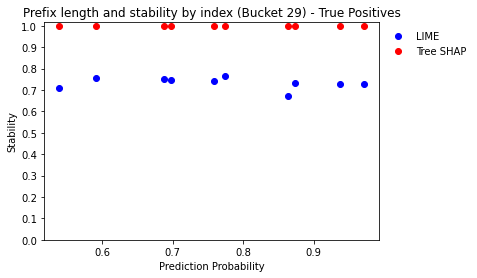

False Negatives
Average LIME Stability: 0.7048637992831541
Average SHAP Stability: 1.0


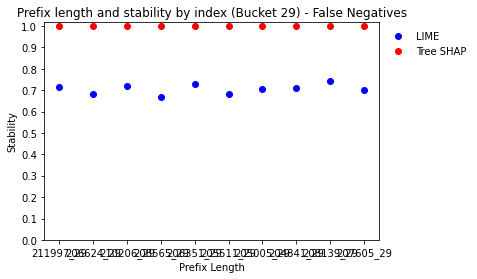

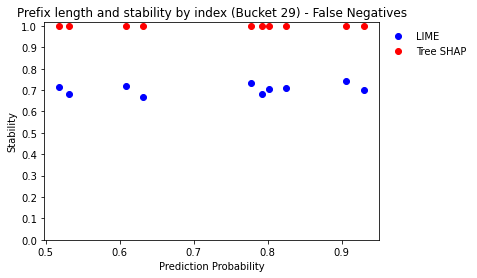

False Positives
Average LIME Stability: 0.719752688172043
Average SHAP Stability: 1.0


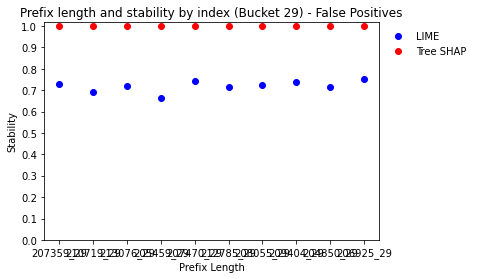

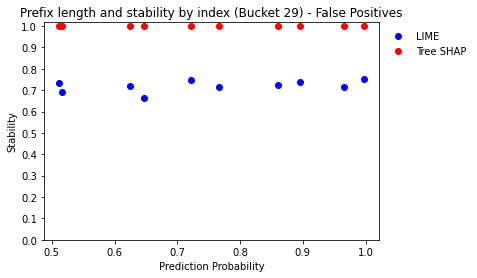

Bucket 30
True Negatives
Average LIME Stability: 0.6950179211469534
Average SHAP Stability: 1.0


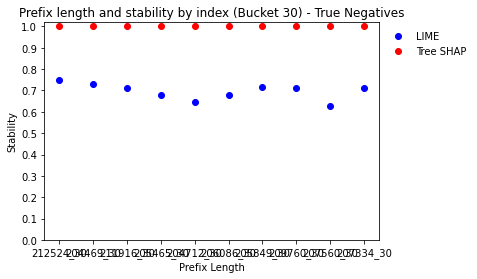

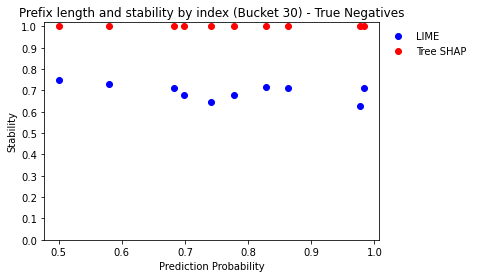

True Positives
Average LIME Stability: 0.7274372759856631
Average SHAP Stability: 1.0


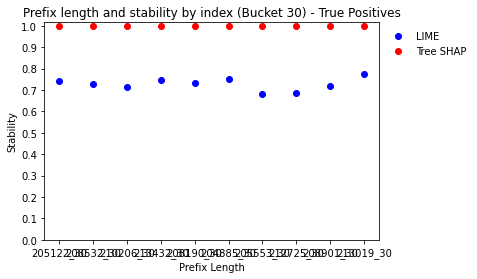

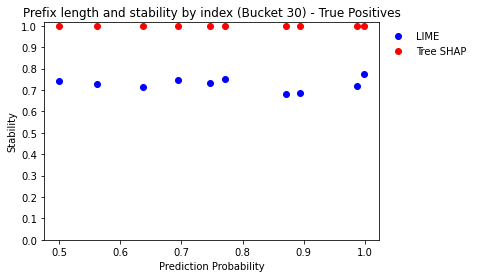

False Negatives
Average LIME Stability: 0.7303189964157706
Average SHAP Stability: 1.0


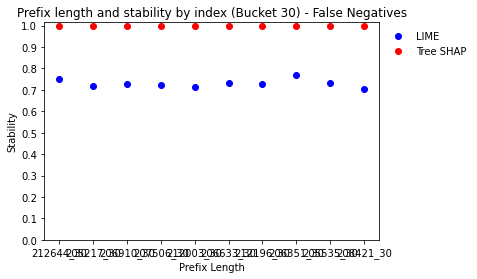

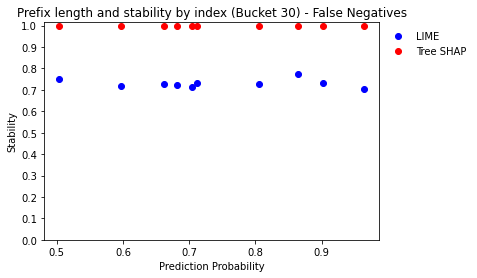

False Positives
Average LIME Stability: 0.7199928315412186
Average SHAP Stability: 1.0


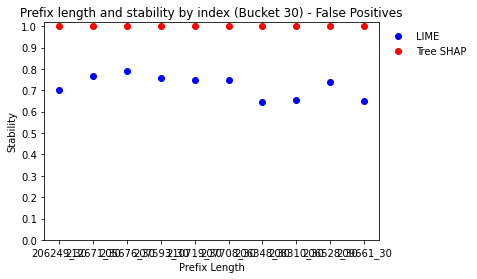

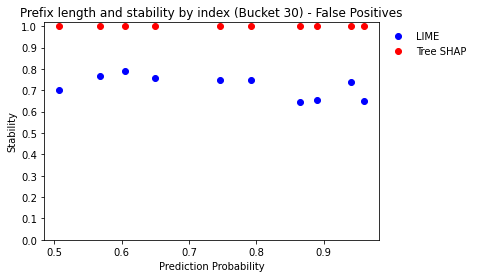

Bucket 31
True Negatives
Average LIME Stability: 0.7279175627240143
Average SHAP Stability: 1.0


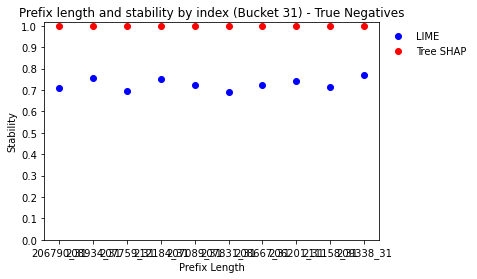

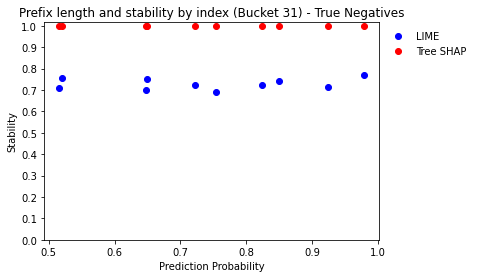

True Positives
Average LIME Stability: 0.7221541218637992
Average SHAP Stability: 1.0


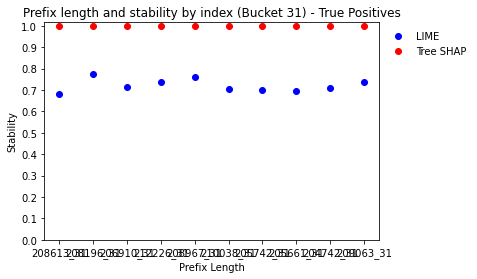

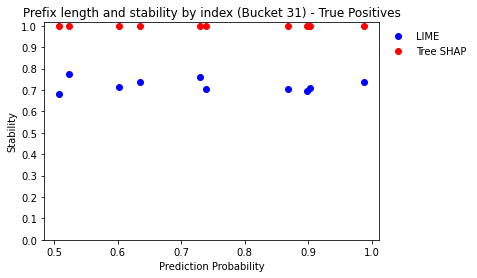

False Negatives
Average LIME Stability: 0.7171111111111111
Average SHAP Stability: 1.0


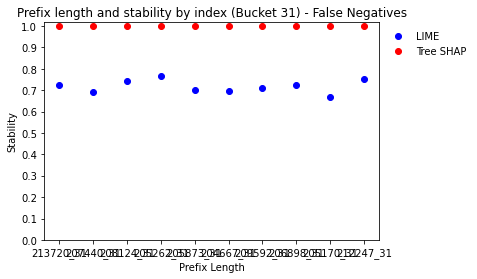

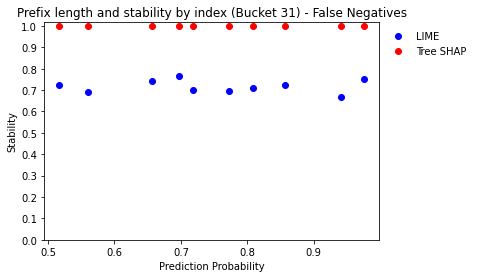

False Positives
Average LIME Stability: 0.7173512544802867
Average SHAP Stability: 1.0


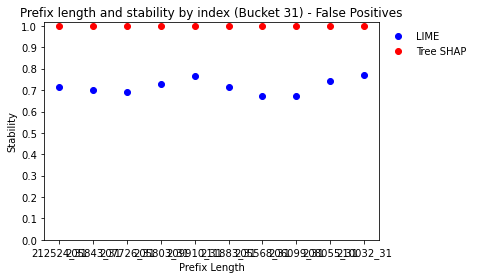

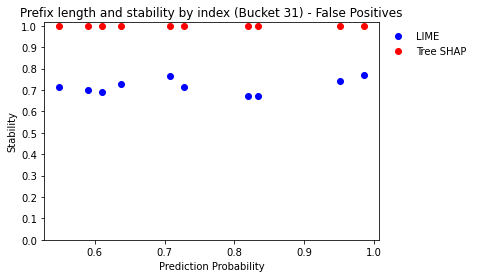

Bucket 32
True Negatives
Average LIME Stability: 0.7087060931899641
Average SHAP Stability: 1.0


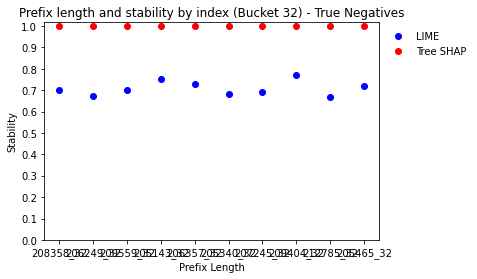

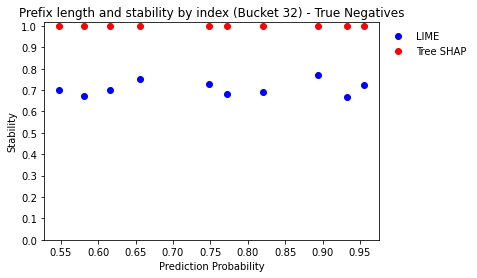

True Positives
Average LIME Stability: 0.7130286738351255
Average SHAP Stability: 1.0


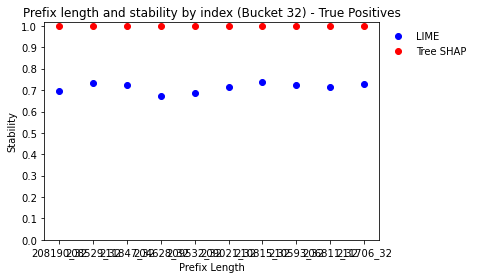

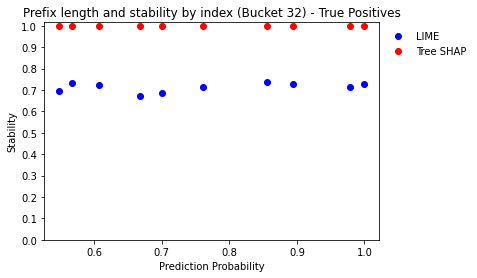

False Negatives
Average LIME Stability: 0.6988602150537634
Average SHAP Stability: 1.0


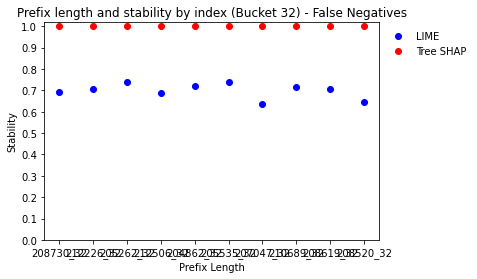

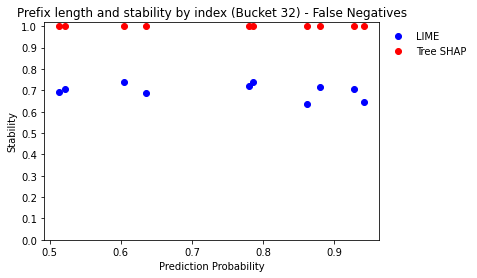

False Positives
Average LIME Stability: 0.7070250896057347
Average SHAP Stability: 1.0


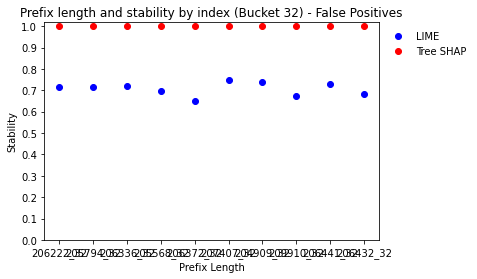

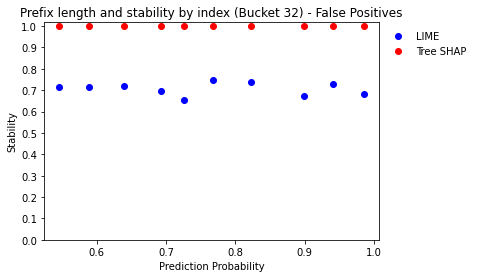

Bucket 33
True Negatives
Average LIME Stability: 0.7793082437275985
Average SHAP Stability: 1.0


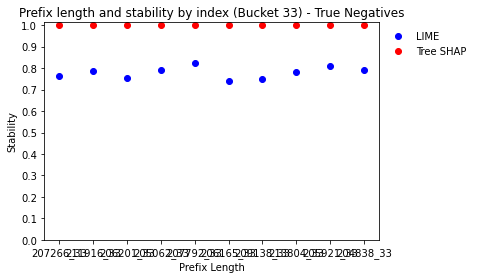

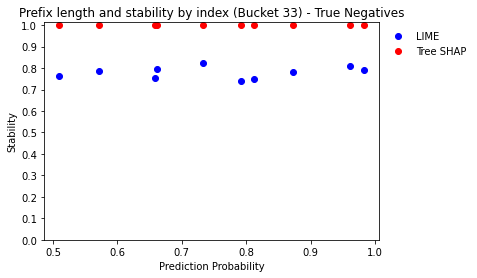

True Positives
Average LIME Stability: 0.7689820788530466
Average SHAP Stability: 1.0


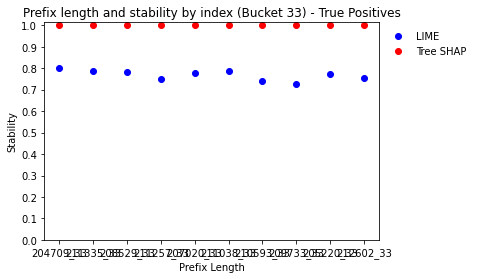

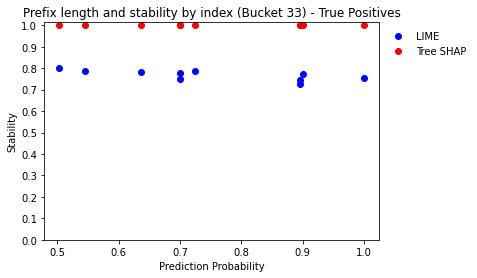

False Negatives
Average LIME Stability: 0.7406451612903225
Average SHAP Stability: 1.0


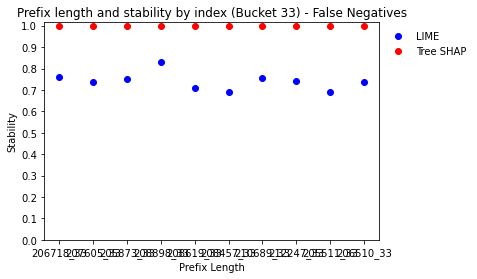

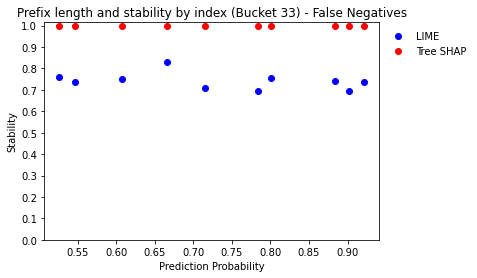

False Positives
Average LIME Stability: 0.7368028673835125
Average SHAP Stability: 1.0


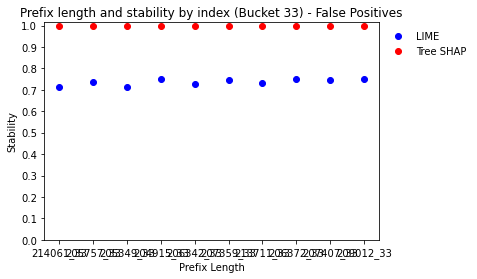

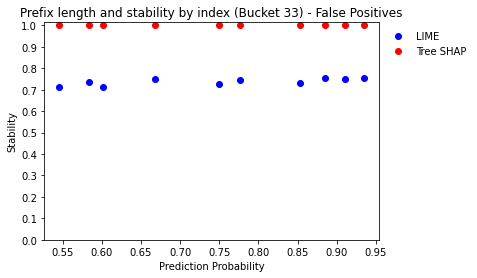

Bucket 34
True Negatives
Average LIME Stability: 0.7776272401433691
Average SHAP Stability: 1.0


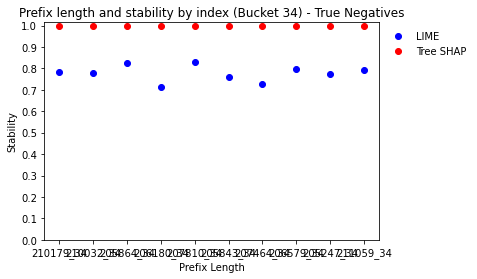

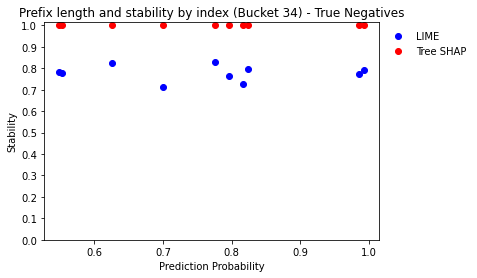

True Positives
Average LIME Stability: 0.770663082437276
Average SHAP Stability: 1.0


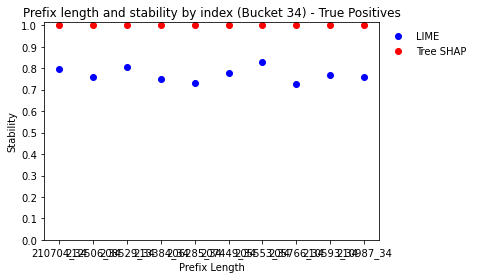

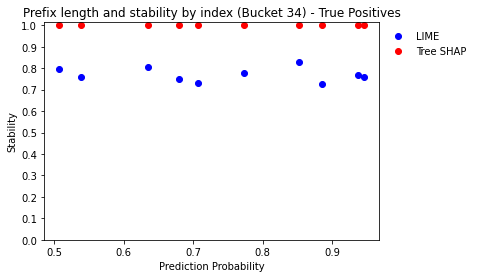

False Negatives
Average LIME Stability: 0.758415770609319
Average SHAP Stability: 1.0


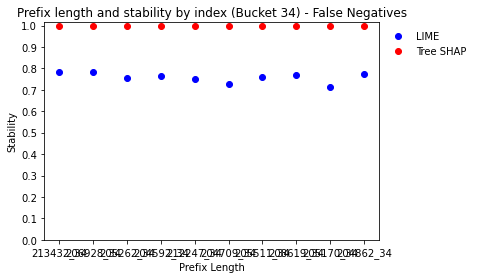

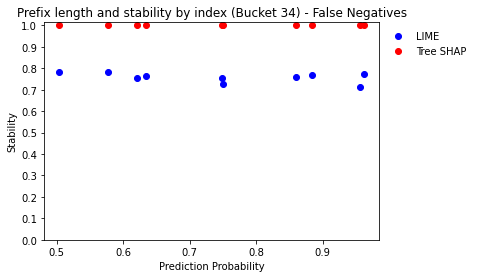

False Positives
Average LIME Stability: 0.7617777777777778
Average SHAP Stability: 1.0


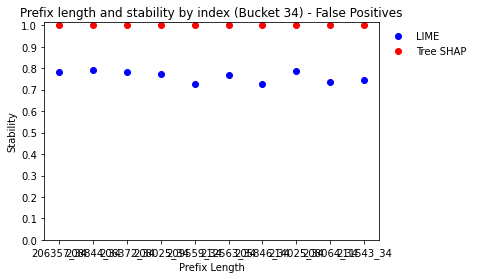

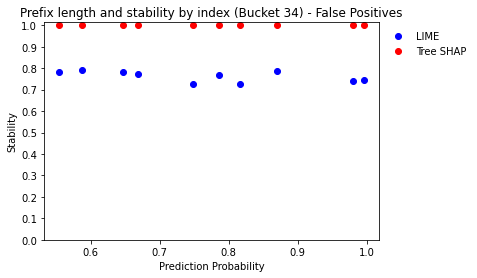

Bucket 35
True Negatives
Average LIME Stability: 0.7401648745519713
Average SHAP Stability: 1.0


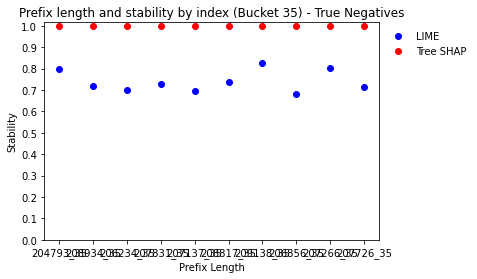

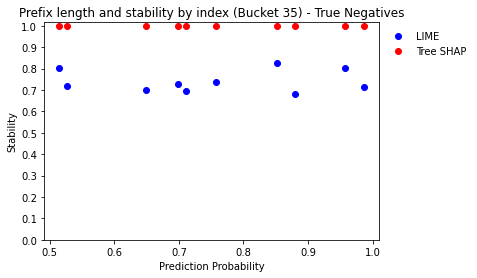

True Positives
Average LIME Stability: 0.7725842293906809
Average SHAP Stability: 1.0


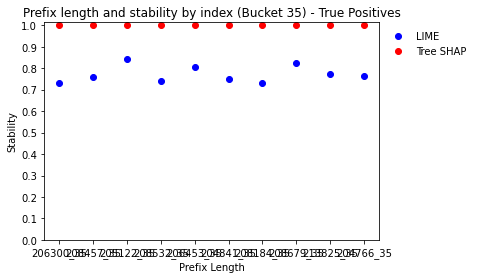

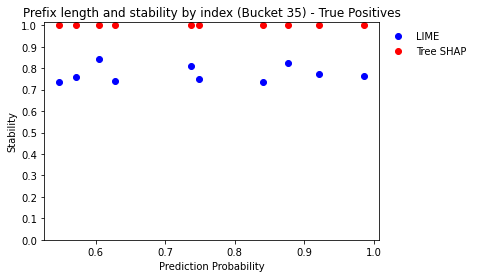

False Negatives
Average LIME Stability: 0.7512114695340502
Average SHAP Stability: 1.0


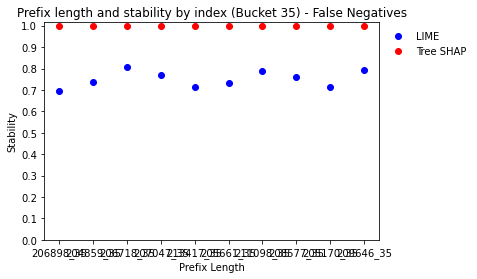

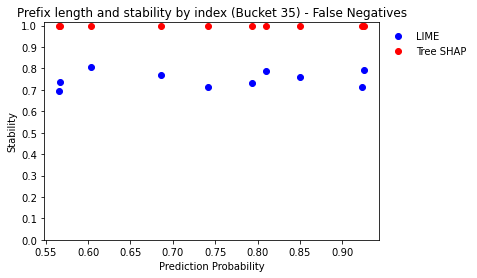

False Positives
Average LIME Stability: 0.7540931899641576
Average SHAP Stability: 1.0


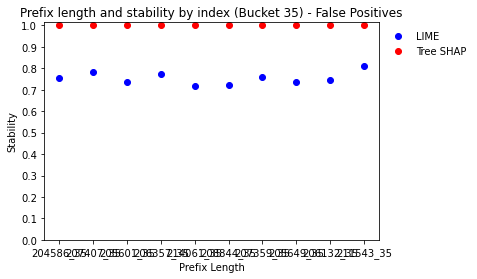

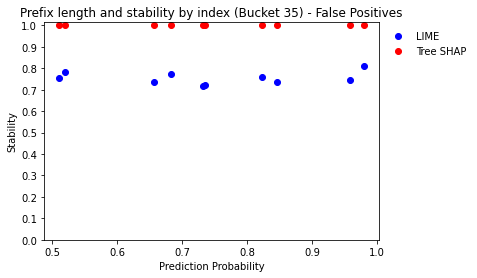

Bucket 36
True Negatives
Average LIME Stability: 0.7857921146953405
Average SHAP Stability: 1.0


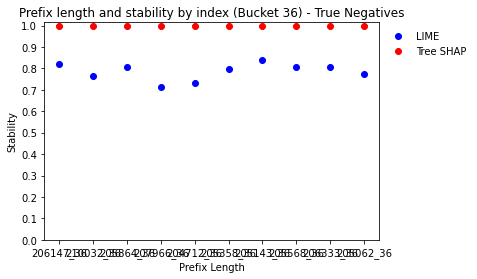

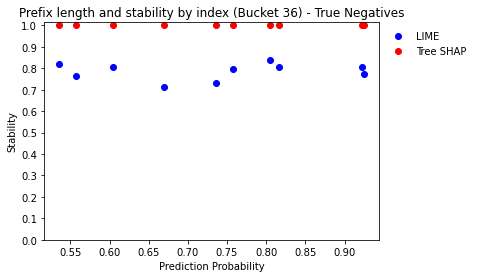

True Positives
Average LIME Stability: 0.7812293906810036
Average SHAP Stability: 1.0


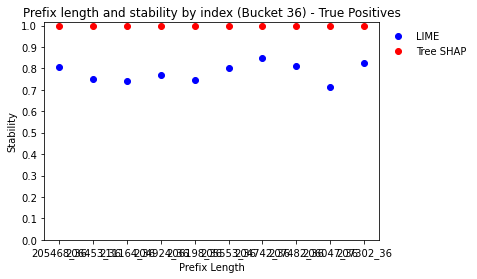

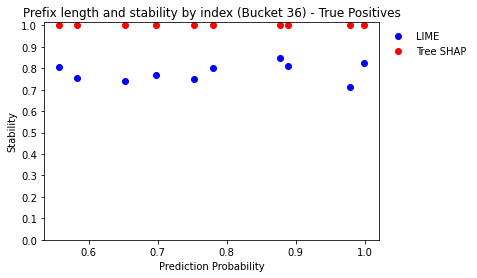

False Negatives
Average LIME Stability: 0.780669056152927
Average SHAP Stability: 1.0


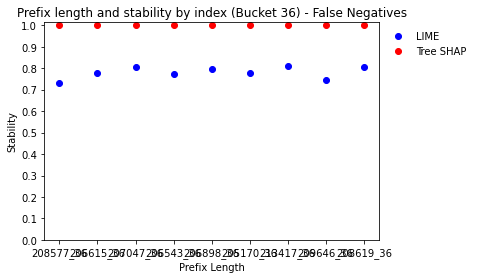

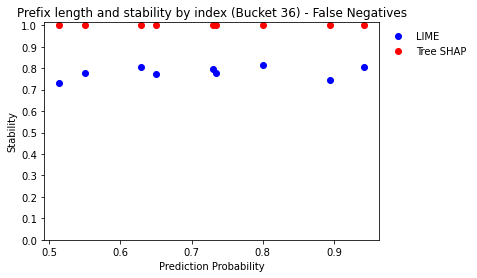

False Positives
Average LIME Stability: 0.7694623655913978
Average SHAP Stability: 1.0


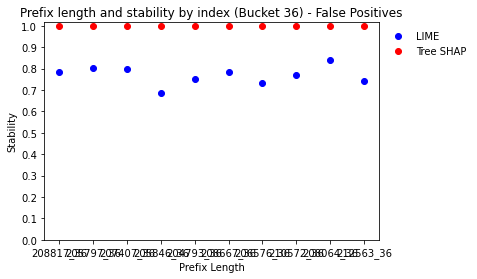

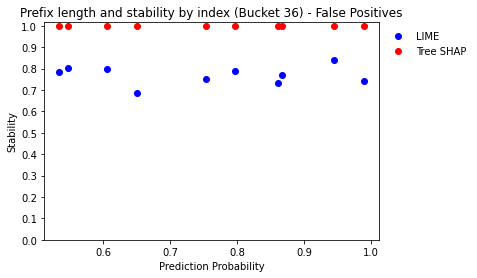

Bucket 37
True Negatives
Average LIME Stability: 0.7670609318996415
Average SHAP Stability: 1.0


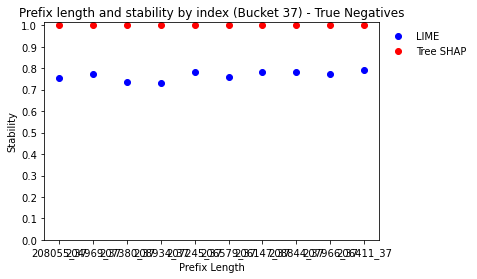

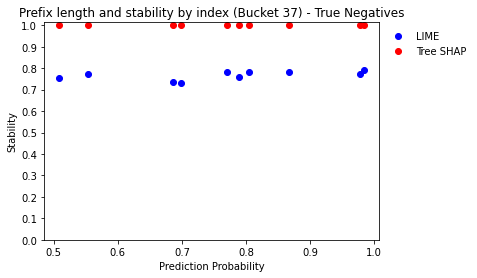

True Positives
Average LIME Stability: 0.7327204301075269
Average SHAP Stability: 1.0


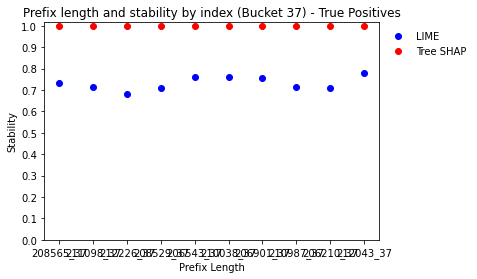

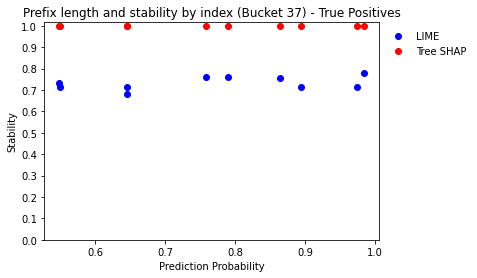

False Negatives
Average LIME Stability: 0.7766666666666666
Average SHAP Stability: 1.0


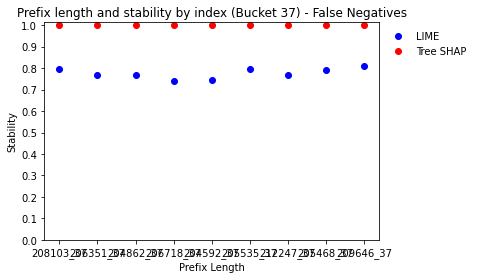

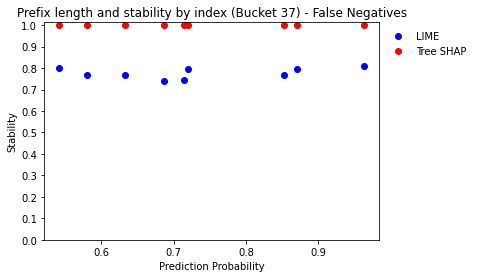

False Positives
Average LIME Stability: 0.7656200716845878
Average SHAP Stability: 1.0


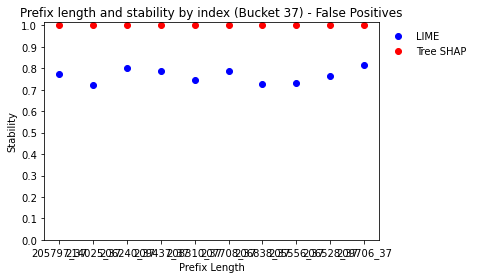

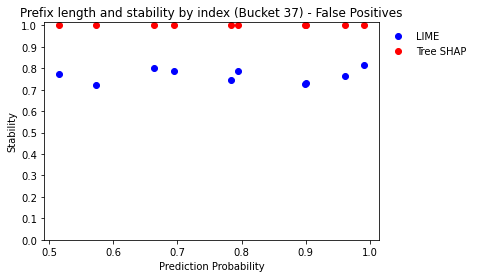

Bucket 38
True Negatives
Average LIME Stability: 0.7759462365591397
Average SHAP Stability: 1.0


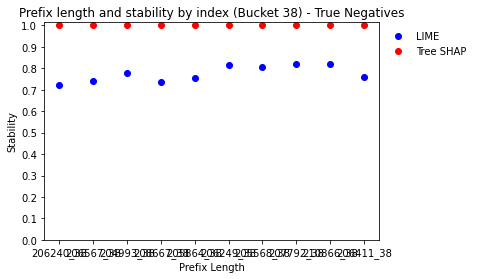

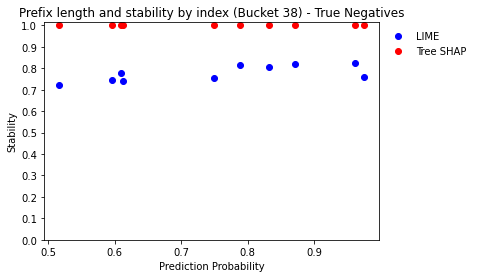

True Positives
Average LIME Stability: 0.7850716845878136
Average SHAP Stability: 1.0


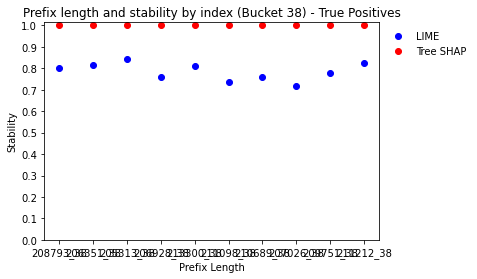

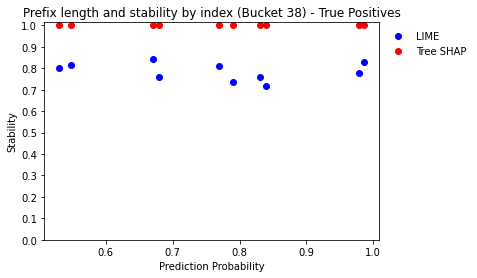

False Negatives
Average LIME Stability: 0.7766666666666666
Average SHAP Stability: 1.0


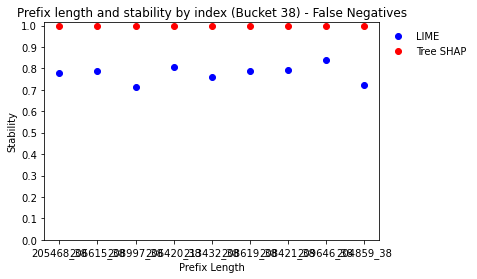

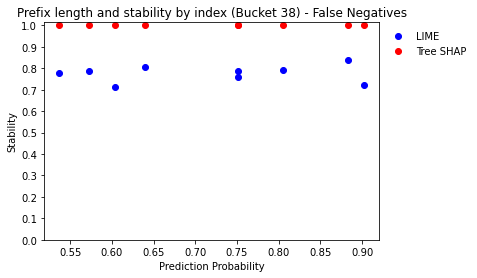

False Positives
Average LIME Stability: 0.786032258064516
Average SHAP Stability: 1.0


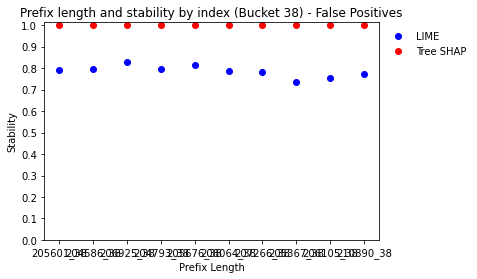

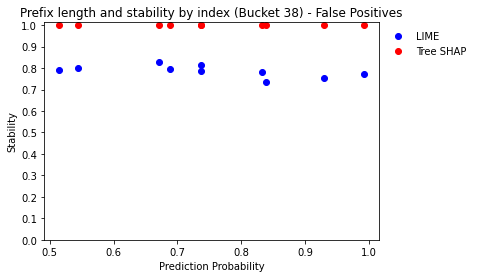

Bucket 39
True Negatives
Average LIME Stability: 0.8050035842293907
Average SHAP Stability: 1.0


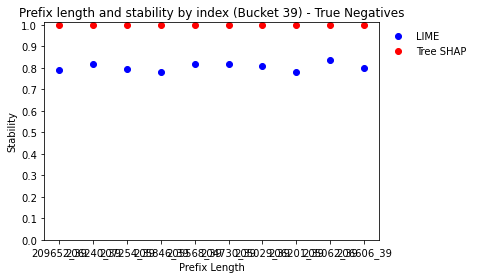

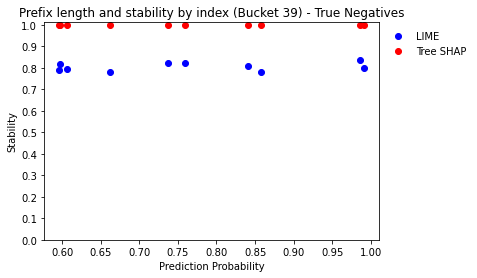

True Positives
Average LIME Stability: 0.7629784946236559
Average SHAP Stability: 1.0


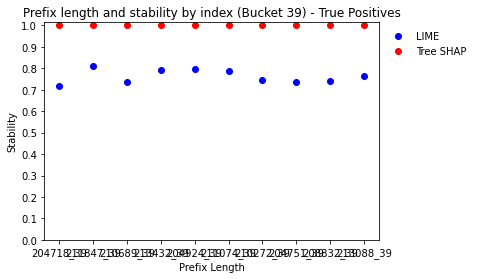

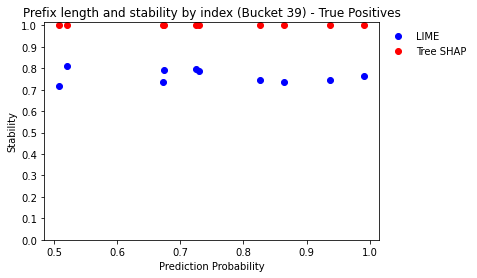

False Negatives
Average LIME Stability: 0.7673277578653922
Average SHAP Stability: 1.0


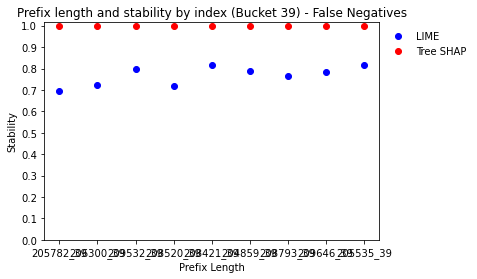

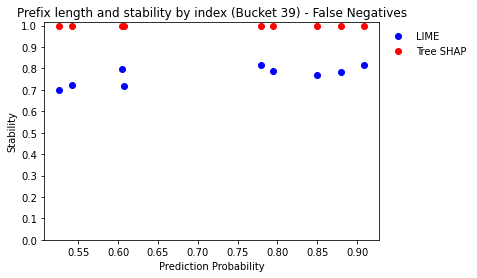

False Positives
Average LIME Stability: 0.7757060931899641
Average SHAP Stability: 1.0


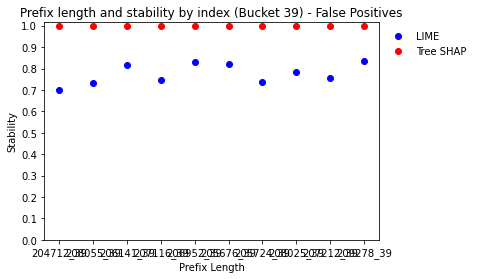

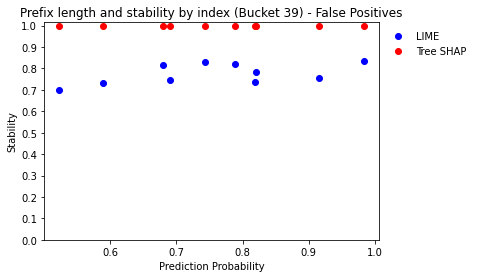

Bucket 40
True Negatives
Average LIME Stability: 0.7452078853046594
Average SHAP Stability: 1.0


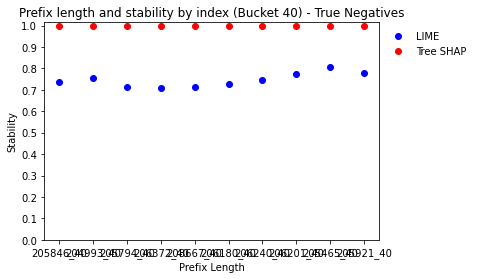

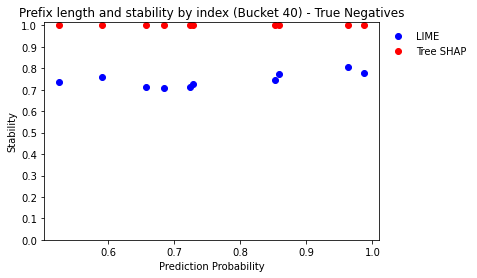

True Positives
Average LIME Stability: 0.7692222222222221
Average SHAP Stability: 1.0


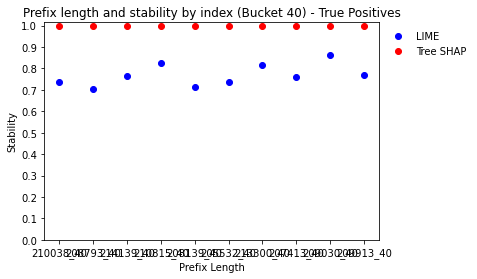

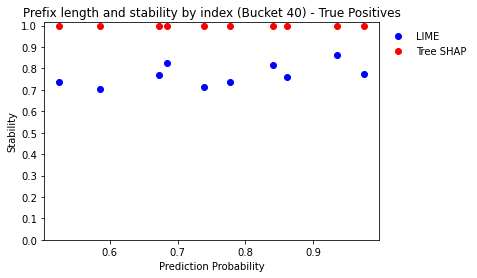

False Negatives
Average LIME Stability: 0.762858422939068
Average SHAP Stability: 1.0


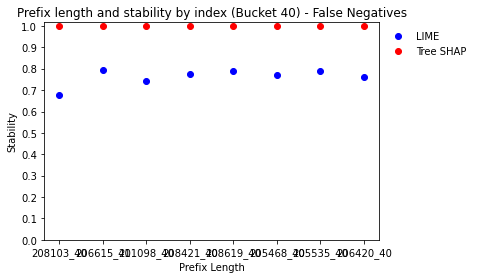

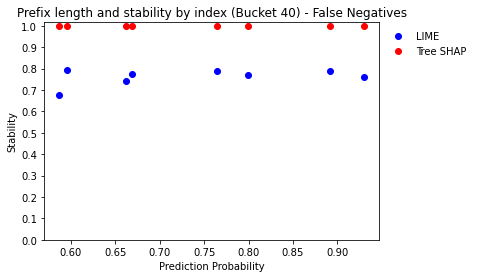

False Positives
Average LIME Stability: 0.7416057347670251
Average SHAP Stability: 1.0


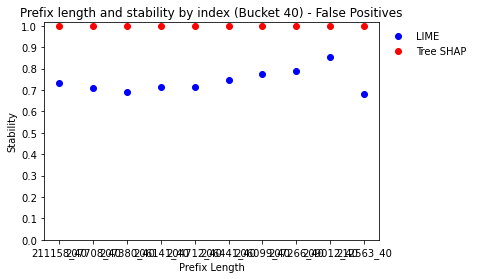

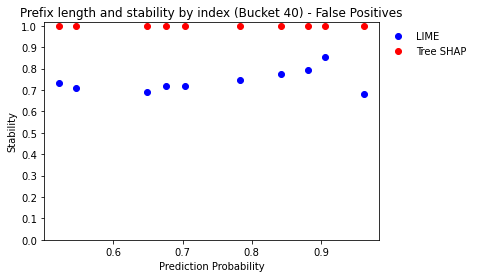

In [5]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['lime_stability'])
                tree_shap_stability = pd.Series(data['tree_shap_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Stability:", statistics.mean(lime_stability))
                print("Average SHAP Stability:", statistics.mean(tree_shap_stability))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1.1, 0.1))
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1.1, 0.1))
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()

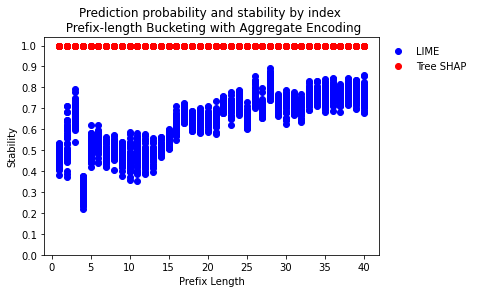

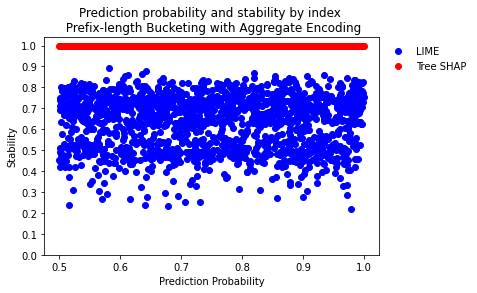

In [6]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1.1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Aggregate Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1.1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Aggregate Encoding")
plt.show()

Bucket 1
True Negatives
Average LIME Weights Stability: 0.07233401017811081
Average SHAP Weights Stability: 1.984037046603447e-16
10


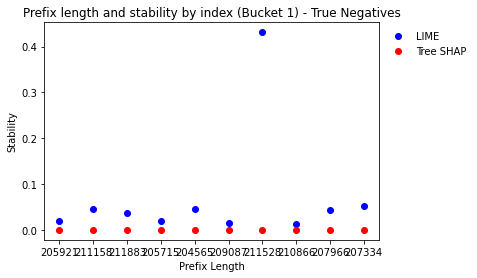

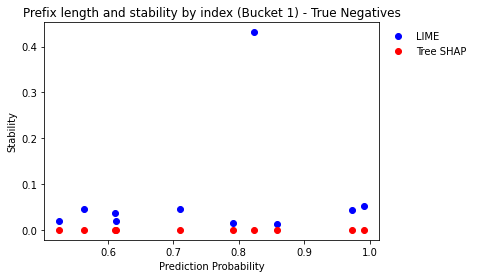

True Positives
Average LIME Weights Stability: 0.03394086802711832
Average SHAP Weights Stability: 1.4334625178170525e-16
10


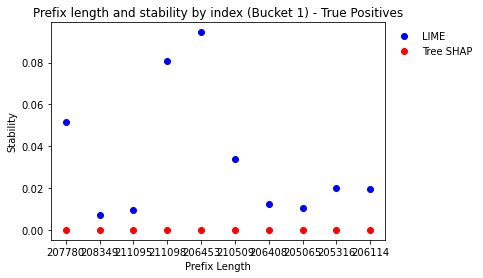

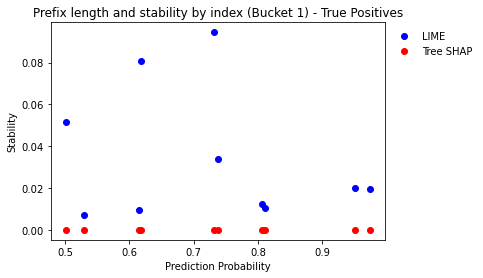

Bucket 2
True Negatives
Average LIME Weights Stability: 0.08775125889438146
Average SHAP Weights Stability: 1.4574853652018089e-16
10


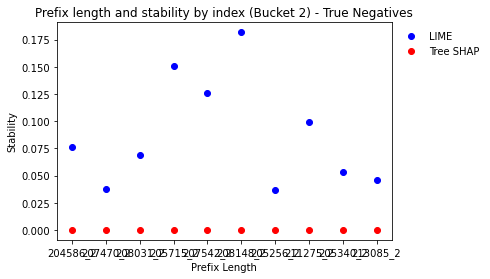

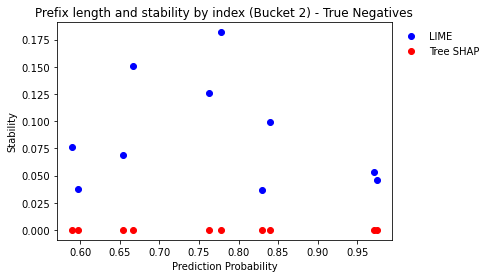

True Positives
Average LIME Weights Stability: 0.12224492059030798
Average SHAP Weights Stability: 1.4084536397885196e-16
10


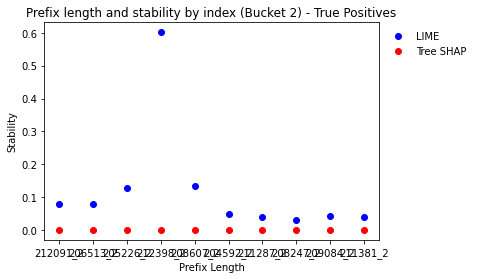

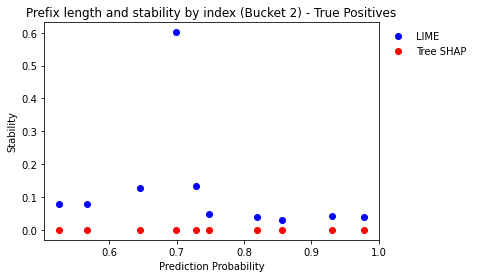

Bucket 3
True Negatives
Average LIME Weights Stability: 0.05665367433886395
Average SHAP Weights Stability: 1.984540448164906e-16
10


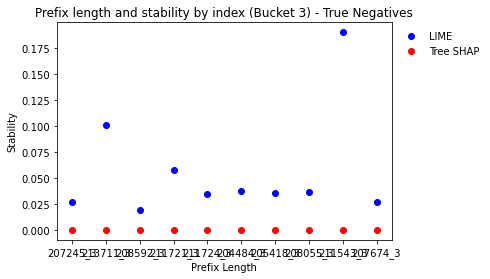

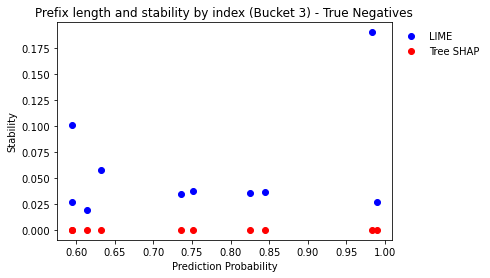

True Positives
Average LIME Weights Stability: 0.04350251597698826
Average SHAP Weights Stability: 2.4473569924252027e-16
10


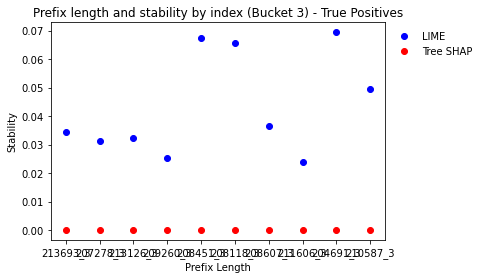

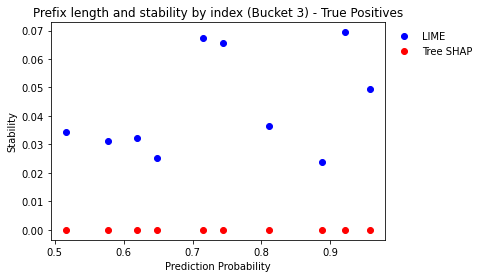

Bucket 4
True Negatives
Average LIME Weights Stability: 0.34410416223008866
Average SHAP Weights Stability: 1.3531014639345729e-16
10


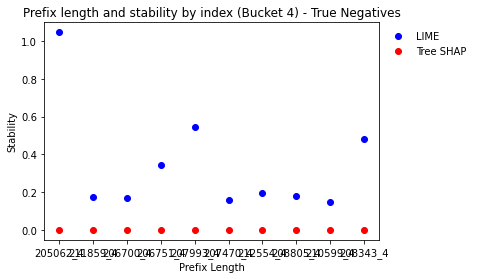

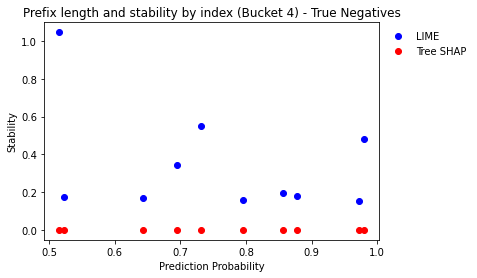

True Positives
Average LIME Weights Stability: 0.4253788822077442
Average SHAP Weights Stability: 1.7143441253235274e-16
10


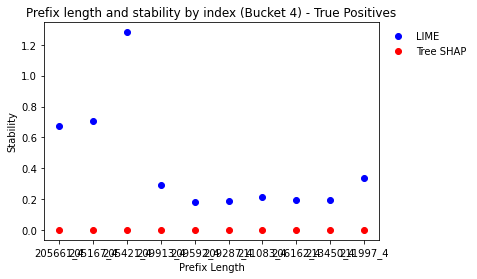

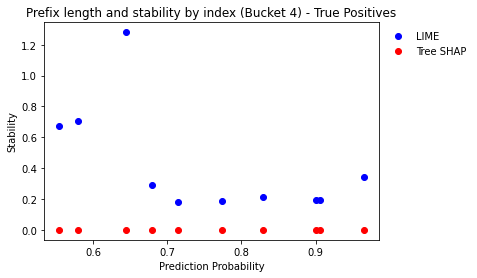

Bucket 5
True Negatives
Average LIME Weights Stability: 1.9417566112648719
Average SHAP Weights Stability: 1.3309417019271946e-16
10


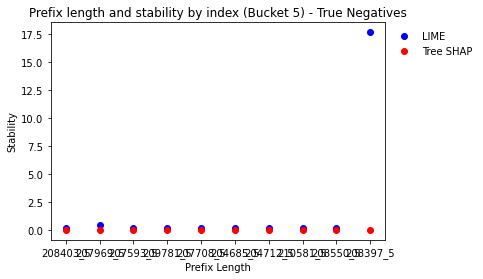

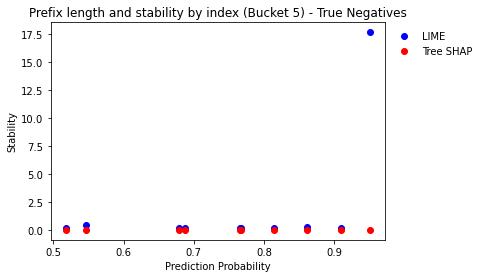

True Positives
Average LIME Weights Stability: 0.30093438636126185
Average SHAP Weights Stability: 1.2920356783188518e-16
10


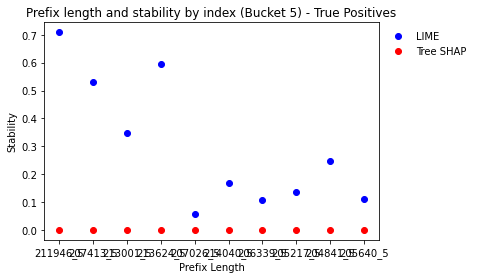

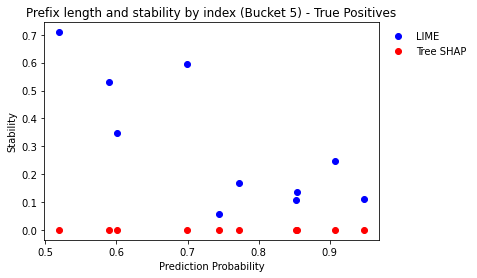

Bucket 6
True Negatives
Average LIME Weights Stability: 0.2255843628451382
Average SHAP Weights Stability: 1.57242043624642e-16
10


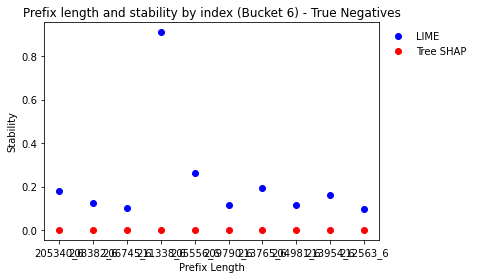

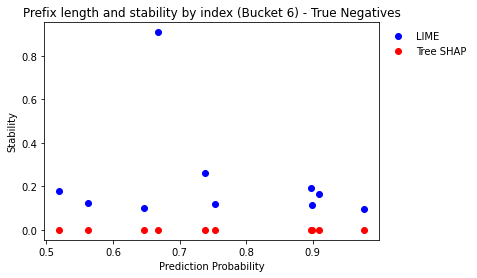

True Positives
Average LIME Weights Stability: 0.20533615571948122
Average SHAP Weights Stability: 1.310852975590798e-16
10


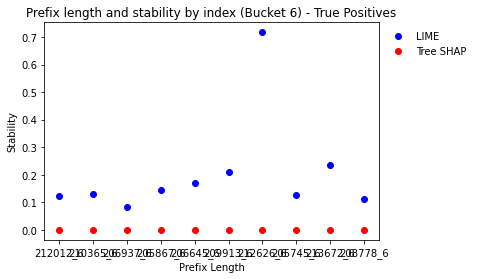

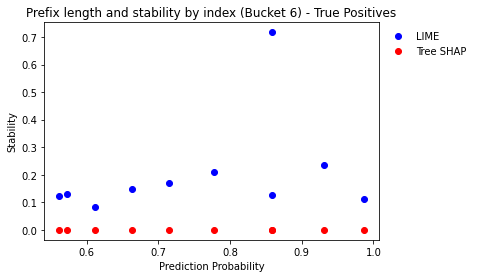

Bucket 7
True Negatives
Average LIME Weights Stability: 0.39361659969480467
Average SHAP Weights Stability: 1.7098778935586593e-16
10


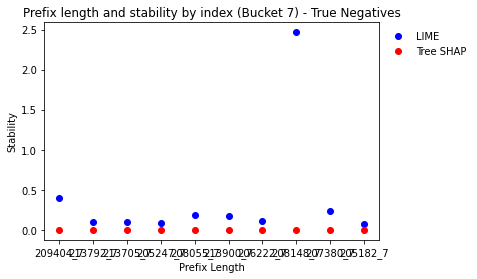

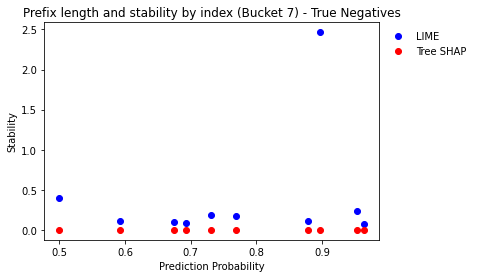

True Positives
Average LIME Weights Stability: 0.21331584006556203
Average SHAP Weights Stability: 1.6246543785609777e-16
10


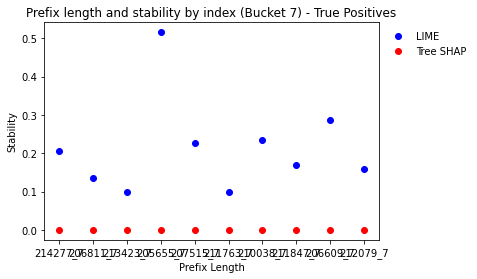

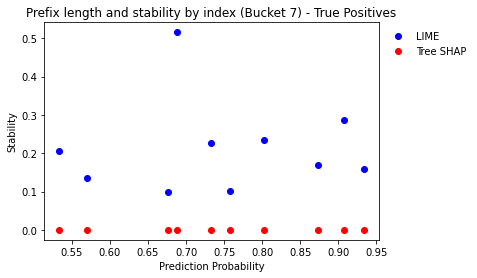

Bucket 8
True Negatives
Average LIME Weights Stability: 0.33589758439725764
Average SHAP Weights Stability: 1.6672245486931693e-16
10


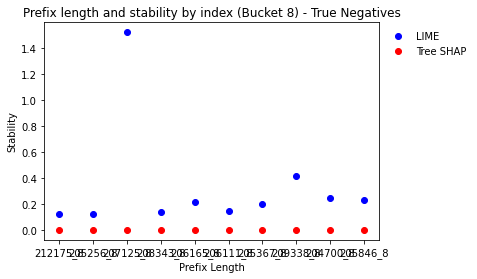

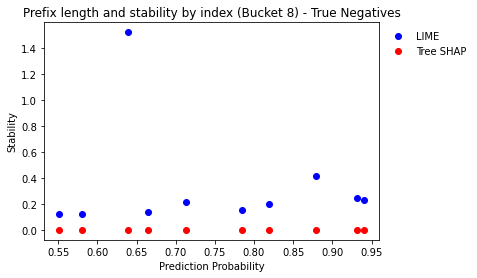

True Positives
Average LIME Weights Stability: 0.20301419891783692
Average SHAP Weights Stability: 1.4564511045302776e-16
10


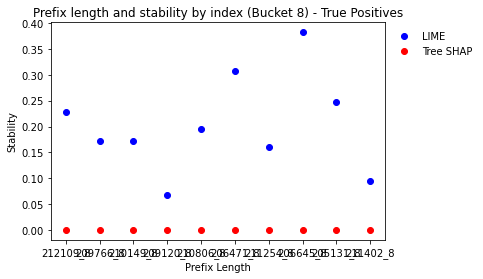

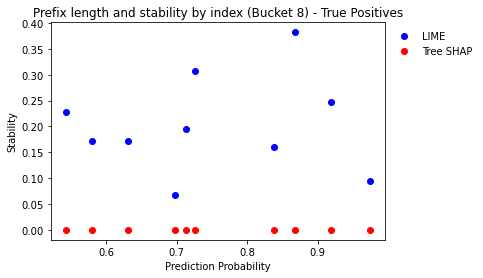

Bucket 9
True Negatives
Average LIME Weights Stability: 0.27974229250275273
Average SHAP Weights Stability: 1.7005215572306816e-16
10


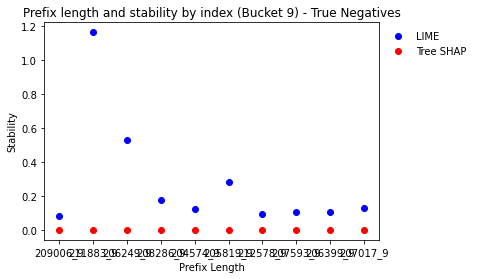

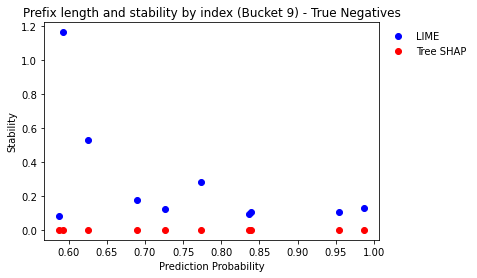

True Positives
Average LIME Weights Stability: 0.1350533969496299
Average SHAP Weights Stability: 1.2177031374144773e-16
10


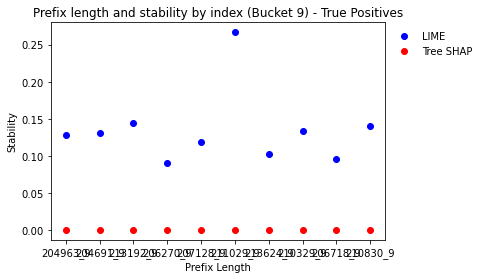

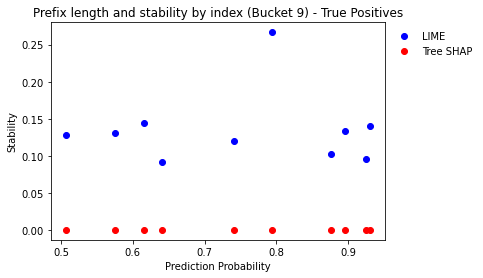

Bucket 10
True Negatives
Average LIME Weights Stability: 0.2512988477167132
Average SHAP Weights Stability: 1.7472734527361615e-16
10


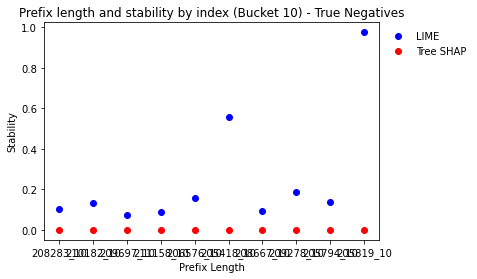

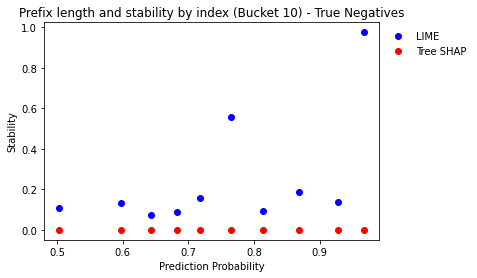

True Positives
Average LIME Weights Stability: 0.16085461918683347
Average SHAP Weights Stability: 1.6510761867855153e-16
10


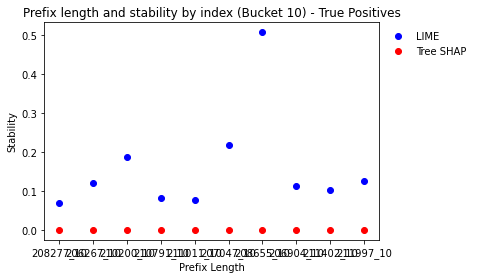

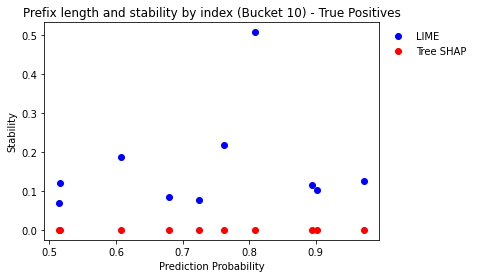

Bucket 11
True Negatives
Average LIME Weights Stability: 0.1370713366599691
Average SHAP Weights Stability: 1.4789998763470429e-16
10


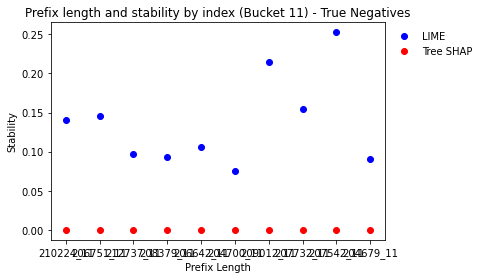

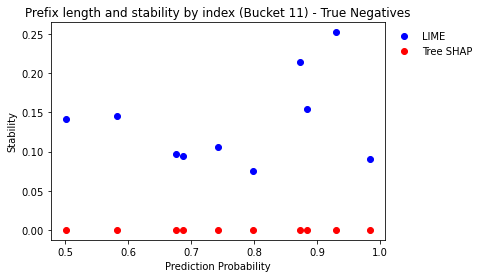

True Positives
Average LIME Weights Stability: 0.15801679359563064
Average SHAP Weights Stability: 1.4681643376841254e-16
10


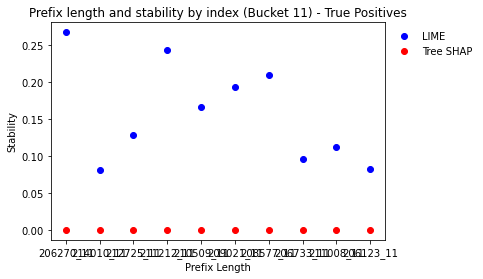

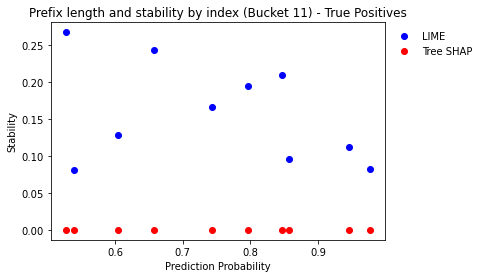

Bucket 12
True Negatives
Average LIME Weights Stability: 0.18960017887756508
Average SHAP Weights Stability: 1.2944469470814945e-16
10


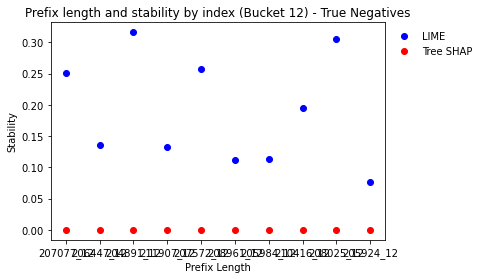

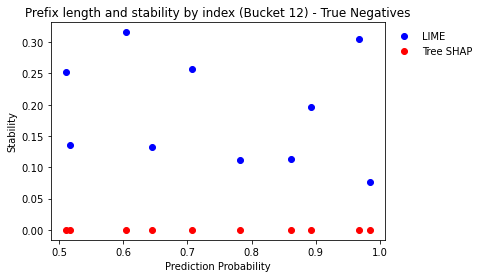

True Positives
Average LIME Weights Stability: 0.19402754678432732
Average SHAP Weights Stability: 1.495369306067255e-16
10


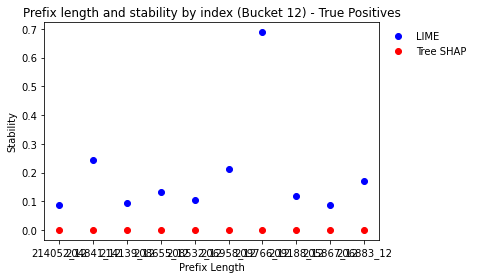

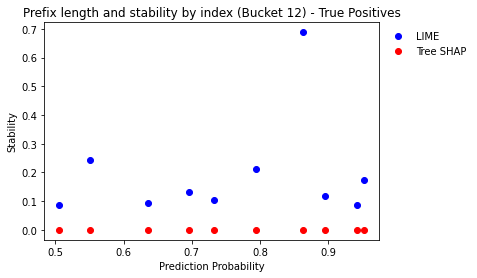

Bucket 13
True Negatives
Average LIME Weights Stability: 0.1691494218831312
Average SHAP Weights Stability: 1.4358167747646138e-16
10


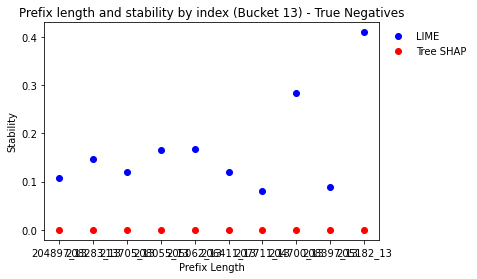

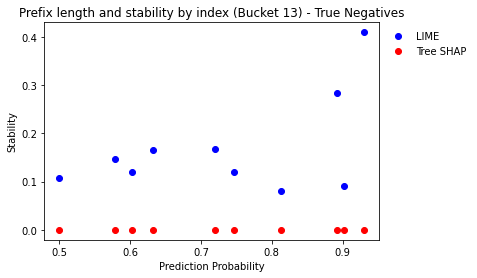

True Positives
Average LIME Weights Stability: 0.5717363623649852
Average SHAP Weights Stability: 1.243546692862426e-16
10


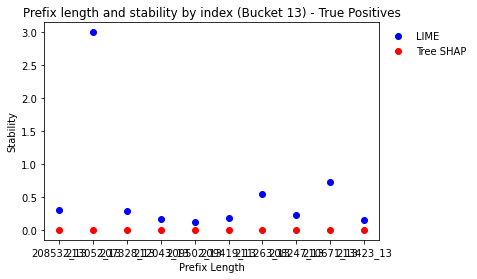

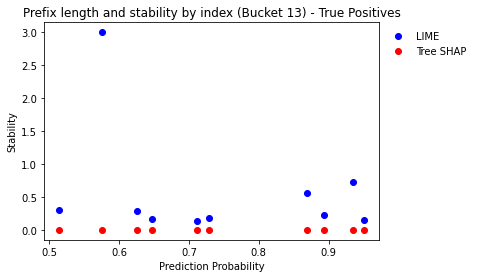

Bucket 14
True Negatives
Average LIME Weights Stability: 0.20572401257333306
Average SHAP Weights Stability: 1.2595859755152022e-16
10


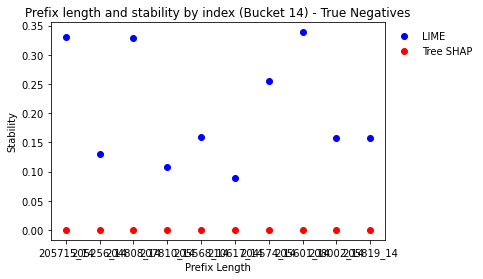

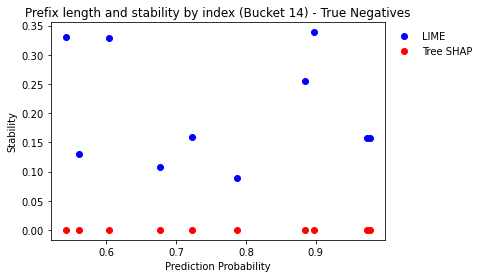

True Positives
Average LIME Weights Stability: 0.11282244928663766
Average SHAP Weights Stability: 1.6318750690951925e-16
10


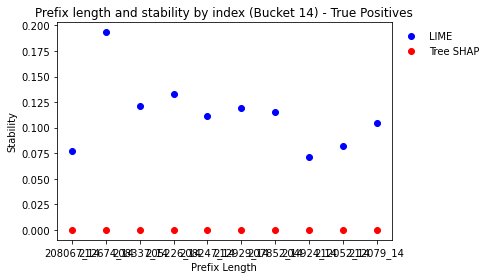

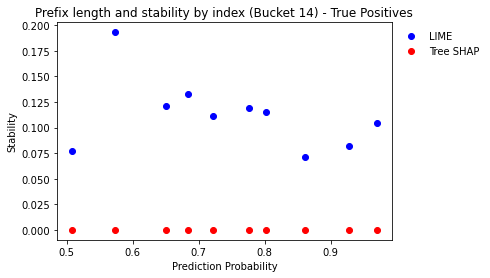

Bucket 15
True Negatives
Average LIME Weights Stability: 0.22795063125439968
Average SHAP Weights Stability: 1.6049127293435072e-16
10


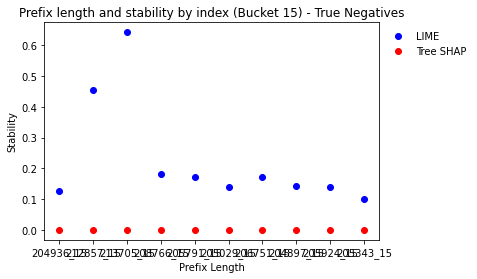

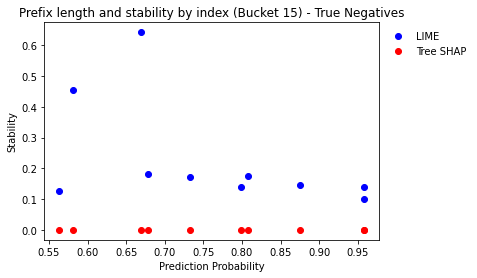

True Positives
Average LIME Weights Stability: 0.14922418650545718
Average SHAP Weights Stability: 1.572551914607046e-16
10


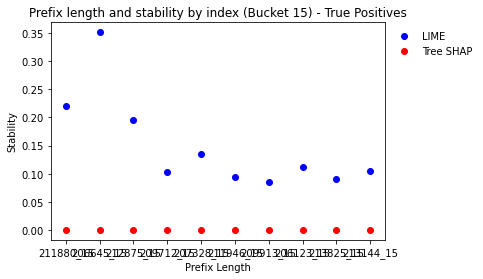

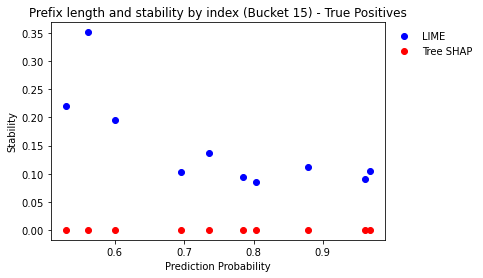

Bucket 16
True Negatives
Average LIME Weights Stability: 0.16188110518276733
Average SHAP Weights Stability: 1.6800396356617033e-16
10


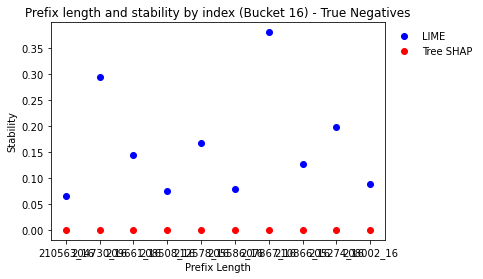

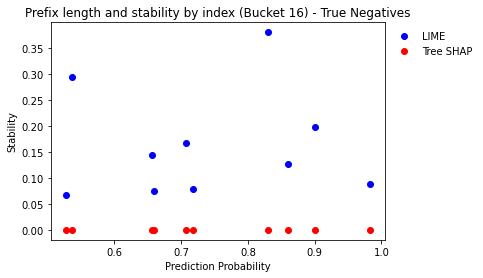

True Positives
Average LIME Weights Stability: 0.7119702272240302
Average SHAP Weights Stability: 1.4446719861801543e-16
10


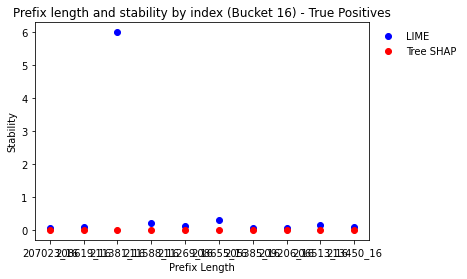

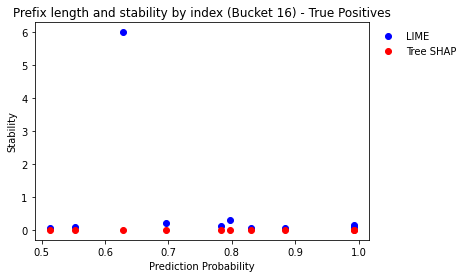

Bucket 17
True Negatives
Average LIME Weights Stability: 0.16930199378803235
Average SHAP Weights Stability: 1.3852305066469686e-16
10


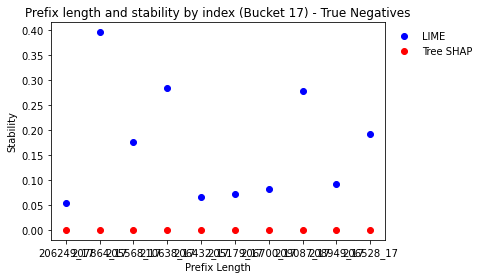

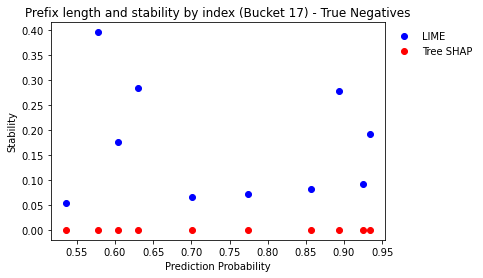

True Positives
Average LIME Weights Stability: 0.22085990540363387
Average SHAP Weights Stability: 1.738831174139369e-16
10


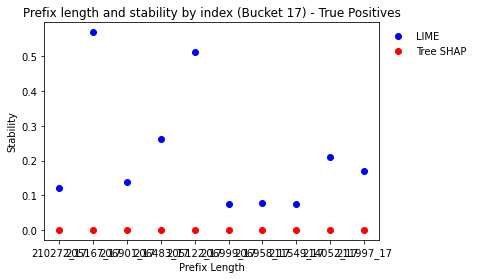

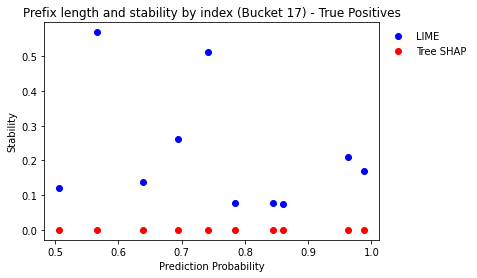

Bucket 18
True Negatives
Average LIME Weights Stability: 0.4080509137650801
Average SHAP Weights Stability: 1.468558825882596e-16
10


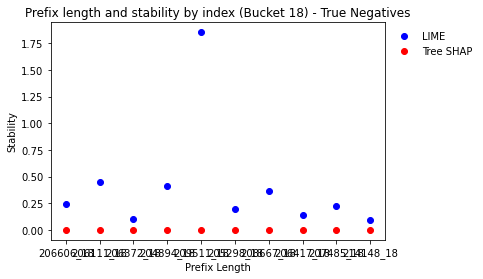

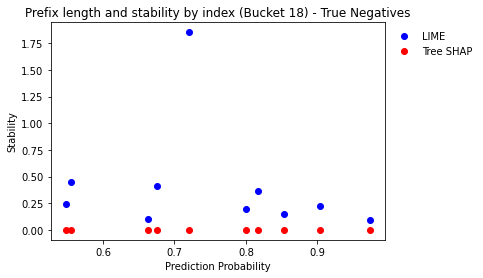

True Positives
Average LIME Weights Stability: 0.14585814014986875
Average SHAP Weights Stability: 1.8506358197313973e-16
10


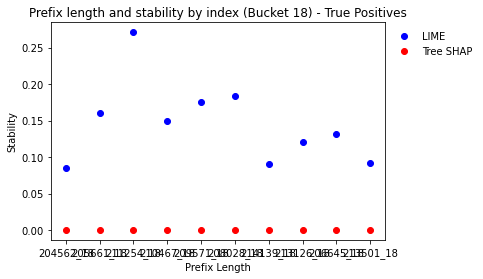

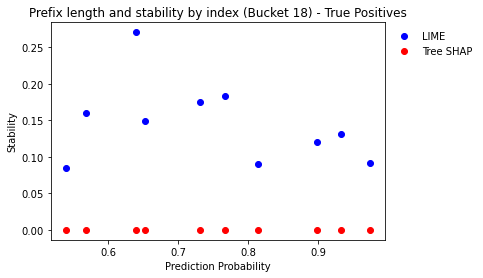

Bucket 19
True Negatives
Average LIME Weights Stability: 0.1518451398148219
Average SHAP Weights Stability: 1.3176895183123058e-16
10


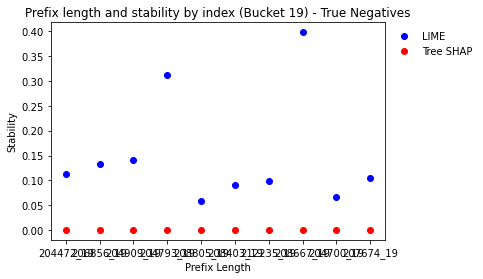

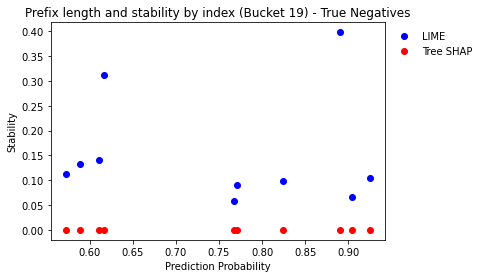

True Positives
Average LIME Weights Stability: 0.10984017218233347
Average SHAP Weights Stability: 1.7302449196811724e-16
10


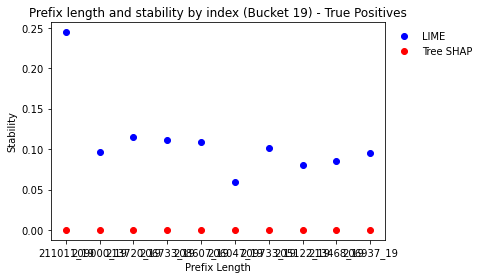

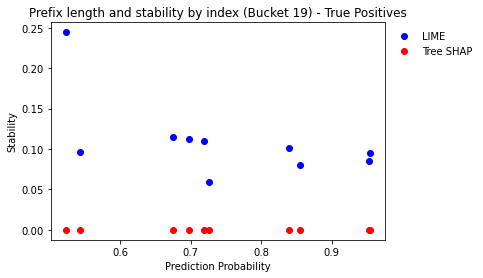

Bucket 20
True Negatives
Average LIME Weights Stability: 0.3053075712176833
Average SHAP Weights Stability: 1.6339299579978072e-16
10


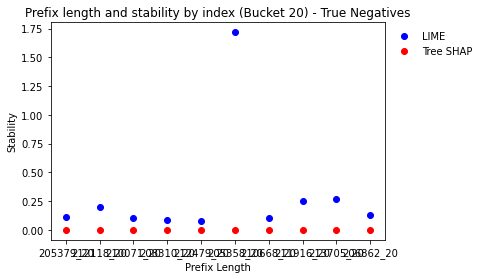

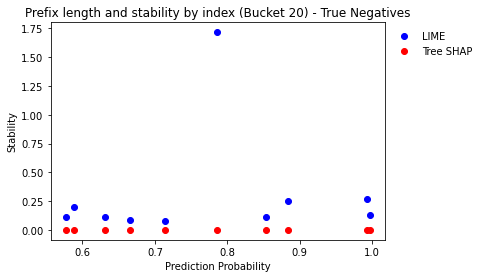

True Positives
Average LIME Weights Stability: 0.1487437090666337
Average SHAP Weights Stability: 1.5577909456586354e-16
10


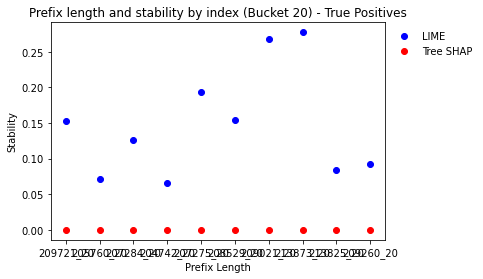

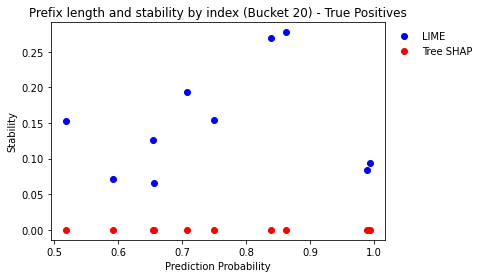

Bucket 21
True Negatives
Average LIME Weights Stability: 0.8384223777698732
Average SHAP Weights Stability: 1.638893443587605e-16
10


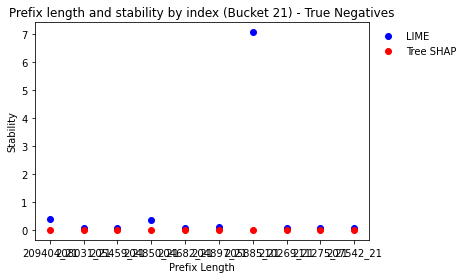

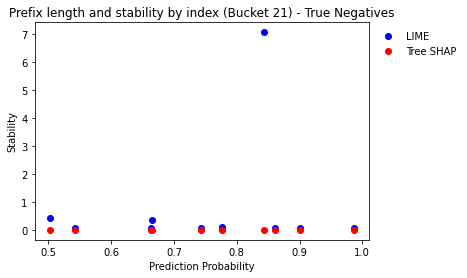

True Positives
Average LIME Weights Stability: 0.13419307353668636
Average SHAP Weights Stability: 1.520644294558752e-16
10


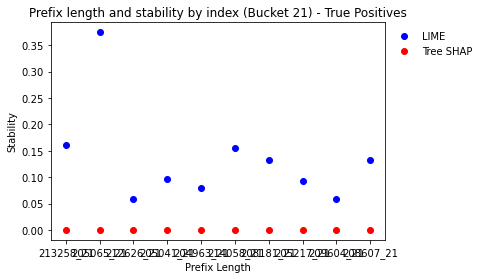

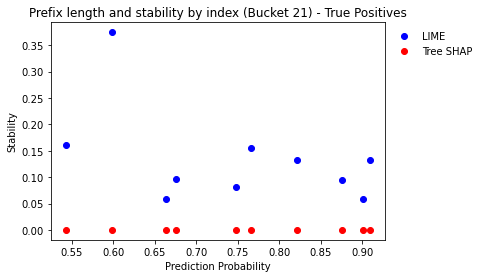

Bucket 22
True Negatives
Average LIME Weights Stability: 0.07518220165311168
Average SHAP Weights Stability: 1.8461878417791117e-16
10


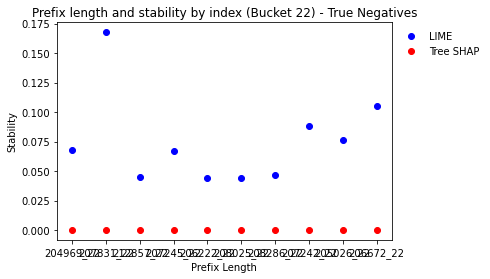

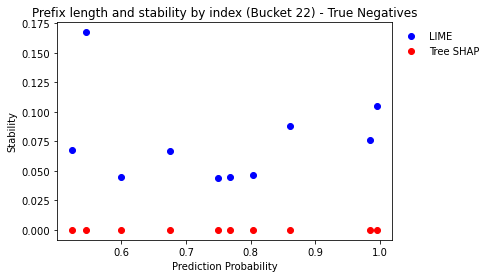

True Positives
Average LIME Weights Stability: 0.14044973345215336
Average SHAP Weights Stability: 1.830780892670326e-16
10


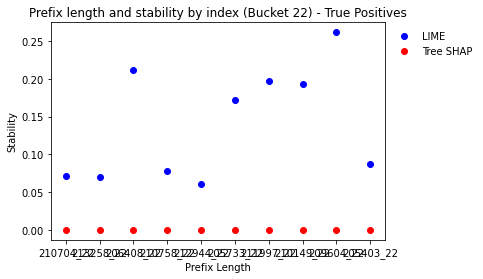

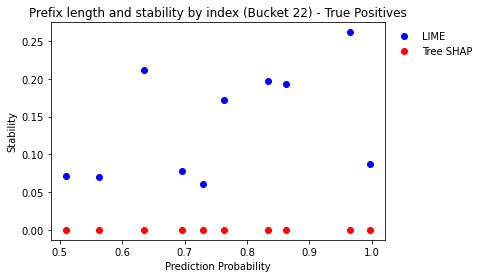

Bucket 23
True Negatives
Average LIME Weights Stability: 0.11938440879362419
Average SHAP Weights Stability: 1.744205023156386e-16
10


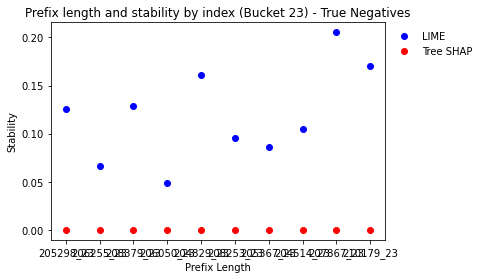

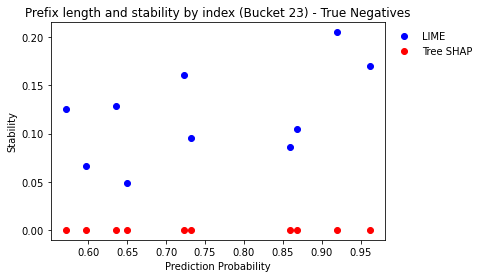

True Positives
Average LIME Weights Stability: 0.20042522812790167
Average SHAP Weights Stability: 1.7597537752215836e-16
10


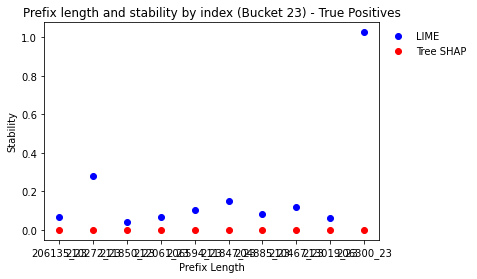

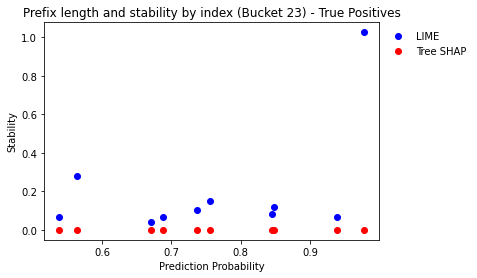

Bucket 24
True Negatives
Average LIME Weights Stability: 0.14089039681063742
Average SHAP Weights Stability: 1.5768248580280555e-16
10


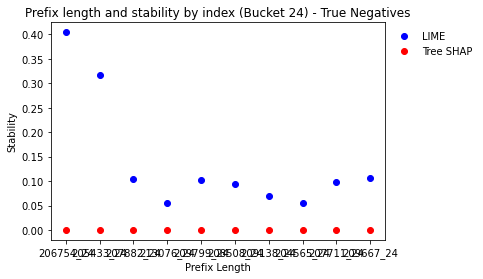

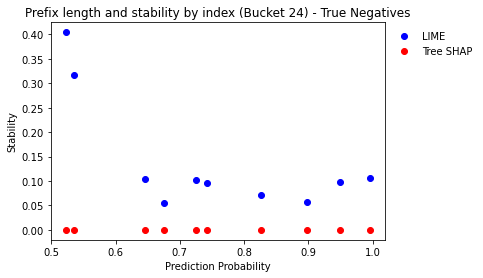

True Positives
Average LIME Weights Stability: 0.08858562522508548
Average SHAP Weights Stability: 1.583643361548306e-16
10


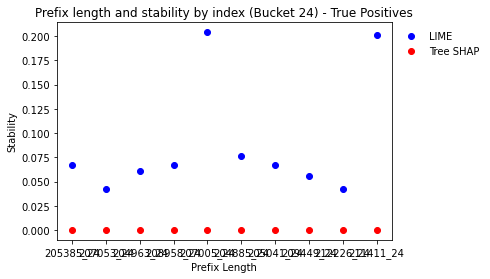

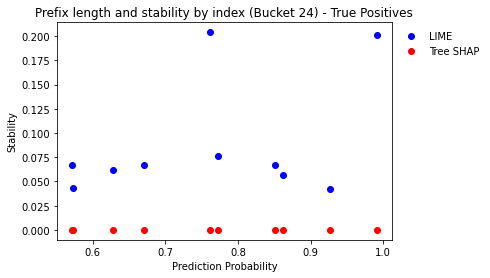

Bucket 25
True Negatives
Average LIME Weights Stability: 0.10311855412908294
Average SHAP Weights Stability: 1.793596160224863e-16
10


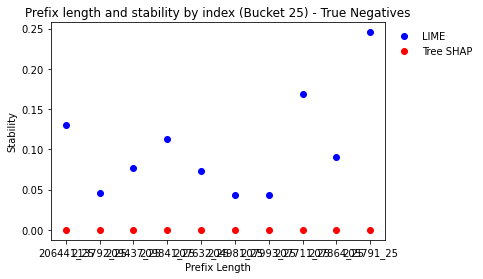

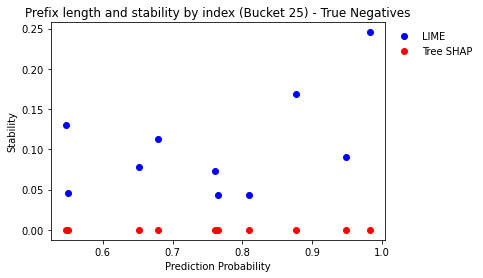

True Positives
Average LIME Weights Stability: 0.11715442192450877
Average SHAP Weights Stability: 1.5300699058758166e-16
10


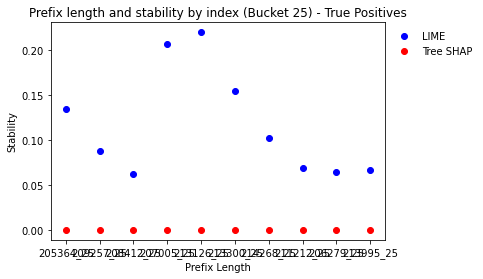

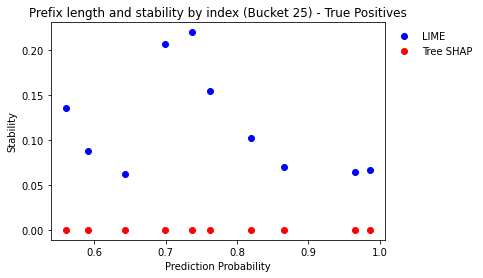

Bucket 26
True Negatives
Average LIME Weights Stability: 0.12951323057573308
Average SHAP Weights Stability: 1.5718040193689807e-16
10


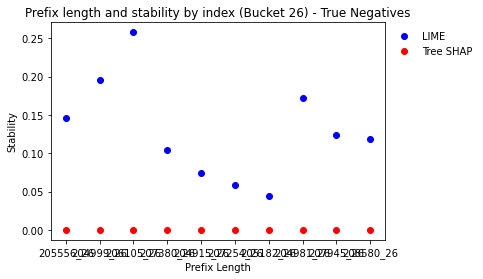

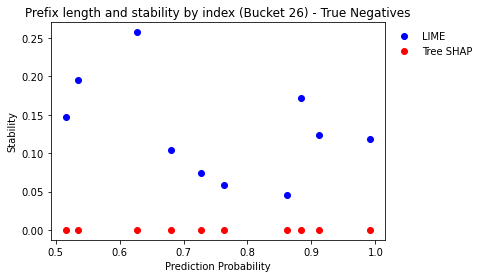

True Positives
Average LIME Weights Stability: 0.07578986942040228
Average SHAP Weights Stability: 1.5970173554224972e-16
10


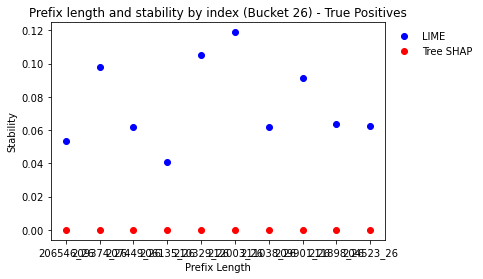

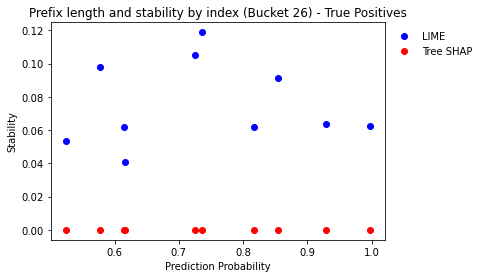

Bucket 27
True Negatives
Average LIME Weights Stability: 0.13090029775777576
Average SHAP Weights Stability: 2.2858058368901356e-16
10


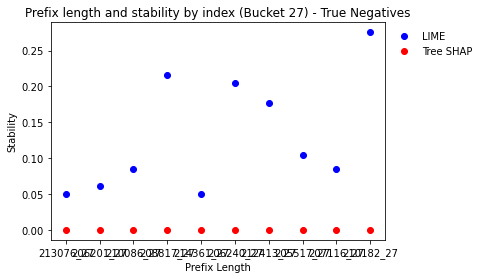

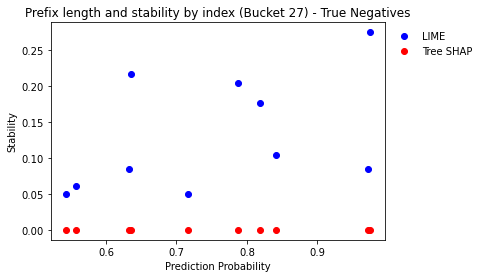

True Positives
Average LIME Weights Stability: 0.42474513682714243
Average SHAP Weights Stability: 1.7371400001447186e-16
10


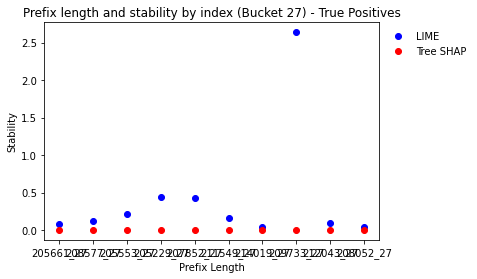

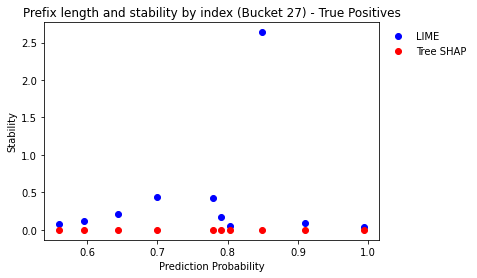

Bucket 28
True Negatives
Average LIME Weights Stability: 0.14533454993852288
Average SHAP Weights Stability: 1.919832601154884e-16
10


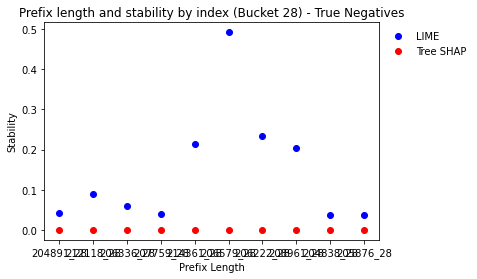

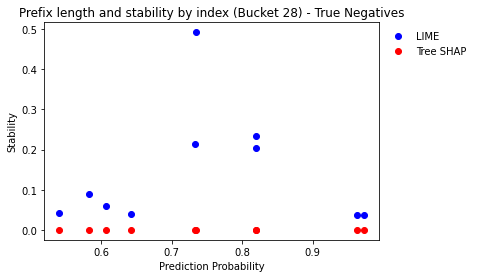

True Positives
Average LIME Weights Stability: 0.099522612956048
Average SHAP Weights Stability: 1.676214322198594e-16
10


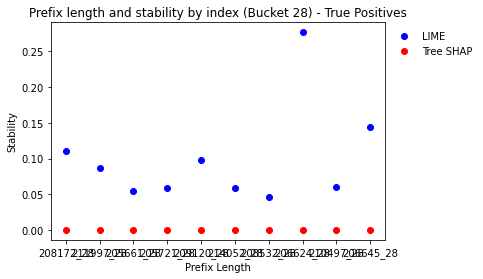

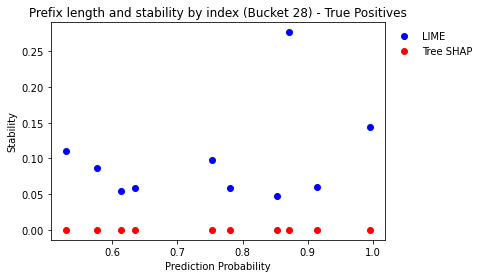

Bucket 29
True Negatives
Average LIME Weights Stability: 0.17748693486835876
Average SHAP Weights Stability: 2.004833827536369e-16
10


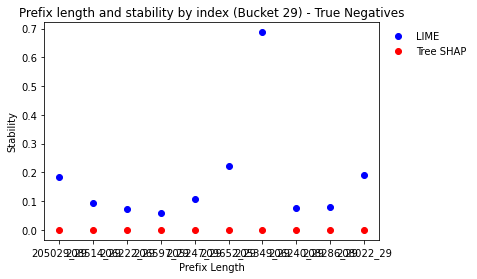

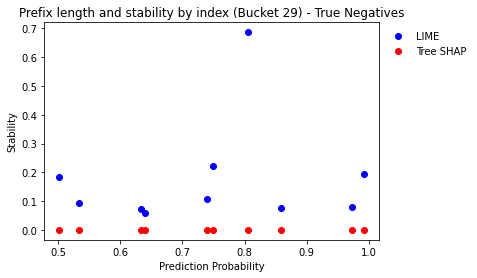

True Positives
Average LIME Weights Stability: 0.2710656142864283
Average SHAP Weights Stability: 1.93330510936134e-16
10


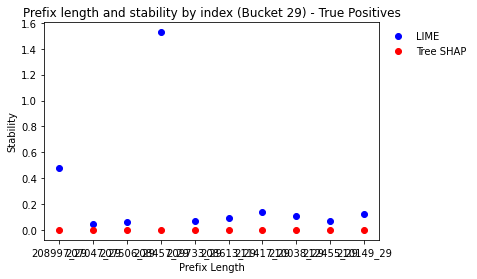

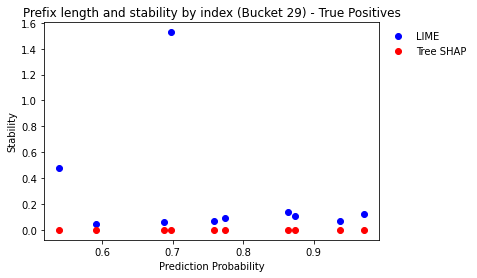

Bucket 30
True Negatives
Average LIME Weights Stability: 0.1210415204778942
Average SHAP Weights Stability: 2.1316323008588748e-16
10


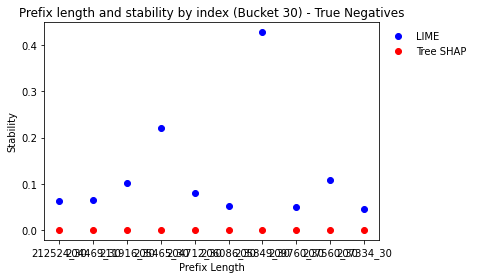

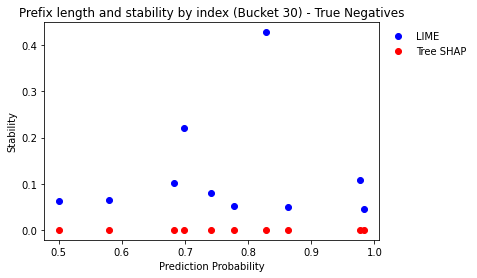

True Positives
Average LIME Weights Stability: 0.09659508378695464
Average SHAP Weights Stability: 2.342500780524109e-16
10


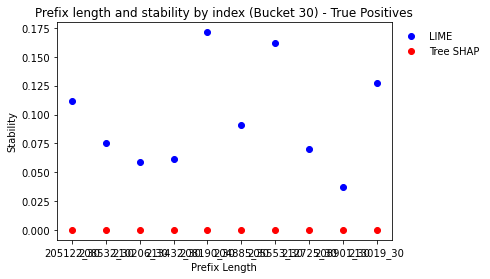

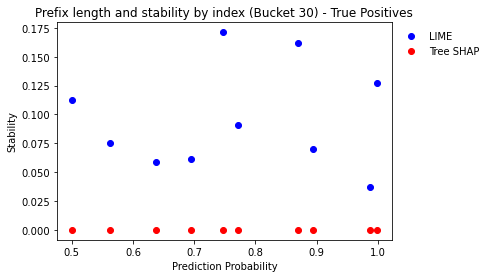

Bucket 31
True Negatives
Average LIME Weights Stability: 0.09245402786692573
Average SHAP Weights Stability: 1.8331312943589966e-16
10


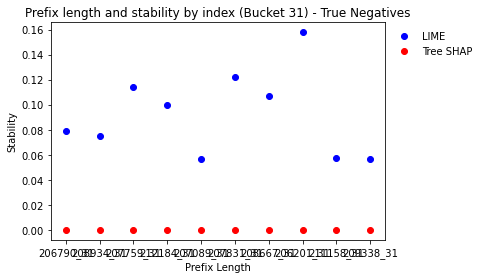

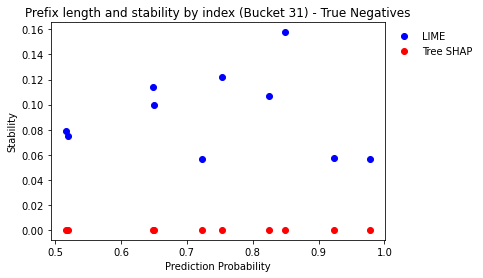

True Positives
Average LIME Weights Stability: 0.08751446235908392
Average SHAP Weights Stability: 1.844913929742432e-16
10


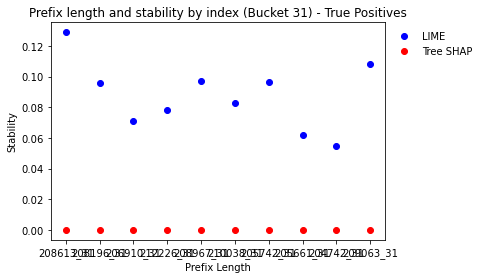

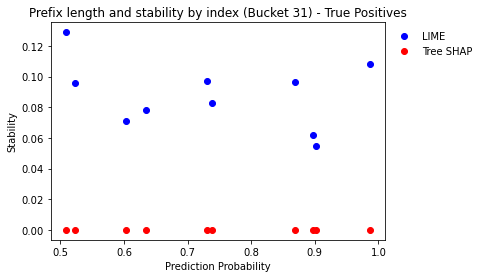

Bucket 32
True Negatives
Average LIME Weights Stability: 0.25734322589088215
Average SHAP Weights Stability: 2.0474345349434889e-16
10


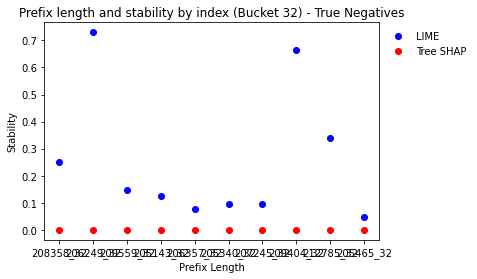

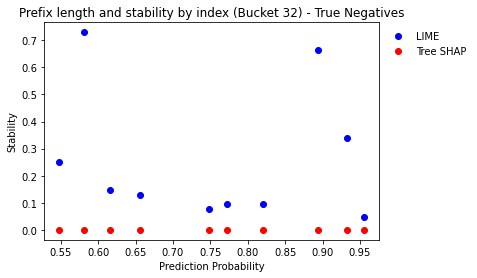

True Positives
Average LIME Weights Stability: 0.5937948685032907
Average SHAP Weights Stability: 2.1613151954934395e-16
10


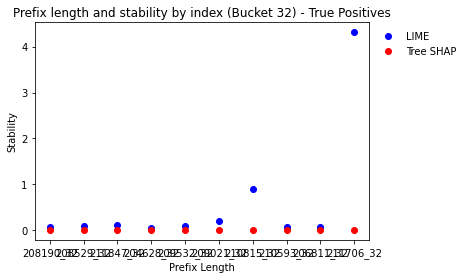

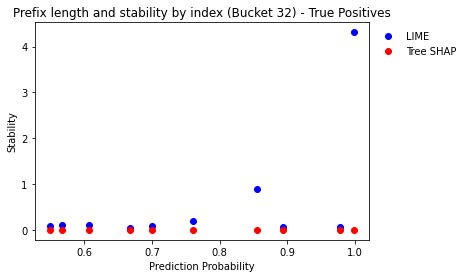

Bucket 33
True Negatives
Average LIME Weights Stability: 0.10548934671837783
Average SHAP Weights Stability: 2.0747168766836206e-16
10


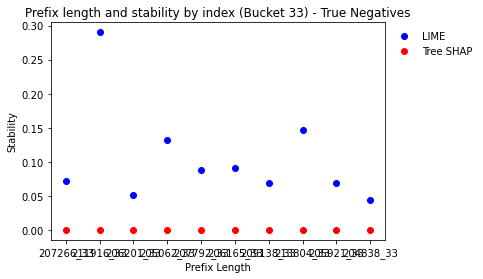

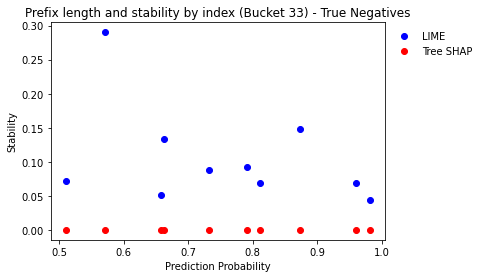

True Positives
Average LIME Weights Stability: 0.27403650793568357
Average SHAP Weights Stability: 2.1154893378017349e-16
10


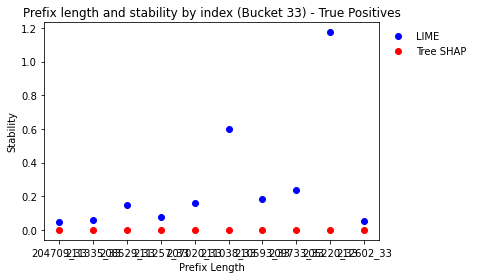

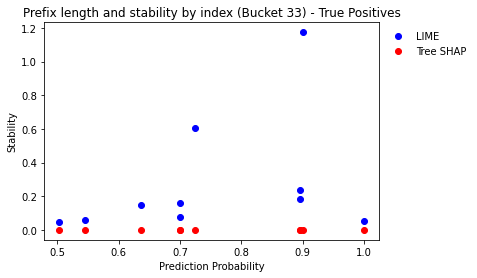

Bucket 34
True Negatives
Average LIME Weights Stability: 0.3551244365003205
Average SHAP Weights Stability: 2.1635197658653644e-16
10


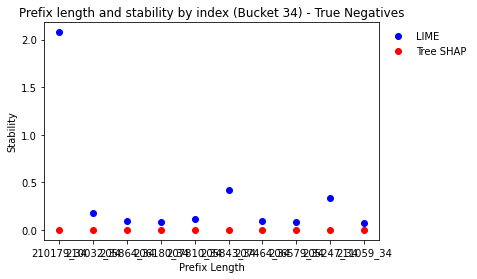

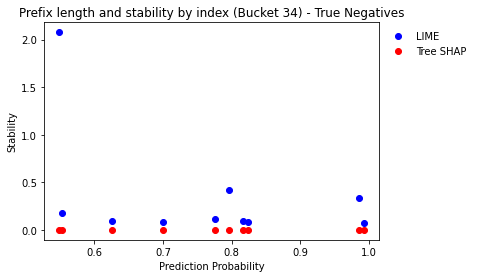

True Positives
Average LIME Weights Stability: 0.8949208825380456
Average SHAP Weights Stability: 2.1019387137630397e-16
10


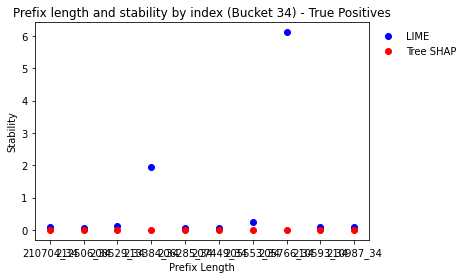

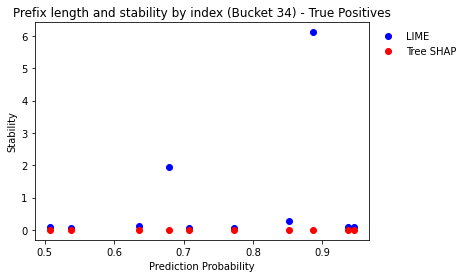

Bucket 35
True Negatives
Average LIME Weights Stability: 0.14949013375069461
Average SHAP Weights Stability: 2.27647900736091e-16
10


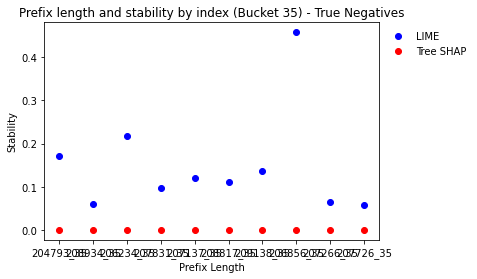

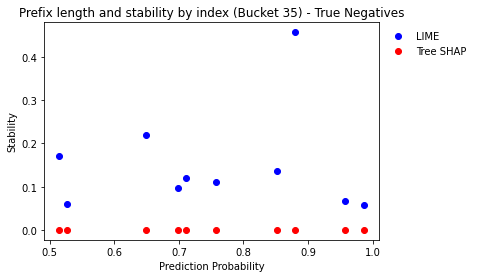

True Positives
Average LIME Weights Stability: 0.1247312406860419
Average SHAP Weights Stability: 2.0498987857930194e-16
10


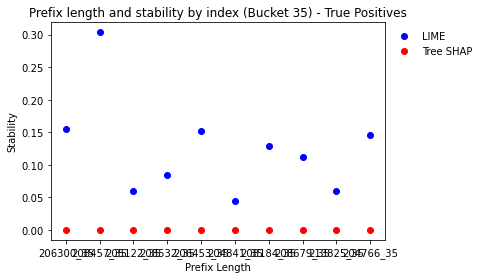

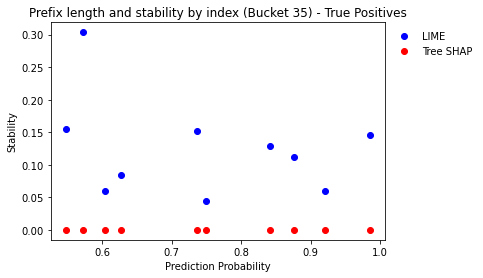

Bucket 36
True Negatives
Average LIME Weights Stability: 0.11635931234177876
Average SHAP Weights Stability: 2.1022893760031943e-16
10


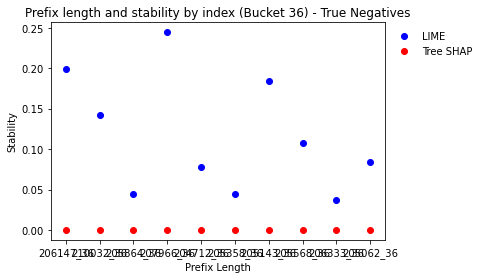

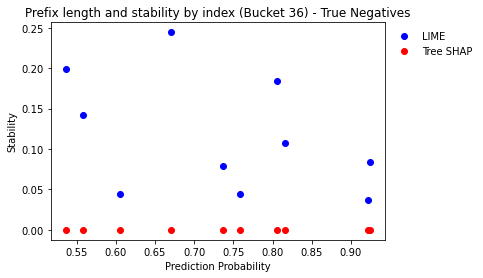

True Positives
Average LIME Weights Stability: 0.0997353678780338
Average SHAP Weights Stability: 2.4792796218067817e-16
10


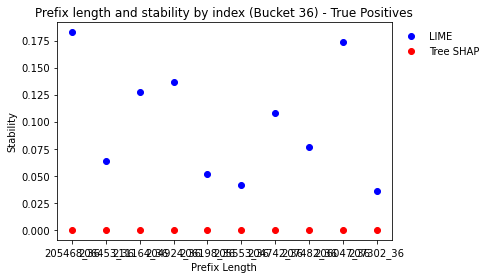

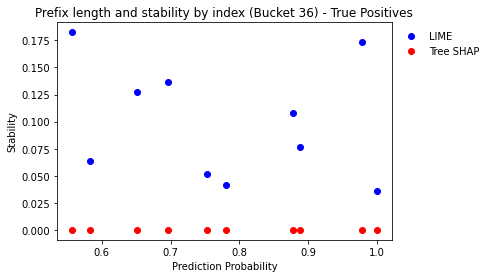

Bucket 37
True Negatives
Average LIME Weights Stability: 0.21642369751930496
Average SHAP Weights Stability: 2.2265935484030543e-16
10


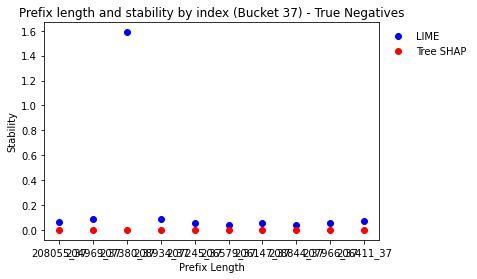

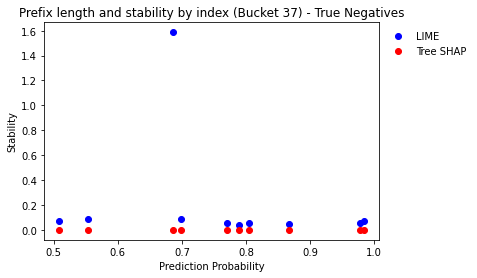

True Positives
Average LIME Weights Stability: 0.07657568266120347
Average SHAP Weights Stability: 2.2278150646038695e-16
10


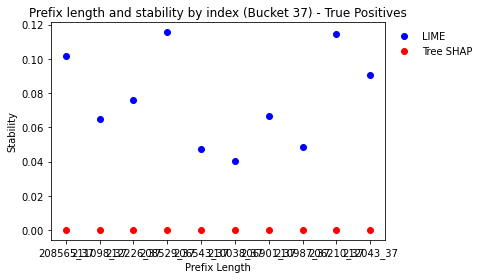

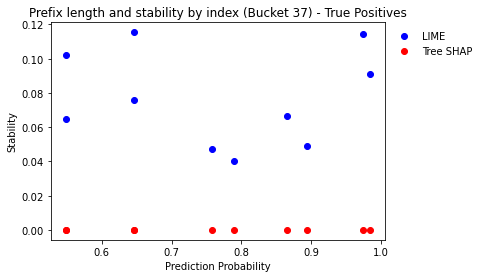

Bucket 38
True Negatives
Average LIME Weights Stability: 0.1802248776116594
Average SHAP Weights Stability: 2.3872582894019145e-16
10


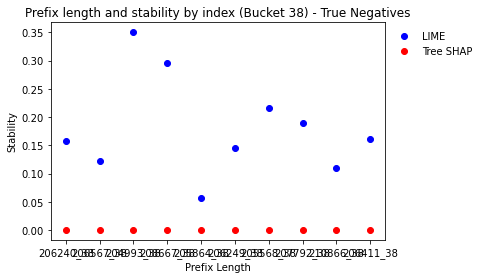

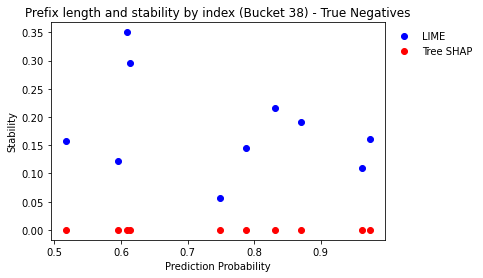

True Positives
Average LIME Weights Stability: 0.11892973419376845
Average SHAP Weights Stability: 2.0930185236375917e-16
10


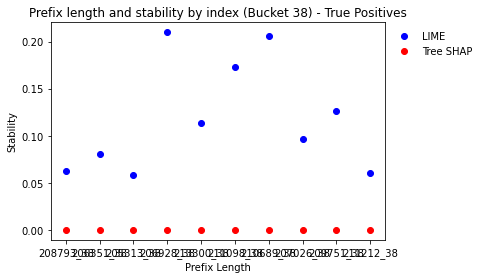

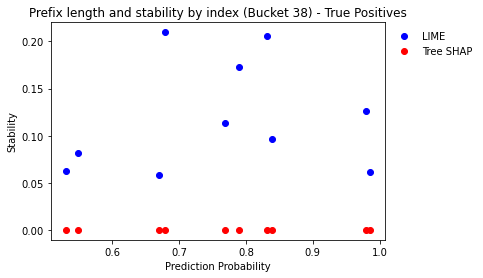

Bucket 39
True Negatives
Average LIME Weights Stability: 0.1559405834553724
Average SHAP Weights Stability: 2.097590848862319e-16
10


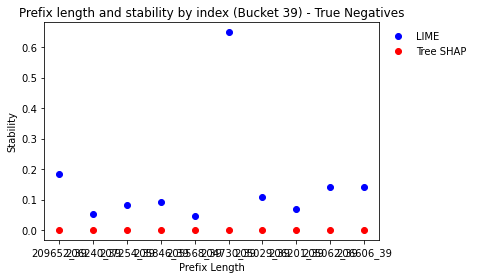

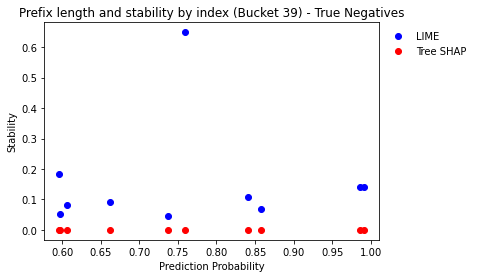

True Positives
Average LIME Weights Stability: 0.36857953344194067
Average SHAP Weights Stability: 2.2402083250090654e-16
10


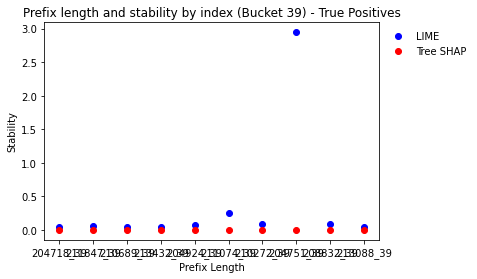

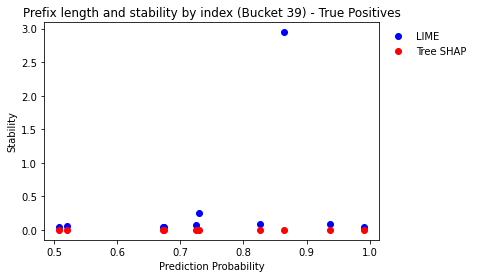

Bucket 40
True Negatives
Average LIME Weights Stability: 0.185912069673211
Average SHAP Weights Stability: 2.1563813186461547e-16
10


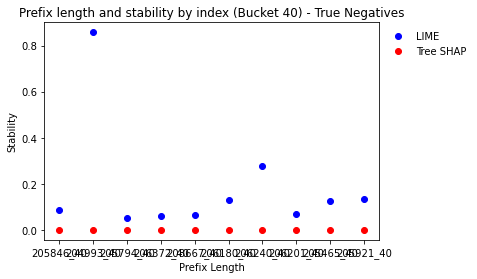

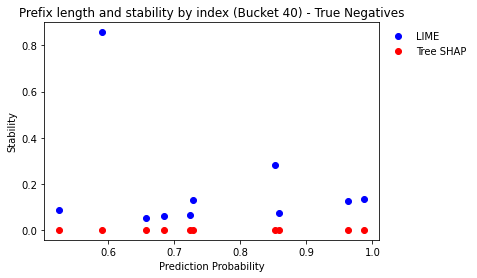

True Positives
Average LIME Weights Stability: 0.10420801513219233
Average SHAP Weights Stability: 1.9578363499572446e-16
10


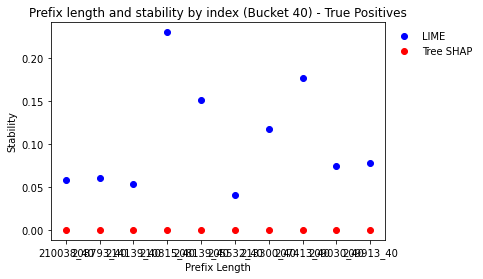

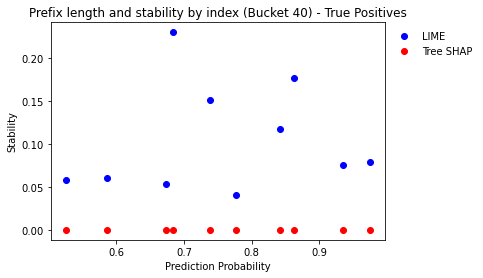

In [7]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            #with open (fn_path, 'rb') as f:
            #    fn_list = pickle.load(f)
            #with open (fp_path, 'rb') as f:
            #    fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            #sample_instances.append(fn_list)
            #sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives"]#, "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                dispersal_lime = []
                dispersal_shap = []
                adj_dispersal_lime = []
                adj_dispersal_shap = []
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['adjusted_lime_importance_stability'])
                tree_shap_stability = pd.Series(data['adjusted_shap_importance_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Weights Stability:", statistics.mean(lime_stability))
                print("Average SHAP Weights Stability:", statistics.mean(tree_shap_stability))
                
                shap_dispersion = [disp for disp in tree_shap_stability if disp > 0]
                
                print (len(shap_dispersion))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()

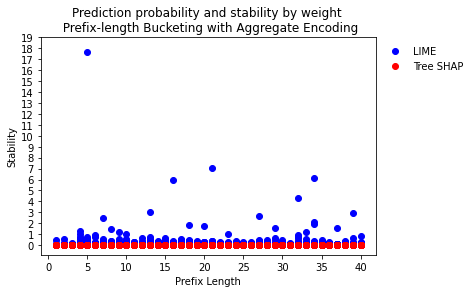

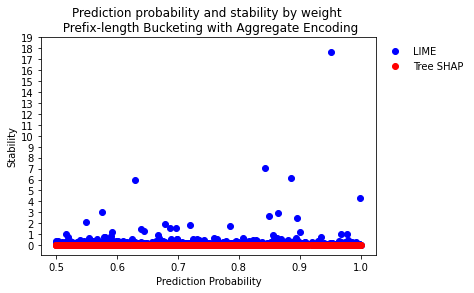

In [8]:
shap_mean = np.mean(all_shap_stab)
shap_std = np.std(all_shap_stab)
shap_upper = shap_mean + (3*shap_std)

fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,20,1))
plt.title("Prediction probability and stability by weight \n Prefix-length Bucketing with Aggregate Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,20,1))
plt.title("Prediction probability and stability by weight \n Prefix-length Bucketing with Aggregate Encoding")
plt.show()

In [9]:
lime_mean = np.mean(all_lime_stab)
lime_std = np.std(all_lime_stab)
lime_upper = lime_mean + (3*lime_std)
lime_lower = lime_mean - (3*lime_std)

shap_mean = np.mean(all_shap_stab)
shap_std = np.std(all_shap_stab)
shap_upper = shap_mean + (3*shap_std)
shap_lower = shap_mean - (3*shap_std)

lime_outliers = [i for i in all_lime_stab if i > lime_upper or i < lime_lower]
shap_outliers = [i for i in all_shap_stab if i > shap_upper or i < shap_lower]

print (lime_mean)
print (shap_mean)
print(len(lime_outliers))
print(len(shap_outliers))
print(str(len(lime_outliers)/len(all_lime_stab)*100)+"%")
print(str(len(shap_outliers)/len(all_shap_stab)*100)+"%")

0.23336107330777256
1.7627312747795097e-16
8
13
1.0%
1.625%


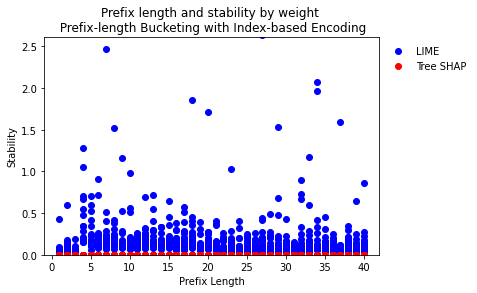

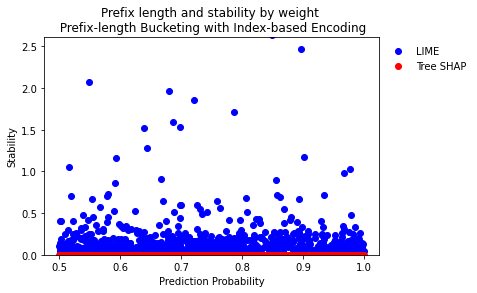

In [10]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

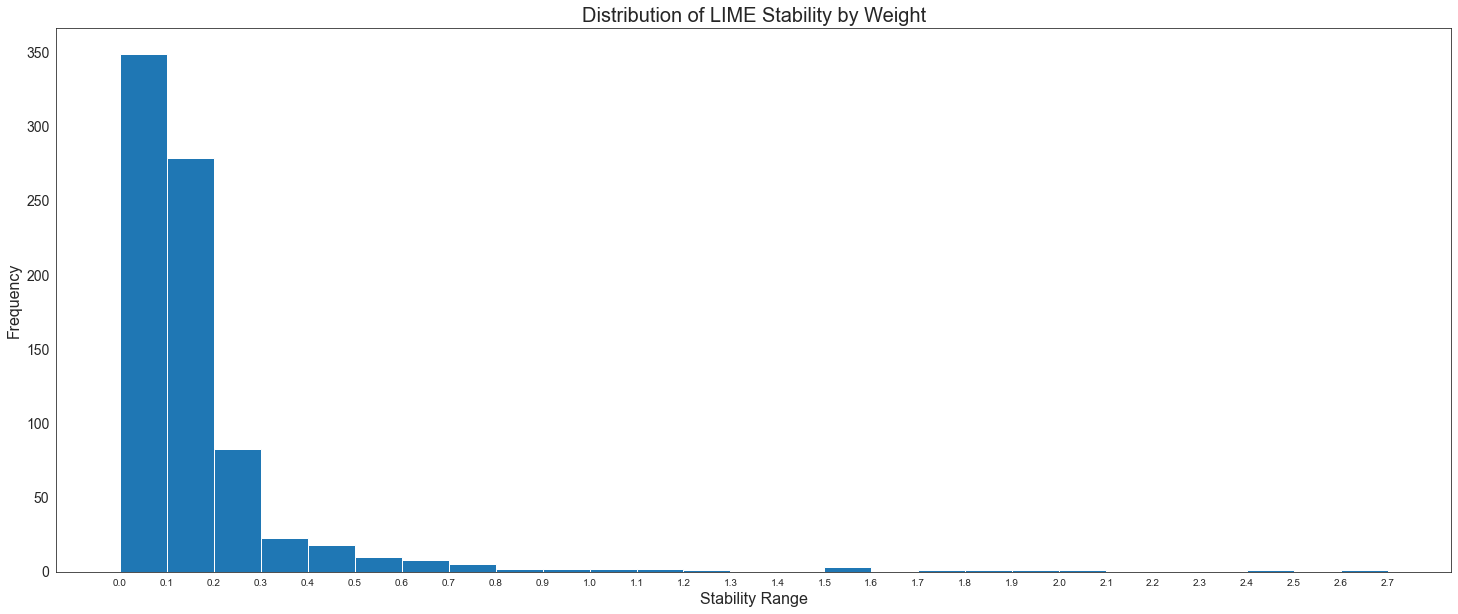

In [11]:
bins = np.arange(0, lime_upper+0.1, 0.1)
yticks = np.arange(0, 400, 50)
sns.set_style("white")
plt.subplots(figsize=(25, 10))
plt.hist(all_lime_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 10)
plt.yticks(yticks, fontsize = 14)
plt.title("Distribution of LIME Stability by Weight", fontsize = 20)
plt.xlabel("Stability Range", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

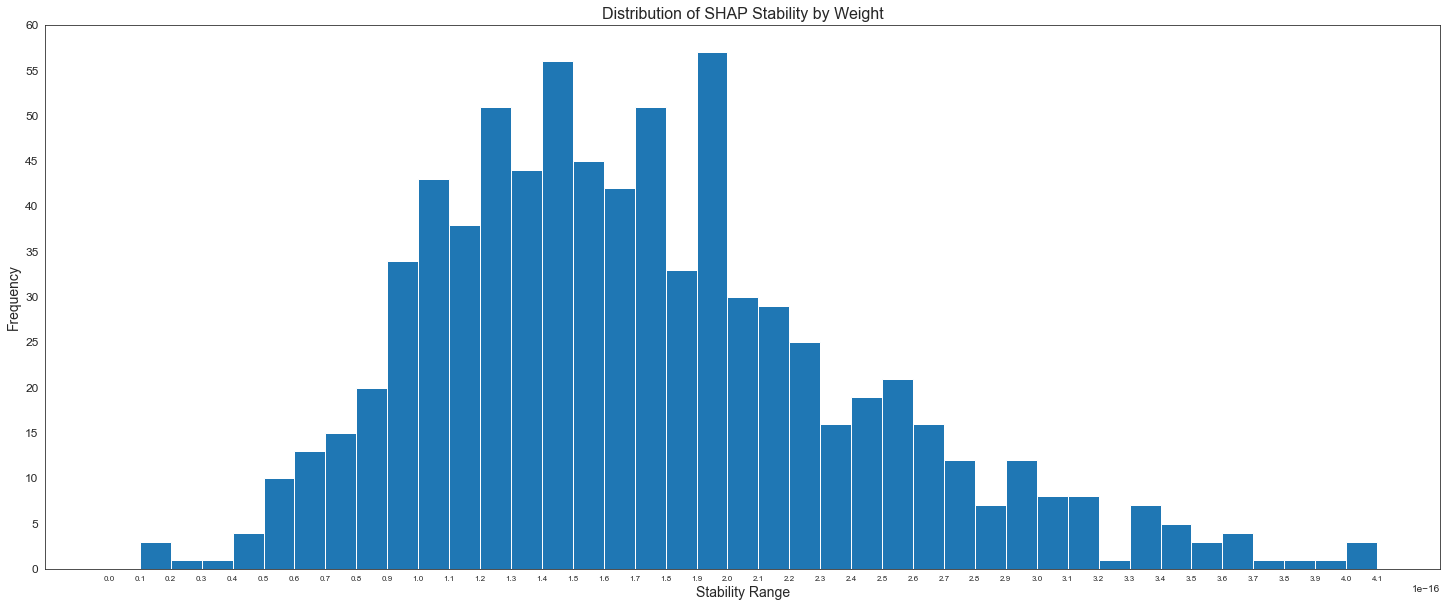

In [12]:
bins = np.arange(0, shap_upper+1e-17, 1e-17)
yticks = np.arange(0, 65, 5)
sns.set_style("white")
plt.subplots(figsize=(25, 10))
plt.hist(all_shap_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 8)
plt.yticks(yticks, fontsize = 12)
plt.title("Distribution of SHAP Stability by Weight", fontsize = 16)
plt.xlabel("Stability Range", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()